Imaged4xa-1694786402012.avif

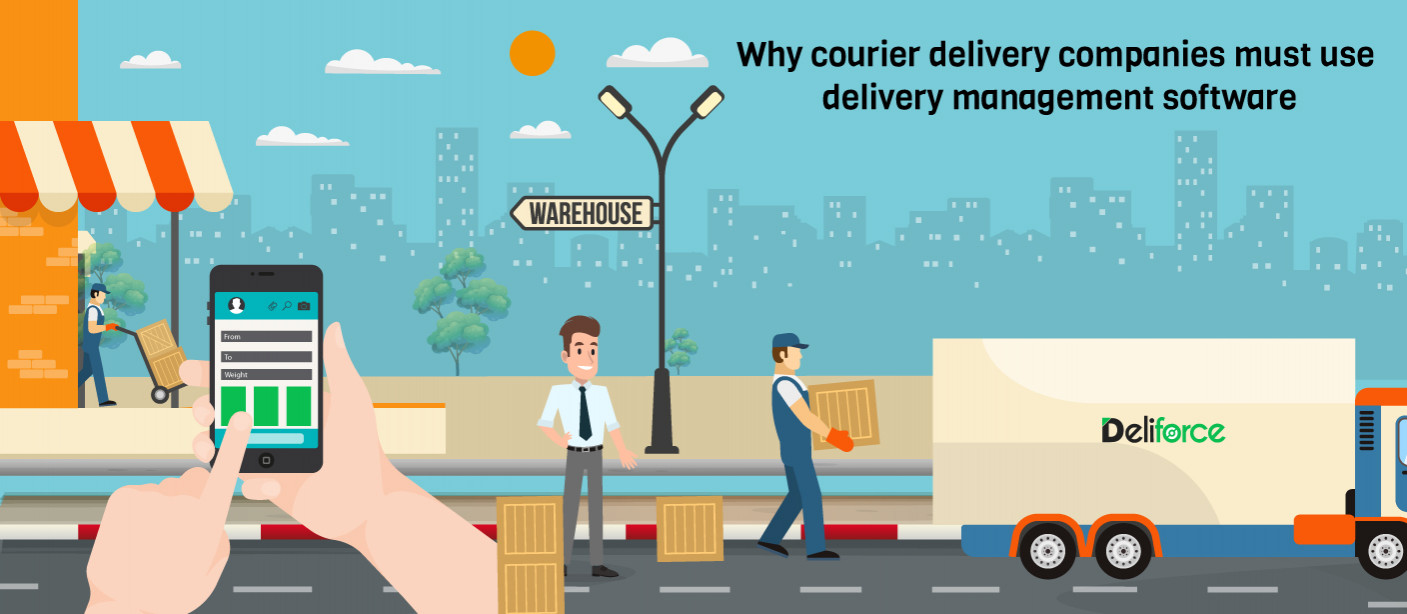

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import boxcox
import math
import re
from scipy.stats import norm
from scipy.stats import chi2_contingency, ttest_ind, f_oneway, pearsonr

In [ ]:
uploaded = files.upload()

Saving delhivery_data.csv to delhivery_data.csv


In [ ]:
#
delhivery_data = pd.read_csv('delhivery_data.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
delhivery_data.head()

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time                 od_end_time  \
0  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
1  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
2  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
3  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
4  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   

   start_scan_to_end_scan  is_cutoff  cutoff_factor  \
0                    86.0       True              9   
1                    86.0       True             18   
2                    86.0       True             27   
3                    86.0       True             36   
4                    86.0      False             39   

             cutoff_timestamp  actual_distance_to_destination  actual_time  \
0         2018-09-20 04:27:55                       10.435660         14.0   
1         2018-09-20 04:17:55                       18.936842         24.0   
2  2018-09-20 04:01:19.505586                       27.637279         40.0   
3         2018-09-20 03:39:57                       36.118028         62.0   
4         2018-09-20 03:33:55                       39.386040         68.0   

   osrm_time  osrm_distance    factor  segment_actual_time  segment_osrm_time  \
0       11.0        11.9653  1.272727                 14.0               11.0   
1       20.0        21.7243  1.200000                 10.0                9.0   
2       28.0        32.5395  1.428571                 16.0                7.0   
3       40.0        45.5620  1.550000                 21.0               12.0   
4       44.0        54.2181  1.545455                  6.0                5.0   

   segment_osrm_distance  segment_factor  
0                11.9653        1.272727  
1                 9.7590        1.111111  
2                10.8152        2.285714  
3                13.0224        1.750000  
4                 3.9153        1.200000

In [ ]:
#
df = delhivery_data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
df.shape

(144867, 24)

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
df.isna().any()

data                              False
trip_creation_time                False
route_schedule_uuid               False
route_type                        False
trip_uuid                         False
source_center                     False
source_name                        True
destination_center                False
destination_name                   True
od_start_time                     False
od_end_time                       False
start_scan_to_end_scan            False
is_cutoff                         False
cutoff_factor                     False
cutoff_timestamp                  False
actual_distance_to_destination    False
actual_time                       False
osrm_time                         False
osrm_distance                     False
factor                            False
segment_actual_time               False
segment_osrm_time                 False
segment_osrm_distance             False
segment_factor                    False
dtype: bool

In [ ]:
((df.isna().sum() / len(df)) * 100).round(2)

data                              0.00
trip_creation_time                0.00
route_schedule_uuid               0.00
route_type                        0.00
trip_uuid                         0.00
source_center                     0.00
source_name                       0.20
destination_center                0.00
destination_name                  0.18
od_start_time                     0.00
od_end_time                       0.00
start_scan_to_end_scan            0.00
is_cutoff                         0.00
cutoff_factor                     0.00
cutoff_timestamp                  0.00
actual_distance_to_destination    0.00
actual_time                       0.00
osrm_time                         0.00
osrm_distance                     0.00
factor                            0.00
segment_actual_time               0.00
segment_osrm_time                 0.00
segment_osrm_distance             0.00
segment_factor                    0.00
dtype: float64

In [ ]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
df[df.duplicated()]

Empty DataFrame
Columns: [data, trip_creation_time, route_schedule_uuid, route_type, trip_uuid, source_center, source_name, destination_center, destination_name, od_start_time, od_end_time, start_scan_to_end_scan, is_cutoff, cutoff_factor, cutoff_timestamp, actual_distance_to_destination, actual_time, osrm_time, osrm_distance, factor, segment_actual_time, segment_osrm_time, segment_osrm_distance, segment_factor]
Index: []

In [ ]:
df.describe().T

count        mean          std         min  \
start_scan_to_end_scan          144867.0  961.262986  1037.012769   20.000000   
cutoff_factor                   144867.0  232.926567   344.755577    9.000000   
actual_distance_to_destination  144867.0  234.073372   344.990009    9.000045   
actual_time                     144867.0  416.927527   598.103621    9.000000   
osrm_time                       144867.0  213.868272   308.011085    6.000000   
osrm_distance                   144867.0  284.771297   421.119294    9.008200   
factor                          144867.0    2.120107     1.715421    0.144000   
segment_actual_time             144867.0   36.196111    53.571158 -244.000000   
segment_osrm_time               144867.0   18.507548    14.775960    0.000000   
segment_osrm_distance           144867.0   22.829020    17.860660    0.000000   
segment_factor                  144867.0    2.218368     4.847530  -23.444444   

                                       25%         50%          75%  \
start_scan_to_end_scan          161.000000  449.000000  1634.000000   
cutoff_factor                    22.000000   66.000000   286.000000   
actual_distance_to_destination   23.355874   66.126571   286.708875   
actual_time                      51.000000  132.000000   513.000000   
osrm_time                        27.000000   64.000000   257.000000   
osrm_distance                    29.914700   78.525800   343.193250   
factor                            1.604264    1.857143     2.213483   
segment_actual_time              20.000000   29.000000    40.000000   
segment_osrm_time                11.000000   17.000000    22.000000   
segment_osrm_distance            12.070100   23.513000    27.813250   
segment_factor                    1.347826    1.684211     2.250000   

                                        max  
start_scan_to_end_scan          7898.000000  
cutoff_factor                   1927.000000  
actual_distance_to_destination  1927.447705  
actual_time                     4532.000000  
osrm_time                       1686.000000  
osrm_distance                   2326.199100  
factor                            77.387097  
segment_actual_time             3051.000000  
segment_osrm_time               1611.000000  
segment_osrm_distance           2191.403700  
segment_factor                   574.250000

In [ ]:
df.describe(include=object).T

count unique  \
data                 144867      2   
trip_creation_time   144867  14817   
route_schedule_uuid  144867   1504   
route_type           144867      2   
trip_uuid            144867  14817   
source_center        144867   1508   
source_name          144574   1498   
destination_center   144867   1481   
destination_name     144606   1468   
od_start_time        144867  26369   
od_end_time          144867  26369   
cutoff_timestamp     144867  93180   

                                                                   top    freq  
data                                                          training  104858  
trip_creation_time                          2018-09-22 04:55:04.835022     101  
route_schedule_uuid  thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...    1812  
route_type                                                         FTL   99660  
trip_uuid                                      trip-153759210483476123     101  
source_center                                             IND000000ACB   23347  
source_name                              Gurgaon_Bilaspur_HB (Haryana)   23347  
destination_center                                        IND000000ACB   15192  
destination_name                         Gurgaon_Bilaspur_HB (Haryana)   15192  
od_start_time                               2018-09-21 18:37:09.322207      81  
od_end_time                                 2018-09-24 09:59:15.691618      81  
cutoff_timestamp                                   2018-09-24 05:19:20      40

In [ ]:
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["od_end_time"] = pd.to_datetime(df["od_end_time"])

In [ ]:
df["cutoff_timestamp"] = pd.to_datetime(df["cutoff_timestamp"],format ="mixed")

In [ ]:
df.sample(5)

data         trip_creation_time  \
34278   training 2018-09-16 19:19:01.957793   
40991   training 2018-09-15 23:10:22.830629   
49530       test 2018-09-28 20:46:11.791131   
132146  training 2018-09-14 00:18:57.973357   
136980  training 2018-09-17 17:29:26.034420   

                                      route_schedule_uuid route_type  \
34278   thanos::sroute:9235e090-a61d-4a3b-81a3-eb4f37d...        FTL   
40991   thanos::sroute:54a7c356-361d-4e74-9ee7-d420c37...        FTL   
49530   thanos::sroute:6b53909c-62c8-4c16-8ea1-c746855...        FTL   
132146  thanos::sroute:64d4c6c9-ffb9-4794-b9f1-05f064c...        FTL   
136980  thanos::sroute:4e7e8e63-8b57-464c-9028-8d02069...        FTL   

                      trip_uuid source_center  \
34278   trip-153712554195755989  IND421302AAG   
40991   trip-153705302283040335  IND562132AAA   
49530   trip-153816757179091270  IND842001AAA   
132146  trip-153688433797310425  IND110037AAM   
136980  trip-153720536603406530  IND577002AAA   

                              source_name destination_center  \
34278   Bhiwandi_Mankoli_HB (Maharashtra)       IND562132AAA   
40991    Bangalore_Nelmngla_H (Karnataka)       IND302014AAA   
49530         Muzaffrpur_Bbganj_I (Bihar)       IND846004AAA   
132146            Delhi_Airport_H (Delhi)       IND421302AAG   
136980  Davangere_Central_I_1 (Karnataka)       IND580028AAA   

                         destination_name              od_start_time  \
34278    Bangalore_Nelmngla_H (Karnataka) 2018-09-16 19:19:01.957793   
40991              Jaipur_Hub (Rajasthan) 2018-09-15 23:10:22.830629   
49530                   Darbhanga (Bihar) 2018-09-28 20:46:11.791131   
132146  Bhiwandi_Mankoli_HB (Maharashtra) 2018-09-14 00:18:57.973357   
136980      Hubli_Adargchi_IP (Karnataka) 2018-09-18 08:01:00.001586   

                      od_end_time  start_scan_to_end_scan  is_cutoff  \
34278  2018-09-17 19:06:09.552417                  1427.0       True   
40991  2018-09-18 00:51:10.318294                  2980.0       True   
49530  2018-09-29 00:35:17.685352                   229.0       True   
132146 2018-09-15 15:28:43.335496                  2349.0      False   
136980 2018-09-18 11:40:03.948107                   219.0       True   

        cutoff_factor    cutoff_timestamp  actual_distance_to_destination  \
34278             330 2018-09-17 11:01:23                      331.415082   
40991            1056 2018-09-16 16:35:27                     1057.448433   
49530              22 2018-09-28 22:53:31                       22.377244   
132146           1114 2018-09-14 06:12:10                     1114.640086   
136980             22 2018-09-18 11:11:20                       22.645987   

        actual_time  osrm_time  osrm_distance    factor  segment_actual_time  \
34278         415.0      269.0       361.7520  1.542751                 19.0   
40991        1933.0      959.0      1318.2780  2.015641                 39.0   
49530          93.0       21.0        27.7333  4.428571                 93.0   
132146       1974.0      997.0      1368.4974  1.979940                 37.0   
136980         26.0       18.0        25.8660  1.444444                 26.0   

        segment_osrm_time  segment_osrm_distance  segment_factor  
34278                14.0                21.0053        1.357143  
40991                16.0                23.9655        2.437500  
49530                21.0                27.7333        4.428571  
132146               17.0                17.1298        2.176471  
136980               18.0                25.8660        1.444444

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [ ]:
df['year'] = df['trip_creation_time'].dt.year
df.insert(2, 'year', df.pop('year'))

df['month_name'] = df['trip_creation_time'].dt.month_name()
df.insert(3, 'month_name', df.pop('month_name'))

df['week_days'] = df['trip_creation_time'].dt.day_name()
df.insert(4, 'week_days', df.pop('week_days'))

df['hours'] = df['trip_creation_time'].dt.hour
df.insert(5, 'hours', df.pop('hours'))

df['weeks'] = df['trip_creation_time'].dt.isocalendar().week
df.insert(7, 'weeks', df.pop('weeks'))

In [ ]:
# Converting the datatypes to category for columns like data and route_type as they have fixed value:
df['data'] = df['data'].astype('category')
df['year'] = df['year'].astype('category')
df['month_name'] = df['month_name'].astype('category')
df['week_days'] = df['week_days'].astype('category')
df['route_type'] = df['route_type'].astype('category')

In [ ]:
df[df.columns[::]].sample(2)

data         trip_creation_time  year month_name week_days  hours  \
103176  training 2018-09-24 19:03:06.678919  2018  September    Monday     19   
58838   training 2018-09-14 18:53:01.364151  2018  September    Friday     18   

                                      route_schedule_uuid  weeks route_type  \
103176  thanos::sroute:bae3c09c-2500-4fbb-95b5-633f40e...     39    Carting   
58838   thanos::sroute:17fc17ec-ffde-4f2a-8ad6-ff420a0...     37        FTL   

                      trip_uuid source_center  \
103176  trip-153781578667865654  IND743347AAA   
58838   trip-153695118137161432  IND306401AAB   

                             source_name destination_center  \
103176  Kakdwip_KlngrDPP_D (West Bengal)       IND700053AAA   
58838        Pali_Nayagaon_I (Rajasthan)       IND302014AAA   

                         destination_name              od_start_time  \
103176  CCU_New Alipore_DPC (West Bengal) 2018-09-25 03:43:55.958414   
58838              Jaipur_Hub (Rajasthan) 2018-09-15 10:09:22.842895   

                      od_end_time  start_scan_to_end_scan  is_cutoff  \
103176 2018-09-25 07:32:45.352788                   228.0       True   
58838  2018-09-15 18:48:16.794797                   518.0       True   

        cutoff_factor    cutoff_timestamp  actual_distance_to_destination  \
103176             36 2018-09-25 04:51:55                       37.605572   
58838             242 2018-09-15 11:13:24                      242.258648   

        actual_time  osrm_time  osrm_distance    factor  segment_actual_time  \
103176        154.0       40.0        41.5079  3.850000                 36.0   
58838         376.0      193.0       273.2797  1.948187                 19.0   

        segment_osrm_time  segment_osrm_distance  segment_factor  
103176               15.0                20.9231        2.400000  
58838                13.0                19.5480        1.461538

In [ ]:
df['trip_uuid'] = df['trip_uuid'].str.strip().str.split('trip-').str.get(1)

In [ ]:
df['source_center'] = df['source_center'].str.extract(r'(\d+)([A-Za-z]+)')\
                                                                          .agg('-'.join, axis=1)

In [ ]:
df['destination_center'] = df['destination_center'].str.extract(r'(\d+)([A-Za-z]+)')\
                                                                          .agg('-'.join, axis=1)

In [ ]:
df.head()

data         trip_creation_time  year month_name week_days  hours  \
0  training 2018-09-20 02:35:36.476840  2018  September  Thursday      2   
1  training 2018-09-20 02:35:36.476840  2018  September  Thursday      2   
2  training 2018-09-20 02:35:36.476840  2018  September  Thursday      2   
3  training 2018-09-20 02:35:36.476840  2018  September  Thursday      2   
4  training 2018-09-20 02:35:36.476840  2018  September  Thursday      2   

                                 route_schedule_uuid  weeks route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...     38    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...     38    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...     38    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...     38    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...     38    Carting   

            trip_uuid source_center                 source_name  \
0  153741093647649320    388121-AAA  Anand_VUNagar_DC (Gujarat)   
1  153741093647649320    388121-AAA  Anand_VUNagar_DC (Gujarat)   
2  153741093647649320    388121-AAA  Anand_VUNagar_DC (Gujarat)   
3  153741093647649320    388121-AAA  Anand_VUNagar_DC (Gujarat)   
4  153741093647649320    388121-AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0         388620-AAB  Khambhat_MotvdDPP_D (Gujarat)   
1         388620-AAB  Khambhat_MotvdDPP_D (Gujarat)   
2         388620-AAB  Khambhat_MotvdDPP_D (Gujarat)   
3         388620-AAB  Khambhat_MotvdDPP_D (Gujarat)   
4         388620-AAB  Khambhat_MotvdDPP_D (Gujarat)   

               od_start_time                od_end_time  \
0 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
1 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
2 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
3 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
4 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   

   start_scan_to_end_scan  is_cutoff  cutoff_factor  \
0                    86.0       True              9   
1                    86.0       True             18   
2                    86.0       True             27   
3                    86.0       True             36   
4                    86.0      False             39   

            cutoff_timestamp  actual_distance_to_destination  actual_time  \
0 2018-09-20 04:27:55.000000                       10.435660         14.0   
1 2018-09-20 04:17:55.000000                       18.936842         24.0   
2 2018-09-20 04:01:19.505586                       27.637279         40.0   
3 2018-09-20 03:39:57.000000                       36.118028         62.0   
4 2018-09-20 03:33:55.000000                       39.386040         68.0   

   osrm_time  osrm_distance    factor  segment_actual_time  segment_osrm_time  \
0       11.0        11.9653  1.272727                 14.0               11.0   
1       20.0        21.7243  1.200000                 10.0                9.0   
2       28.0        32.5395  1.428571                 16.0                7.0   
3       40.0        45.5620  1.550000                 21.0               12.0   
4       44.0        54.2181  1.545455                  6.0                5.0   

   segment_osrm_distance  segment_factor  
0                11.9653        1.272727  
1                 9.7590        1.111111  
2                10.8152        2.285714  
3                13.0224        1.750000  
4                 3.9153        1.200000

In [ ]:
# def extract_info(name):
#     if not isinstance(name, str):
#         return None, None, None

#     pattern = r'^(?P<city>[^\s_]+)_?(?P<place>[^\(\)]*)\s?\((?P<state>[A-Za-z\s&]+)\)$'
#     match = re.match(pattern, name)
#     if match:
#         city = match.group('city').strip()
#         place = match.group('place').strip() if match.group('place') else city
#         state = match.group('state').strip()
#         return city, place, state
#     else:
#         return None, None, None

In [ ]:
# df[['source_city_name', 'source_place', 'source_state_name']] = df['source_name'].apply(lambda x: pd.Series(extract_info(x)))

# df.insert(11, 'source_state_name', df.pop('source_state_name'))
# df.insert(12, 'source_place', df.pop('source_place'))
# df.insert(13, 'source_city_name', df.pop('source_city_name'))

In [ ]:
# df['source_place_name'] = df['source_place_name'].apply(lambda x: x.split('_')[0] if isinstance(x, str) and '_' in x else x)

In [ ]:
# df['source_place_name'] = df['source_place'].apply(lambda x: x.strip().split('_')[0] if isinstance(x, str) else None)
# df.insert(12, 'source_place_name', df.pop('source_place_name'))

In [ ]:
# df['source_location_type'] = df['source_place'].apply(lambda x: x.strip().split('_')[1] if isinstance(x, str) and '_' in x else None)
# df.insert(13, 'source_location_type', df.pop('source_location_type'))

In [ ]:
# import pandas as pd

# # Sample data (Replace this with reading from your actual file)
# data = {
#     'source_name': [
#         'Bangalore_Nelmngla_H (Karnataka)',
#         'Bengaluru_Bomsndra_HB (Karnataka)',
#         'Anand_VUNagar_DC (Gujarat)',
#         'Una_Mamlatdr_DC (Gujarat)',
#         'Talala_SsnRdDPP_D (Gujarat)',
#         'Sonipat_Kundli_H (Haryana)',
#         'Roorkee_IOTCEncl_L (Uttarakhand)',
#         'MAA_Poonamallee_HB (Tamil Nadu)',
#         'Gurgaon_Begumpur_CP (Haryana)',
#         'Ajmer_FoySGRRD_I (Rajasthan)',
#         'Kanpur_Central_H_6 (Uttar Pradesh)',
#         'Ahmedabad_East_H_1 (Gujarat)',
#         'Vizag_Gajuwaka (Andhra Pradesh)',
#         'Vizag _NAD (Andhra Pradesh)',
#         'Dabhoi_Central_DPP_3 (Gujarat)',
#         'Delhi_Rohini_DPC (Delhi)'
#     ]
# }

In [ ]:
# df['source_state_name'] = df['source_name'].str.extract(r'\((.*?)\)')
# df['clean_name'] = df['source_name'].str.extract(r'^(.*?)\s+\(')[0]
# tokens = df['clean_name'].str.strip().str.split(r'[_\s]+', expand=True)

# df['source_city_name'] = tokens[0]
# df['source_place_name'] = tokens[1]
# df['source_code_name'] = tokens[2]

# df['source_state_name'] = df['source_state_name'].fillna('Unkown')
# df['source_city_name'] = df['source_city_name'].fillna('Unkown')
# df['source_place_name'] = df['source_place_name'].fillna('Unkown')
# df['source_code_name'] = df['source_code_name'].fillna('Unkown')

# df.insert(12, 'source_state_name', df.pop('source_state_name'))
# df.insert(13, 'source_city_name', df.pop('source_city_name'))
# df.insert(14, 'source_place_name', df.pop('source_place_name'))
# df.insert(15, 'source_code_name', df.pop('source_code_name'))

# df.drop(columns=['clean_name'], inplace=True)

In [ ]:
df.sample(5)

data         trip_creation_time  year month_name week_days  hours  \
37155       test 2018-09-29 03:25:55.320169  2018  September  Saturday      3   
33928   training 2018-09-18 05:58:15.075750  2018  September   Tuesday      5   
135298      test 2018-10-01 21:38:41.852974  2018    October    Monday     21   
29543   training 2018-09-20 22:33:19.518073  2018  September  Thursday     22   
89495   training 2018-09-21 23:39:00.503554  2018  September    Friday     23   

                                      route_schedule_uuid  weeks route_type  \
37155   thanos::sroute:01164881-301e-45f8-bacd-ee21c37...     39        FTL   
33928   thanos::sroute:54e37e7d-cf98-497d-bf5c-bceb104...     38        FTL   
135298  thanos::sroute:e387b964-5c3a-49b4-95b9-991f296...     40    Carting   
29543   thanos::sroute:0f5c3b4b-5c1c-4a8f-abd4-98fcadb...     38    Carting   
89495   thanos::sroute:f60f8fd7-4c32-4656-b6fc-3fa9a79...     38        FTL   

                 trip_uuid source_center                        source_name  \
37155   153819155531990348    721501-AAC   AmaDubi_Bulabeda_D (West Bengal)   
33928   153725029507550932    781018-AAB               Guwahati_Hub (Assam)   
135298  153842992185274119    742148-AAA   Lalgola_KrsprDPP_D (West Bengal)   
29543   153748279951770211    322230-AAA     Hindaun_MndwrRod_D (Rajasthan)   
89495   153757314050330118    421302-AAG  Bhiwandi_Mankoli_HB (Maharashtra)   

       destination_center                          destination_name  \
37155          721253-AAC  ChandroknaRD_Central_DPP_3 (West Bengal)   
33928          788026-AAC                Silchar_Sirikona_H (Assam)   
135298         742225-AAA       Ragunthgnj_GopalDPP_D (West Bengal)   
29543          322241-AAA            Karauli_HnsChowk_D (Rajasthan)   
89495          411033-AAA             Pune_Tathawde_H (Maharashtra)   

                    od_start_time                od_end_time  \
37155  2018-09-29 08:06:12.376587 2018-09-29 11:44:40.098926   
33928  2018-09-18 05:58:15.075750 2018-09-18 19:21:34.239175   
135298 2018-10-02 00:42:03.601638 2018-10-02 01:55:49.720875   
29543  2018-09-21 02:42:23.578634 2018-09-21 03:43:24.283429   
89495  2018-09-21 23:39:00.503554 2018-09-22 05:10:24.024491   

        start_scan_to_end_scan  is_cutoff  cutoff_factor    cutoff_timestamp  \
37155                    218.0       True             22 2018-09-29 10:57:55   
33928                    803.0       True            110 2018-09-18 12:27:21   
135298                    73.0       True             18 2018-10-02 01:09:53   
29543                     61.0       True             18 2018-09-21 03:13:21   
89495                    331.0      False            101 2018-09-22 01:45:25   

        actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
37155                        22.292435         39.0       22.0        24.7962   
33928                       110.310550        373.0      144.0       204.4807   
135298                       18.314379         40.0       13.0        18.9889   
29543                        18.588813         28.0       19.0        21.9684   
89495                       101.171367        191.0       97.0       130.8061   

          factor  segment_actual_time  segment_osrm_time  \
37155   1.772727                 39.0               22.0   
33928   2.590278                105.0               30.0   
135298  3.076923                 17.0                6.0   
29543   1.473684                 10.0                8.0   
89495   1.969072                 47.0               17.0   

        segment_osrm_distance  segment_factor  
37155                 24.7962        1.772727  
33928                 43.3641        3.500000  
135298                 9.0897        2.833333  
29543                  9.2536        1.250000  
89495                 22.3987        2.764706

In [ ]:
df['source_city_name'] = df["source_name"].str.extract(r'([^_]+)')
df['source_place_name'] = df["source_name"].str.split("_", n = 2, expand = True)[1]
df['source_code_name'] = (df["source_name"].str.split("_",n=2,expand = True)[2]).str.split(" ",n = 1, expand = True)[0]
df['source_state_name'] = df["source_name"].str.extract(r'.*\((.*)\).*')

pd.set_option('display.max_columns', None)

In [ ]:
df['destination_city_name']= df["destination_name"].str.extract(r'([^_]+)')
df['destination_place_name'] = df["destination_name"].str.split("_", n = 2, expand = True)[1]
df['destination_code_name'] = (df["destination_name"].str.split("_",n=2,expand = True)[2]).str.split(" ",n = 1, expand = True)[0]
df['destination_state_name'] = df["destination_name"].str.extract(r'.*\((.*)\).*')

pd.set_option('display.max_columns', None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   year                            144867 non-null  category      
 3   month_name                      144867 non-null  category      
 4   week_days                       144867 non-null  category      
 5   hours                           144867 non-null  int32         
 6   route_schedule_uuid             144867 non-null  object        
 7   weeks                           144867 non-null  UInt32        
 8   route_type                      144867 non-null  category      
 9   trip_uuid                       144867 non-null  object        
 10  source_center                   144867 non-null  object 

In [ ]:
df['source_state_name'] = df['source_state_name'].fillna('Unkown')
df['source_city_name'] = df['source_city_name'].fillna('Unkown')
df['source_place_name'] = df['source_place_name'].fillna('Unkown')
df['source_code_name'] = df['source_code_name'].fillna('Unkown')

df['destination_state_name'] = df['destination_state_name'].fillna('Unkown')
df['destination_city_name'] = df['destination_city_name'].fillna('Unkown')
df['destination_place_name'] = df['destination_place_name'].fillna('Unkown')
df['destination_code_name'] = df['destination_code_name'].fillna('Unkown')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   year                            144867 non-null  category      
 3   month_name                      144867 non-null  category      
 4   week_days                       144867 non-null  category      
 5   hours                           144867 non-null  int32         
 6   route_schedule_uuid             144867 non-null  object        
 7   weeks                           144867 non-null  UInt32        
 8   route_type                      144867 non-null  category      
 9   trip_uuid                       144867 non-null  object        
 10  source_center                   144867 non-null  object 

In [ ]:
df['source_code_name'].value_counts()

source_code_name
HB           41177
D            30004
H            26880
Unkown       14943
I             8464
IP            2768
H_1           2536
L             2108
DC            1944
DPC           1586
H_6           1513
I_2           1490
PC            1283
H_2           1082
C              879
D_1            830
D_2            703
DPP_1          551
DPP_2          497
I_1            435
P              391
I_7            381
CP             371
I_4            276
Dc             177
I_3            171
D_3            158
M              157
RP             151
I_20           129
H_4            126
V              111
I_21           111
DPP_3           95
Pc              92
Nagar_DPC       65
D_5             51
D_4             41
D_7             33
R_11            22
D_12            21
D_9             18
L_8             17
DPP_4            8
D_15             7
R_8              6
D_8              4
D_20             2
D_10             2
Name: count, dtype: int64

In [ ]:
df['source_code_name'] = df['source_code_name'].str.replace(r'[_\d]+', '', regex=True)
df['source_code_name'].value_counts()

source_code_name
HB          41177
H           32137
D           31874
Unkown      14943
I           11457
IP           2768
L            2125
DC           1944
DPC          1586
PC           1283
DPP          1151
C             879
P             391
CP            371
Dc            177
M             157
RP            151
V             111
Pc             92
NagarDPC       65
R              28
Name: count, dtype: int64

In [ ]:
df['source_code_name'] = df['source_code_name'].str.upper()

code_mapping = {
    'HB': 'Delivery Hub',
    'H': 'Delivery Hub',
    'DPC': 'Delivery Hub',
    'NAGARDPC':'Delivery Hub',
    'D': 'Delivery Center',
    'DC': 'Distribution Center',
    'I': 'Inbound Area',
    'IP': 'Inbound Processing',
    'L': 'Local Center',
    'M': 'Main Distribution Center',
    'PC': 'Pickup Center',
    'P': 'Pickup Point',
    'CP': 'Collection Point',
    'DPP': 'Delivery Station',
    'C': 'Center',
    'RP': 'Regional Processing Center',
    'R': 'Regional Center',
    'V': 'Vendor Dispatch Point',
    'NAGAR': 'Locality'

}

df['source_location_type'] = df['source_code_name'].map(code_mapping).fillna('Unknown')

In [ ]:
print(df[['source_code_name', 'source_location_type']].value_counts())

source_code_name  source_location_type      
HB                Delivery Hub                  41177
H                 Delivery Hub                  32137
D                 Delivery Center               31874
UNKOWN            Unknown                       14943
I                 Inbound Area                  11457
IP                Inbound Processing             2768
L                 Local Center                   2125
DC                Distribution Center            2121
DPC               Delivery Hub                   1586
PC                Pickup Center                  1375
DPP               Delivery Station               1151
C                 Center                          879
P                 Pickup Point                    391
CP                Collection Point                371
M                 Main Distribution Center        157
RP                Regional Processing Center      151
V                 Vendor Dispatch Point           111
NAGARDPC          Delivery Hub       

In [ ]:
df['source_location_type'].value_counts()

source_location_type
Delivery Hub                  74965
Delivery Center               31874
Unknown                       14943
Inbound Area                  11457
Inbound Processing             2768
Local Center                   2125
Distribution Center            2121
Pickup Center                  1375
Delivery Station               1151
Center                          879
Pickup Point                    391
Collection Point                371
Main Distribution Center        157
Regional Processing Center      151
Vendor Dispatch Point           111
Regional Center                  28
Name: count, dtype: int64

In [ ]:
df[df['source_location_type'] == 'Unknown'].sample(8)

data         trip_creation_time  year month_name week_days  hours  \
60183   training 2018-09-16 21:03:30.682448  2018  September    Sunday     21   
11772   training 2018-09-24 15:25:06.973617  2018  September    Monday     15   
113663  training 2018-09-17 22:31:18.413589  2018  September    Monday     22   
102700      test 2018-09-28 21:44:23.454783  2018  September    Friday     21   
117307      test 2018-10-02 05:23:44.397739  2018    October   Tuesday      5   
112994  training 2018-09-16 10:48:41.778831  2018  September    Sunday     10   
124097  training 2018-09-18 06:07:25.997486  2018  September   Tuesday      6   
117928  training 2018-09-21 05:02:49.303239  2018  September    Friday      5   

                                      route_schedule_uuid  weeks route_type  \
60183   thanos::sroute:95390c11-b18d-4f05-84c3-0e2e864...     37        FTL   
11772   thanos::sroute:fb4c42ab-bec0-4ea6-963e-a594f56...     39    Carting   
113663  thanos::sroute:fa83fd49-3327-4503-8e80-bf58ed6...     38        FTL   
102700  thanos::sroute:bcce7b68-e962-4a29-af24-167e3e9...     39        FTL   
117307  thanos::sroute:6f755c85-4bc8-45f0-8ad8-922cbbb...     40    Carting   
112994  thanos::sroute:d4c1cb5b-d8ac-4f5a-b143-c4edcdc...     37        FTL   
124097  thanos::sroute:7c115632-8e81-4330-904a-9c7a6d6...     38        FTL   
117928  thanos::sroute:25dd334d-e30d-4cfa-b6e8-192bcfe...     38        FTL   

                 trip_uuid source_center                source_name  \
60183   153713181068220360    751002-AAB  Bhubaneshwar_Hub (Orissa)   
11772   153780270697335483    600032-AAB   Chennai_Hub (Tamil Nadu)   
113663  153722348992824420    834002-AAB     Ranchi_Hub (Jharkhand)   
102700  153817106345453699    781018-AAB       Guwahati_Hub (Assam)   
117307  153845782439747738    712124-AAA   Hooghly_DC (West Bengal)   
112994  153709492316223315    751002-AAB  Bhubaneshwar_Hub (Orissa)   
124097  153725084599723069    151001-AAA      Bhatinda_DPC (Punjab)   
117928  153750616930299040    751002-AAB  Bhubaneshwar_Hub (Orissa)   

       destination_center                            destination_name  \
60183          530012-AAA  Visakhapatnam_Gajuwaka_IP (Andhra Pradesh)   
11772          600056-AAB             MAA_Poonamallee_HB (Tamil Nadu)   
113663         000000-ACB               Gurgaon_Bilaspur_HB (Haryana)   
102700         110037-AAM                     Delhi_Airport_H (Delhi)   
117307         712310-AAE             Kolkata_North_I_4 (West Bengal)   
112994         760003-AAB               Berhampur_Khajuria_I (Orissa)   
124097         160002-AAC              Chandigarh_Mehmdpur_H (Punjab)   
117928         562132-AAA            Bangalore_Nelmngla_H (Karnataka)   

                    od_start_time                od_end_time  \
60183  2018-09-17 13:45:59.393467 2018-09-17 23:33:54.112506   
11772  2018-09-24 15:25:06.973617 2018-09-24 16:51:18.919665   
113663 2018-09-18 10:33:57.967838 2018-09-19 16:46:09.191443   
102700 2018-09-28 21:44:23.454783 2018-10-01 08:32:40.412985   
117307 2018-10-02 08:18:14.290863 2018-10-02 09:52:10.698785   
112994 2018-09-16 10:48:41.778831 2018-09-16 18:46:17.402211   
124097 2018-09-18 22:05:56.078747 2018-09-19 04:10:50.645879   
117928 2018-09-21 17:06:57.918013 2018-09-23 11:23:05.997497   

        start_scan_to_end_scan  is_cutoff  cutoff_factor  \
60183                    587.0       True             44   
11772                     86.0       True             27   
113663                  1812.0       True            220   
102700                  3528.0       True            462   
117307                    93.0      False             10   
112994                   477.0       True             88   
124097                   364.0       True             44   
117928                  2536.0       True            638   

                 cutoff_timestamp  actual_distance_to_destination  \
60183  2018-09-17 22:07:18.000000                       46.811917   
11772  2018-09-2

In [ ]:
df['source_location_type'].unique()


array(['Distribution Center', 'Delivery Center', 'Delivery Hub',
       'Unknown', 'Local Center', 'Collection Point', 'Inbound Area',
       'Center', 'Inbound Processing', 'Delivery Station',
       'Pickup Center', 'Regional Center', 'Vendor Dispatch Point',
       'Pickup Point', 'Main Distribution Center',
       'Regional Processing Center'], dtype=object)

In [ ]:
df[df['source_location_type'] == 'Delivery Station']

data         trip_creation_time  year month_name  week_days  \
421     training 2018-09-14 19:56:55.742527  2018  September     Friday   
422     training 2018-09-14 19:56:55.742527  2018  September     Friday   
423     training 2018-09-14 19:56:55.742527  2018  September     Friday   
424     training 2018-09-14 19:56:55.742527  2018  September     Friday   
425     training 2018-09-14 19:56:55.742527  2018  September     Friday   
...          ...                        ...   ...        ...        ...   
144370      test 2018-10-03 07:03:32.343136  2018    October  Wednesday   
144371      test 2018-10-03 07:03:32.343136  2018    October  Wednesday   
144394  training 2018-09-19 03:28:16.636172  2018  September  Wednesday   
144395  training 2018-09-19 03:28:16.636172  2018  September  Wednesday   
144396  training 2018-09-19 03:28:16.636172  2018  September  Wednesday   

        hours                                route_schedule_uuid  weeks  \
421        19  thanos::sroute:ed5b80be-7abf-424d-b8cd-d81556a...     37   
422        19  thanos::sroute:ed5b80be-7abf-424d-b8cd-d81556a...     37   
423        19  thanos::sroute:ed5b80be-7abf-424d-b8cd-d81556a...     37   
424        19  thanos::sroute:ed5b80be-7abf-424d-b8cd-d81556a...     37   
425        19  thanos::sroute:ed5b80be-7abf-424d-b8cd-d81556a...     37   
...       ...                                                ...    ...   
144370      7  thanos::sroute:147ddb06-42e6-4598-ae86-6cb0862...     40   
144371      7  thanos::sroute:147ddb06-42e6-4598-ae86-6cb0862...     40   
144394      3  thanos::sroute:ba13d833-af7e-4411-846a-04390e6...     38   
144395      3  thanos::sroute:ba13d833-af7e-4411-846a-04390e6...     38   
144396      3  thanos::sroute:ba13d833-af7e-4411-846a-04390e6...     38   

       route_type           trip_uuid source_center  \
421           FTL  153695501574213014    342602-AAC   
422           FTL  153695501574213014    342602-AAC   
423           FTL  153695501574213014    342602-AAC   
424           FTL  153695501574213014    342602-AAC   
425           FTL  153695501574213014    305624-AAA   
...           ...                 ...           ...   
144370    Carting  153855021234288417    335804-AAD   
144371    Carting  153855021234288417    335804-AAD   
144394    Carting  153732769663592769    721636-AAB   
144395    Carting  153732769663592769    721636-AAB   
144396    Carting  153732769663592769    721636-AAB   

                                 source_name destination_center  \
421         Bilara_Central_DPP_2 (Rajasthan)         311302-AAA   
422         Bilara_Central_DPP_2 (Rajasthan)         311302-AAA   
423         Bilara_Central_DPP_2 (Rajasthan)         311302-AAA   
424         Bilara_Central_DPP_2 (Rajasthan)         311302-AAA   
425     Bijainagar_Central_DPP_1 (Rajasthan)         305404-AAA   
...                                      ...                ...   
144370   Suratgarh_Central_DPP_2 (Rajasthan)         335703-AAA   
144371   Suratgarh_Central_DPP_2 (Rajasthan)         335703-AAA   
144394    Tamluk_Central_DPP_2 (West Bengal)         721602-AAB   
144395    Tamluk_Central_DPP_2 (West Bengal)         721602-AAB   
144396    Tamluk_Central_DPP_2 (West Bengal)         721602-AAB   

                            destination_name              od_start_time  \
421           Badnaur_BhmrdDPP_D (Rajasthan) 2018-09-15 02:03:52.823319   
422           Badnaur_BhmrdDPP_D (Rajasthan) 2018-09-15 02:03:52.823319   
423           Badnaur_BhmrdDPP_D (Rajasthan) 2018-09-15 02:03:52.823319   
424           Badnaur_BhmrdDPP_D (Rajasthan) 2018-09-15 02:03:52.823319   
425             Kekri_LxmntDPP_D (Rajasthan) 2018-09-15 10:41:36.919354   
...                                      ...                        ...   
144370  Srivijaynagar_BhwanDPP_D (Rajasthan) 2018-10-03 09:22:28.662930   
144371  Srivijaynagar_BhwanDPP_D (Rajasthan) 2018-10-03 09:22:28.662930   
144394      Haldia_Central_D_2 (West Bengal) 2018-09-19 05:03:33.1331

In [ ]:
# df[df['source_place_name'].str.contains('HB', na=False)]

In [ ]:
# df[['destination_city_name', 'destination_place_name', 'destination_state_name']] = df['destination_name'].apply(lambda x: pd.Series(extract_info(x)))

# state_col = df.pop('destination_state_name')
# place_col = df.pop('destination_place_name')
# city_col = df.pop('destination_city_name')

# df.insert(16, 'destination_state_name', state_col)
# df.insert(17, 'destination_place_name', place_col)
# df.insert(18, 'destination_city_name', city_col)

In [ ]:
# df['destination_place_name'] = df['destination_place_name'].apply(lambda x: x.split('_')[0] if isinstance(x, str) and '_' in x else x)

In [ ]:
df['destination_city_name'].sample(5)

18027         Baddi
110659      Gurgaon
140537       Jaipur
125877      Bhanvad
10132     Hyderabad
Name: destination_city_name, dtype: object

In [ ]:
df.head()

data         trip_creation_time  year month_name week_days  hours  \
0  training 2018-09-20 02:35:36.476840  2018  September  Thursday      2   
1  training 2018-09-20 02:35:36.476840  2018  September  Thursday      2   
2  training 2018-09-20 02:35:36.476840  2018  September  Thursday      2   
3  training 2018-09-20 02:35:36.476840  2018  September  Thursday      2   
4  training 2018-09-20 02:35:36.476840  2018  September  Thursday      2   

                                 route_schedule_uuid  weeks route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...     38    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...     38    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...     38    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...     38    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...     38    Carting   

            trip_uuid source_center                 source_name  \
0  153741093647649320    388121-AAA  Anand_VUNagar_DC (Gujarat)   
1  153741093647649320    388121-AAA  Anand_VUNagar_DC (Gujarat)   
2  153741093647649320    388121-AAA  Anand_VUNagar_DC (Gujarat)   
3  153741093647649320    388121-AAA  Anand_VUNagar_DC (Gujarat)   
4  153741093647649320    388121-AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0         388620-AAB  Khambhat_MotvdDPP_D (Gujarat)   
1         388620-AAB  Khambhat_MotvdDPP_D (Gujarat)   
2         388620-AAB  Khambhat_MotvdDPP_D (Gujarat)   
3         388620-AAB  Khambhat_MotvdDPP_D (Gujarat)   
4         388620-AAB  Khambhat_MotvdDPP_D (Gujarat)   

               od_start_time                od_end_time  \
0 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
1 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
2 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
3 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
4 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   

   start_scan_to_end_scan  is_cutoff  cutoff_factor  \
0                    86.0       True              9   
1                    86.0       True             18   
2                    86.0       True             27   
3                    86.0       True             36   
4                    86.0      False             39   

            cutoff_timestamp  actual_distance_to_destination  actual_time  \
0 2018-09-20 04:27:55.000000                       10.435660         14.0   
1 2018-09-20 04:17:55.000000                       18.936842         24.0   
2 2018-09-20 04:01:19.505586                       27.637279         40.0   
3 2018-09-20 03:39:57.000000                       36.118028         62.0   
4 2018-09-20 03:33:55.000000                       39.386040         68.0   

   osrm_time  osrm_distance    factor  segment_actual_time  segment_osrm_time  \
0       11.0        11.9653  1.272727                 14.0               11.0   
1       20.0        21.7243  1.200000                 10.0                9.0   
2       28.0        32.5395  1.428571                 16.0                7.0   
3       40.0        45.5620  1.550000                 21.0               12.0   
4       44.0        54.2181  1.545455                  6.0                5.0   

   segment_osrm_distance  segment_factor source_city_name source_place_name  \
0                11.9653        1.272727            Anand           VUNagar   
1                 9.7590        1.111111            Anand           VUNagar   
2                10.8152        2.285714            Anand           VUNagar   
3                13.0224        1.750000            Anand           VUNagar   
4                 3.9153        1.200000            Anand           VUNagar   

  source_code_name source_state_name destination_city_name  \
0               DC           Gujarat              Khambhat   
1               DC           Gujarat              Khambhat   
2               DC           Gujarat              Khambhat   
3           

In [ ]:
# df['source_state_name'] = df['source_name'].str.strip().str.split('(').str.get(1).str.split(')').str.get(0)
# df.insert(10, 'source_state_name', df.pop('source_state_name'))

In [ ]:
# df['source_city_name'] = (
#     df['source_name']
#     .str.strip()
#     .str.split('(').str[0]
#     .str.split('-').str[0]
#     .str.replace('_', ' ')
#     .str.replace(r'\b(?:DC|FC|HB|Hub|H\s?\d*|I\s?\d*|D\s?\d*|H|D|I)\b\s*$', '', regex=True)
#     .str.replace(r'\s+', ' ', regex=True)
#     .str.strip()
# )
# df.insert(12, 'source_city_name', df.pop('source_city_name'))

In [ ]:
# df['destination_state_name'] = df['destination_name'].str.strip().str.split('(').str.get(1).str.split(')').str.get(0)
# df.insert(11, 'destination_state_name', df.pop('destination_state_name'))

In [ ]:
# df['destination_city_name'] = (
#     df['source_name']
#     .str.strip()
#     .str.split('(').str[0]
#     .str.split('-').str[0]
#     .str.replace('_', ' ')
#     .str.replace(r'\b(?:DC|FC|HB|Hub|H\s?\d*|I\s?\d*|D\s?\d*|H|D|I)\b\s*$', '', regex=True)
#     .str.replace(r'\s+', ' ', regex=True)
#     .str.strip()
# )
# df.insert(13, 'destination_city_name', df.pop('destination_city_name'))

In [ ]:
df.drop(columns=['source_name', 'destination_name'], inplace=True)

In [ ]:
df[df['source_city_name'].str.strip().str.contains('Bangalore', na=False)].sample(5)

data         trip_creation_time  year month_name week_days  hours  \
84441   training 2018-09-16 13:49:03.943641  2018  September    Sunday     13   
49723   training 2018-09-17 18:45:47.103654  2018  September    Monday     18   
140874  training 2018-09-20 20:24:08.434699  2018  September  Thursday     20   
116570  training 2018-09-15 18:28:19.885391  2018  September  Saturday     18   
79347   training 2018-09-15 02:38:03.045869  2018  September  Saturday      2   

                                      route_schedule_uuid  weeks route_type  \
84441   thanos::sroute:a1b25549-1e77-498f-8538-00292e5...     37        FTL   
49723   thanos::sroute:366da0f3-1979-4793-973f-27da635...     38        FTL   
140874  thanos::sroute:76951383-1608-44e4-a284-46d92e8...     38        FTL   
116570  thanos::sroute:2cb11ecd-7ac1-4c28-8781-af0ca81...     37        FTL   
79347   thanos::sroute:2994b7ae-bb9c-4d7c-a30f-7882553...     37        FTL   

                 trip_uuid source_center destination_center  \
84441   153710574394338691    562132-AAA         751002-AAB   
49723   153720994710340958    562132-AAA         411033-AAA   
140874  153747504843433031    562132-AAA         560099-AAB   
116570  153703609988497817    562132-AAA         000000-ACB   
79347   153697908304560072    562132-AAA         600056-AAB   

                    od_start_time                od_end_time  \
84441  2018-09-16 13:49:03.943641 2018-09-18 11:28:30.764697   
49723  2018-09-18 07:08:26.383530 2018-09-19 04:08:24.926567   
140874 2018-09-20 20:24:08.434699 2018-09-21 00:16:00.598207   
116570 2018-09-16 04:36:39.574496 2018-09-18 08:02:46.289422   
79347  2018-09-16 09:00:38.819294 2018-09-16 18:53:35.463119   

        start_scan_to_end_scan  is_cutoff  cutoff_factor    cutoff_timestamp  \
84441                   2739.0       True           1034 2018-09-17 04:55:21   
49723                   1259.0       True            638 2018-09-18 12:33:24   
140874                   231.0      False             39 2018-09-20 23:01:19   
116570                  3086.0       True           1122 2018-09-16 21:55:23   
79347                    592.0       True            220 2018-09-16 12:15:21   

        actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
84441                      1034.835477       1814.0      869.0      1221.5911   
49723                       638.058725        883.0      538.0       741.4318   
140874                       39.719593         66.0       51.0        50.1759   
116570                     1122.018191       2043.0     1090.0      1503.9717   
79347                       232.764662        383.0      236.0       294.0211   

          factor  segment_actual_time  segment_osrm_time  \
84441   2.087457                 32.0               16.0   
49723   1.641264                 26.0               16.0   
140874  1.294118                 30.0               26.0   
116570  1.874312                 33.0               19.0   
79347   1.622881                 45.0               45.0   

        segment_osrm_distance  segment_factor source_city_name  \
84441                 23.8976        2.000000        Bangalore   
49723                 23.3075        1.625000        Bangalore   
140874                24.3603        1.153846        Bangalore   
116570                27.9746        1.736842        Bangalore   
79347                 48.2144        1.000000        Bangalore   

       source_place_name source_code_name source_state_name  \
84441           Nelmngla                H         Karnataka   
49723           Nelmngla                H         Karnataka   
140874          Nelmngla                H         Karnataka   
116570          Nelmngla                H         Karnataka   
79347           Nelmngla                H         Karnataka   

       destination_city_name destination_place_name destination_code_name  \
84441           Bhubaneshwar           Hub (Orissa)                Unkown   
49723                   Pun

In [ ]:
df.loc[df.source_city_name == 'Bangalore','source_city_name'] = 'Bengaluru'
df.loc[df.destination_city_name == 'Bangalore','destination_city_name']='Bengaluru'

In [ ]:
df[df['source_city_name'].str.strip().str.contains('Bengaluru', na=False)]

data         trip_creation_time  year month_name week_days  hours  \
17      training 2018-09-13 20:44:19.424489  2018  September  Thursday     20   
18      training 2018-09-13 20:44:19.424489  2018  September  Thursday     20   
19      training 2018-09-13 20:44:19.424489  2018  September  Thursday     20   
20      training 2018-09-13 20:44:19.424489  2018  September  Thursday     20   
21      training 2018-09-13 20:44:19.424489  2018  September  Thursday     20   
...          ...                        ...   ...        ...       ...    ...   
144600  training 2018-09-13 01:56:13.073644  2018  September  Thursday      1   
144601  training 2018-09-13 01:56:13.073644  2018  September  Thursday      1   
144602  training 2018-09-13 01:56:13.073644  2018  September  Thursday      1   
144603  training 2018-09-13 01:56:13.073644  2018  September  Thursday      1   
144604  training 2018-09-13 01:56:13.073644  2018  September  Thursday      1   

                                      route_schedule_uuid  weeks route_type  \
17      thanos::sroute:76951383-1608-44e4-a284-46d92e8...     37        FTL   
18      thanos::sroute:76951383-1608-44e4-a284-46d92e8...     37        FTL   
19      thanos::sroute:76951383-1608-44e4-a284-46d92e8...     37        FTL   
20      thanos::sroute:76951383-1608-44e4-a284-46d92e8...     37        FTL   
21      thanos::sroute:76951383-1608-44e4-a284-46d92e8...     37        FTL   
...                                                   ...    ...        ...   
144600  thanos::sroute:16a02d06-e6b6-443b-bd98-0a9e4f4...     37    Carting   
144601  thanos::sroute:16a02d06-e6b6-443b-bd98-0a9e4f4...     37    Carting   
144602  thanos::sroute:16a02d06-e6b6-443b-bd98-0a9e4f4...     37    Carting   
144603  thanos::sroute:16a02d06-e6b6-443b-bd98-0a9e4f4...     37    Carting   
144604  thanos::sroute:16a02d06-e6b6-443b-bd98-0a9e4f4...     37    Carting   

                 trip_uuid source_center destination_center  \
17      153687145942424248    562132-AAA         560099-AAB   
18      153687145942424248    562132-AAA         560099-AAB   
19      153687145942424248    560099-AAB         683511-AAA   
20      153687145942424248    560099-AAB         683511-AAA   
21      153687145942424248    560099-AAB         683511-AAA   
...                    ...           ...                ...   
144600  153680377307314823    560099-AAB         560300-AAA   
144601  153680377307314823    560099-AAB         560300-AAA   
144602  153680377307314823    560099-AAB         560300-AAA   
144603  153680377307314823    560099-AAB         560300-AAA   
144604  153680377307314823    560099-AAB         560300-AAA   

                    od_start_time                od_end_time  \
17     2018-09-13 20:44:19.424489 2018-09-13 23:59:56.061158   
18     2018-09-13 20:44:19.424489 2018-09-13 23:59:56.061158   
19     2018-09-13 23:59:56.061158 2018-09-14 13:55:58.765334   
20     2018-09-13 23:59:56.061158 2018-09-14 13:55:58.765334   
21     2018-09-13 23:59:56.061158 2018-09-14 13:55:58.765334   
...                           ...                        ...   
144600 2018-09-13 01:56:13.073644 2018-09-13 05:42:07.951879   
144601 2018-09-13 01:56:13.073644 2018-09-13 05:42:07.951879   
144602 2018-09-13 01:56:13.073644 2018-09-13 05:42:07.951879   
144603 2018-09-13 01:56:13.073644 2018-09-13 05:42:07.951879   
144604 2018-09-13 01:56:13.073644 2018-09-13 05:42:07.951879   

        start_scan_to_end_scan  is_cutoff  cutoff_factor  \
17                       195.0       True             22   
18                       195.0      False             39   
19                       836.0       True             22   
20                       836.0       True             44   
21                       836.0       True             66   
...                        ...        ...            ...   
144600                   225.0       True              9   
144601                   225.0       True             18   
144602                  

In [ ]:
df.shape

(144867, 36)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   year                            144867 non-null  category      
 3   month_name                      144867 non-null  category      
 4   week_days                       144867 non-null  category      
 5   hours                           144867 non-null  int32         
 6   route_schedule_uuid             144867 non-null  object        
 7   weeks                           144867 non-null  UInt32        
 8   route_type                      144867 non-null  category      
 9   trip_uuid                       144867 non-null  object        
 10  source_center                   144867 non-null  object 

In [ ]:
df.head(2)

data         trip_creation_time  year month_name week_days  hours  \
0  training 2018-09-20 02:35:36.476840  2018  September  Thursday      2   
1  training 2018-09-20 02:35:36.476840  2018  September  Thursday      2   

                                 route_schedule_uuid  weeks route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...     38    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...     38    Carting   

            trip_uuid source_center destination_center  \
0  153741093647649320    388121-AAA         388620-AAB   
1  153741093647649320    388121-AAA         388620-AAB   

               od_start_time                od_end_time  \
0 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
1 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   

   start_scan_to_end_scan  is_cutoff  cutoff_factor    cutoff_timestamp  \
0                    86.0       True              9 2018-09-20 04:27:55   
1                    86.0       True             18 2018-09-20 04:17:55   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                       10.435660         14.0       11.0        11.9653   
1                       18.936842         24.0       20.0        21.7243   

     factor  segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0  1.272727                 14.0               11.0                11.9653   
1  1.200000                 10.0                9.0                 9.7590   

   segment_factor source_city_name source_place_name source_code_name  \
0        1.272727            Anand           VUNagar               DC   
1        1.111111            Anand           VUNagar               DC   

  source_state_name destination_city_name destination_place_name  \
0           Gujarat              Khambhat               MotvdDPP   
1           Gujarat              Khambhat               MotvdDPP   

  destination_code_name destination_state_name source_location_type  
0                     D                Gujarat  Distribution Center  
1                     D                Gujarat  Distribution Center

In [ ]:
df[df.columns[1:12:]].sample(2)

trip_creation_time  year month_name week_days  hours  \
60281 2018-09-15 01:24:39.033033  2018  September  Saturday      1   
86173 2018-09-15 13:59:15.494372  2018  September  Saturday     13   

                                     route_schedule_uuid  weeks route_type  \
60281  thanos::sroute:df8d7098-cfd9-48f3-9bf3-a3144a4...     37        FTL   
86173  thanos::sroute:7af51efd-ae4d-49bc-9b68-345abe6...     37        FTL   

                trip_uuid source_center destination_center  
60281  153697468300510917    411033-AAA         562132-AAA  
86173  153701996256424406    562132-AAA         000000-ACB

In [ ]:
# checking the unique values for columns
def unique_values_col(df):
  for col in df.columns:
    if col != 'datetime':
      print(f"Unique Values: {col} → {df[col].nunique()} ")

print(f"{unique_values_col(df)}")

Unique Values: data → 2 
Unique Values: trip_creation_time → 14817 
Unique Values: year → 1 
Unique Values: month_name → 2 
Unique Values: week_days → 7 
Unique Values: hours → 24 
Unique Values: route_schedule_uuid → 1504 
Unique Values: weeks → 4 
Unique Values: route_type → 2 
Unique Values: trip_uuid → 14817 
Unique Values: source_center → 1508 
Unique Values: destination_center → 1481 
Unique Values: od_start_time → 26369 
Unique Values: od_end_time → 26369 
Unique Values: start_scan_to_end_scan → 1915 
Unique Values: is_cutoff → 2 
Unique Values: cutoff_factor → 501 
Unique Values: cutoff_timestamp → 93180 
Unique Values: actual_distance_to_destination → 144515 
Unique Values: actual_time → 3182 
Unique Values: osrm_time → 1531 
Unique Values: osrm_distance → 138046 
Unique Values: factor → 45641 
Unique Values: segment_actual_time → 747 
Unique Values: segment_osrm_time → 214 
Unique Values: segment_osrm_distance → 113799 
Unique Values: segment_factor → 5675 
Unique Values: sou

In [ ]:
def value_count_col(df):
    for col in df.columns:
        if df[col].dtype in ['category', 'bool']:
            print(f"Total Values Count in the column '{col}':")
            print(df[col].value_counts().reset_index())
            print('-' * 50)

value_count_col(df)

Total Values Count in the column 'data':
       data   count
0  training  104858
1      test   40009
--------------------------------------------------
Total Values Count in the column 'year':
   year   count
0  2018  144867
--------------------------------------------------
Total Values Count in the column 'month_name':
  month_name   count
0  September  127349
1    October   17518
--------------------------------------------------
Total Values Count in the column 'week_days':
   week_days  count
0  Wednesday  26732
1   Thursday  20481
2     Friday  20242
3    Tuesday  19961
4   Saturday  19936
5     Monday  19645
6     Sunday  17870
--------------------------------------------------
Total Values Count in the column 'route_type':
  route_type  count
0        FTL  99660
1    Carting  45207
--------------------------------------------------
Total Values Count in the column 'is_cutoff':
   is_cutoff   count
0       True  118749
1      False   26118
---------------------------------------

In [ ]:
def value_count_col(df, columns):
    for col in columns:
        if col in df.columns and df[col].dtype in ['object']:
            print(f"Total Value Counts in the column '{col}':")
            print(df[col].value_counts().reset_index().head(60))
            print('-' * 50)

In [ ]:
value_count_col(df, ['route_schedule_uuid'])

Total Value Counts in the column 'route_schedule_uuid':
                                  route_schedule_uuid  count
0   thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...   1812
1   thanos::sroute:0456b740-1dad-4929-bbe0-87d8843...   1608
2   thanos::sroute:dca6268f-741a-4d1a-b1b0-aab1309...   1605
3   thanos::sroute:a1b25549-1e77-498f-8538-00292e5...   1285
4   thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...   1280
5   thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...   1211
6   thanos::sroute:bcce7b68-e962-4a29-af24-167e3e9...   1162
7   thanos::sroute:69409580-4bf0-4bbf-96fe-9e7bc65...   1158
8   thanos::sroute:7af51efd-ae4d-49bc-9b68-345abe6...   1085
9   thanos::sroute:e2f5faaa-455a-494b-a501-549c3e3...   1069
10  thanos::sroute:162f9a67-5ebe-4338-8450-1c6d57d...   1046
11  thanos::sroute:14c55592-ba2e-4f72-820c-3a22334...   1039
12  thanos::sroute:6be6529b-f2ad-4714-b7ab-ac58f24...   1015
13  thanos::sroute:25dd334d-e30d-4cfa-b6e8-192bcfe...    978
14  thanos::sroute:396d96a3-e

In [ ]:
value_count_col(df, ['trip_uuid'])

Total Value Counts in the column 'trip_uuid':
             trip_uuid  count
0   153759210483476123    101
1   153715938946690081    101
2   153784927255069118    101
3   153733005409156789    101
4   153811219535896559    101
5   153854305492910872    101
6   153837029526866991    101
7   153776597384821516    101
8   153846035308581166    101
9   153819749763881430    101
10  153793758186488532    101
11  153802363942560700    101
12  153741795740530104    101
13  153750670483274503    100
14  153814369747664517    100
15  153840656812932039    100
16  153805929645698249    100
17  153689939954743811    100
18  153788249820559505     99
19  153700734080145609     99
20  153845186341223055     95
21  153687903715256850     90
22  153844549250126648     90
23  153740782675825334     90
24  153851785421092561     90
25  153757183400969130     89
26  153713782709469234     89
27  153706159747270669     89
28  153860879439383883     89
29  153671043369099517     89
30  153722448294571122  

In [ ]:
value_count_col(df, ['source_center'])

Total Value Counts in the column 'source_center':
   source_center  count
0     000000-ACB  23347
1     562132-AAA   9975
2     421302-AAG   9088
3     411033-AAA   4061
4     501359-AAE   3340
5     712311-AAA   2612
6     160002-AAC   2450
7     395023-AAA   2189
8     110037-AAM   2013
9     560099-AAB   1958
10    382430-AAB   1760
11    131028-AAB   1682
12    600056-AAB   1678
13    781018-AAB   1568
14    209304-AAA   1513
15    751002-AAB   1469
16    462022-AAA   1450
17    560300-AAA   1331
18    834002-AAB   1074
19    854326-AAB   1053
20    302014-AAA    791
21    110044-AAB    766
22    530012-AAA    711
23    400072-AAB    709
24    842001-AAA    709
25    000000-ACT    699
26    306401-AAB    622
27    121004-AAB    615
28    825409-AAA    614
29    821115-AAB    541
30    413002-AAA    507
31    416012-AAA    482
32    000000-ACA    464
33    444005-AAB    444
34    518002-AAA    405
35    580028-AAA    401
36    683511-AAA    399
37    515004-AAA    398
38    313001-A

In [ ]:
value_count_col(df, ['destination_center'])

Total Value Counts in the column 'destination_center':
   destination_center  count
0          000000-ACB  15192
1          562132-AAA  11019
2          421302-AAG   5492
3          501359-AAE   5142
4          712311-AAA   4892
5          110037-AAM   3769
6          411033-AAA   3695
7          160002-AAC   2874
8          131028-AAB   2796
9          751002-AAB   2524
10         462022-AAA   2264
11         209304-AAA   2246
12         600056-AAB   2096
13         382430-AAB   1953
14         302014-AAA   1700
15         560099-AAB   1425
16         834002-AAB   1307
17         842001-AAA   1271
18         560300-AAA   1232
19         521225-AAB   1200
20         395023-AAA    988
21         821115-AAB    808
22         530012-AAA    680
23         781018-AAB    674
24         413002-AAA    622
25         400072-AAB    596
26         826004-AAA    559
27         683511-AAA    556
28         121004-AAB    556
29         444005-AAB    513
30         416012-AAA    489
31         305001

In [ ]:
value_count_col(df, ['source_state_name'])

Total Value Counts in the column 'source_state_name':
         source_state_name  count
0                  Haryana  27499
1              Maharashtra  21401
2                Karnataka  19578
3               Tamil Nadu   7494
4                  Gujarat   7202
5            Uttar Pradesh   7137
6                Telangana   6496
7              West Bengal   5963
8           Andhra Pradesh   5539
9                Rajasthan   5267
10                  Punjab   4704
11                   Delhi   4398
12                   Bihar   4190
13          Madhya Pradesh   4021
14                   Assam   2875
15               Jharkhand   2597
16                  Kerala   2413
17                  Orissa   2094
18             Uttarakhand   1162
19        Himachal Pradesh    587
20                     Goa    514
21              Chandigarh    507
22                  Unkown    293
23       Arunachal Pradesh    245
24            Chhattisgarh    229
25         Jammu & Kashmir    226
26               Meghalaya  

In [ ]:
value_count_col(df, ['source_city_name'])

Total Value Counts in the column 'source_city_name':
            source_city_name  count
0                    Gurgaon  23665
1                  Bengaluru  14341
2                   Bhiwandi   9088
3                       Pune   4269
4                  Hyderabad   4023
5                      Delhi   3587
6                 Chandigarh   2953
7                    Kolkata   2844
8                      Surat   2362
9                  Ahmedabad   1850
10                   Sonipat   1795
11                  Guwahati   1678
12                       MAA   1678
13                    Mumbai   1618
14                    Kanpur   1581
15                    Bhopal   1542
16              Bhubaneshwar   1501
17                    Jaipur   1386
18                   Chennai   1188
19                    Ranchi   1074
20                    Purnia   1053
21                       Del    766
22             Visakhapatnam    748
23  Mumbai Hub (Maharashtra)    709
24                Muzaffrpur    709
25         

In [ ]:
value_count_col(df, ['source_place_name'])

Total Value Counts in the column 'source_place_name':
      source_place_name  count
0              Bilaspur  23464
1              Nelmngla  10053
2               Mankoli   9088
3               Central   8989
4              Tathawde   4061
5              Shamshbd   3340
6               Dankuni   2612
7              Mehmdpur   2450
8                Unkown   2400
9         HUB (Gujarat)   2189
10              Airport   2013
11                 East   2004
12             Bomsndra   1960
13               Kundli   1682
14          Poonamallee   1678
15          Hub (Assam)   1568
16         Hub (Orissa)   1469
17             Trnsport   1450
18             KGAirprt   1331
19      Hub (Jharkhand)   1074
20      Hub (Rajasthan)    791
21         DPC (Punjab)    782
22                Okhla    766
23             Gajuwaka    766
24               Bbganj    709
25              Gateway    699
26         DC (Gujarat)    676
27             Nayagaon    622
28           Balabhgarh    615
29             R

In [ ]:
value_count_col(df, ['destination_state_name'])

Total Value Counts in the column 'destination_state_name':
    destination_state_name  count
0                Karnataka  21065
1                  Haryana  20622
2              Maharashtra  18196
3              West Bengal   8499
4                Telangana   8205
5               Tamil Nadu   8058
6            Uttar Pradesh   7834
7                  Gujarat   6714
8                Rajasthan   6361
9           Andhra Pradesh   6265
10                   Delhi   5754
11                  Punjab   5105
12          Madhya Pradesh   4345
13                   Bihar   4238
14                  Orissa   3234
15               Jharkhand   2552
16                  Kerala   2230
17                   Assam   2000
18             Uttarakhand    893
19                     Goa    580
20        Himachal Pradesh    553
21              Chandigarh    389
22                  Unkown    261
23            Chhattisgarh    229
24       Arunachal Pradesh    211
25         Jammu & Kashmir    201
26             Pondiche

In [ ]:
value_count_col(df, ['destination_city_name'])

Total Value Counts in the column 'destination_city_name':
        destination_city_name  count
0                     Gurgaon  15393
1                   Bengaluru  15283
2                   Hyderabad   5838
3                    Bhiwandi   5586
4                       Delhi   5429
5                     Kolkata   5221
6                        Pune   3845
7                  Chandigarh   3271
8                     Sonipat   2913
9                Bhubaneshwar   2524
10                     Kanpur   2365
11                     Mumbai   2308
12                     Jaipur   2295
13                     Bhopal   2276
14                        MAA   2096
15                  Ahmedabad   1953
16                    Chennai   1539
17                     Ranchi   1307
18                 Muzaffrpur   1271
19                 Vijayawada   1200
20                      Surat   1185
21                    Sasaram    808
22                   Guwahati    718
23              Visakhapatnam    706
24               

In [ ]:
value_count_col(df, ['destination_place_name'])

Total Value Counts in the column 'destination_place_name':
   destination_place_name  count
0                Bilaspur  15363
1                Nelmngla  11019
2                 Central   9373
3                 Mankoli   5586
4                Shamshbd   5309
5                 Dankuni   4972
6                 Airport   3769
7                Tathawde   3695
8                  Kundli   2907
9                Mehmdpur   2886
10                 Unkown   2702
11           Hub (Orissa)   2524
12               Trnsport   2264
13                   East   2189
14            Poonamallee   2100
15        Hub (Rajasthan)   1700
16               Bomsndra   1432
17        Hub (Jharkhand)   1307
18                 Bbganj   1271
19               KGAirprt   1232
20               Rynapadu   1200
21          HUB (Gujarat)    988
22           DPC (Punjab)    965
23           DC (Gujarat)    688
24               Gajuwaka    680
25            Hub (Assam)    674
26               Kalynpur    559
27         DC (Ra

In [ ]:
def group_by_count(df, col1, col2):
    group_by = df.groupby([col1, col2], observed=True).size().reset_index(name='Counts')
    sort_data = group_by.sort_values(by='Counts', ascending=False).head(20)
    print(f"Combinations Grouped by '{col1}' and '{col2}':")
    print(sort_data)

In [ ]:
group_by_count(df, 'data', 'route_type')

Combinations Grouped by 'data' and 'route_type':
       data route_type  Counts
3  training        FTL   73108
2  training    Carting   31750
1      test        FTL   26552
0      test    Carting   13457


In [ ]:
group_by_count(df, 'year', 'data')

Combinations Grouped by 'year' and 'data':
   year      data  Counts
1  2018  training  104858
0  2018      test   40009


In [ ]:
group_by_count(df, 'year', 'month_name')

Combinations Grouped by 'year' and 'month_name':
   year month_name  Counts
1  2018  September  127349
0  2018    October   17518


In [ ]:
group_by_count(df, 'month_name', 'week_days')

Combinations Grouped by 'month_name' and 'week_days':
  month_name  week_days  Counts
9  September  Wednesday   20631
7  September   Thursday   20481
3  September     Friday   20242
5  September   Saturday   19936
6  September     Sunday   17870
8  September    Tuesday   14522
4  September     Monday   13667
2    October  Wednesday    6101
0    October     Monday    5978
1    October    Tuesday    5439


In [ ]:
group_by_count(df, 'week_days', 'hours')

Combinations Grouped by 'week_days' and 'hours':
     week_days  hours  Counts
166  Wednesday     22    2513
163  Wednesday     19    1978
118   Thursday     22    1855
164  Wednesday     20    1805
142    Tuesday     22    1760
47      Monday     23    1755
145  Wednesday      1    1725
46      Monday     22    1722
23      Friday     23    1679
94      Sunday     22    1655
21      Friday     21    1642
140    Tuesday     20    1592
115   Thursday     19    1569
67    Saturday     19    1546
165  Wednesday     21    1536
116   Thursday     20    1527
144  Wednesday      0    1495
20      Friday     20    1462
91      Sunday     19    1461
167  Wednesday     23    1433


In [ ]:
group_by_count(df, 'month_name', 'weeks')

Combinations Grouped by 'month_name' and 'weeks':
  month_name  weeks  Counts
2  September     38   49002
3  September     39   43379
1  September     37   34968
0    October     40   17518


In [ ]:
group_by_count(df, 'trip_uuid', 'source_state_name')

Combinations Grouped by 'trip_uuid' and 'source_state_name':
                trip_uuid source_state_name  Counts
7558   153755502932196495            Punjab      81
13776  153828700829921150           Haryana      79
14347  153837097390448401           Haryana      79
2662   153699138149593590           Haryana      79
7291   153751271053200074           Haryana      79
11032  153793999089967312           Haryana      79
1912   153690920439662353           Haryana      79
11813  153802876613714747           Haryana      79
15559  153854253003897121           Haryana      79
995    153681464570847135           Haryana      79
7405   153753420328505667         Karnataka      78
14875  153844549250126648         Karnataka      78
1542   153687903715256850         Karnataka      78
6391   153740782675825334         Karnataka      78
6728   153745694804626435         Karnataka      78
2813   153701996256424406         Karnataka      78
5878   153736437104067671         Karnataka      78
119

In [ ]:
group_by_count(df, 'source_center', 'destination_center')

Combinations Grouped by 'source_center' and 'destination_center':
     source_center destination_center  Counts
59      000000-ACB         562132-AAA    4976
1753    562132-AAA         000000-ACB    3316
61      000000-ACB         712311-AAA    2862
57      000000-ACB         501359-AAE    1639
54      000000-ACB         421302-AAG    1617
1142    421302-AAG         000000-ACB    1269
2511    781018-AAB         110037-AAM    1137
1168    421302-AAG         562132-AAA    1131
53      000000-ACB         411033-AAA    1120
60      000000-ACB         600056-AAB    1015
1755    562132-AAA         302014-AAA     978
1144    421302-AAG         110037-AAM     965
966     395023-AAA         562132-AAA     935
1068    411033-AAA         000000-ACB     924
2769    854326-AAB         000000-ACB     899
62      000000-ACB         751002-AAB     853
1787    562132-AAA         751002-AAB     818
118     110037-AAM         421302-AAG     815
959     395023-AAA         110037-AAM     773
211     131028

In [ ]:
group_by_count(df, 'source_state_name', 'destination_state_name')

Combinations Grouped by 'source_state_name' and 'destination_state_name':
    source_state_name destination_state_name  Counts
103       Maharashtra            Maharashtra   11876
75          Karnataka              Karnataka   11107
135        Tamil Nadu             Tamil Nadu    6549
162     Uttar Pradesh          Uttar Pradesh    4978
49            Haryana              Karnataka    4976
46            Haryana                Haryana    4508
36            Gujarat                Gujarat    4491
129         Rajasthan              Rajasthan    4380
172       West Bengal            West Bengal    4004
143         Telangana              Telangana    3804
0      Andhra Pradesh         Andhra Pradesh    3755
74          Karnataka                Haryana    3394
124            Punjab                 Punjab    2985
99        Maharashtra                Haryana    2934
60            Haryana            West Bengal    2862
15              Bihar                  Bihar    2770
51            Haryana    

In [ ]:
group_by_count(df, 'source_state_name', 'destination_city_name')

Combinations Grouped by 'source_state_name' and 'destination_city_name':
     source_state_name destination_city_name  Counts
468          Karnataka             Bengaluru    5888
336            Haryana             Bengaluru    4976
500          Karnataka               Gurgaon    3394
373            Haryana               Kolkata    2862
721        Maharashtra              Bhiwandi    2323
767        Maharashtra                Mumbai    2308
742        Maharashtra               Gurgaon    2193
365            Haryana             Hyderabad    1639
338            Haryana              Bhiwandi    1617
1150         Telangana             Hyderabad    1612
347            Haryana                 Delhi    1563
359            Haryana               Gurgaon    1550
1032        Tamil Nadu               Chennai    1539
232              Delhi               Gurgaon    1526
719        Maharashtra             Bengaluru    1469
788        Maharashtra                  Pune    1420
880             Punjab    

In [ ]:
group_by_count(df, 'source_city_name', 'destination_city_name')

Combinations Grouped by 'source_city_name' and 'destination_city_name':
     source_city_name destination_city_name  Counts
243         Bengaluru             Bengaluru    5071
806           Gurgaon             Bengaluru    4976
251         Bengaluru               Gurgaon    3394
829           Gurgaon               Kolkata    2862
824           Gurgaon             Hyderabad    1639
807           Gurgaon              Bhiwandi    1617
813           Gurgaon                 Delhi    1345
327          Bhiwandi               Gurgaon    1269
848          Guwahati                 Delhi    1137
323          Bhiwandi             Bengaluru    1131
331          Bhiwandi                Mumbai    1130
836           Gurgaon                  Pune    1120
574             Delhi               Gurgaon    1073
830           Gurgaon                   MAA    1015
258         Bengaluru                Jaipur     978
955         Hyderabad             Hyderabad     969
326          Bhiwandi                 Delhi 

In [ ]:
group_by_count(df, 'source_city_name', 'source_place_name')

Combinations Grouped by 'source_city_name' and 'source_place_name':
     source_city_name source_place_name  Counts
529           Gurgaon          Bilaspur   23464
161         Bengaluru          Nelmngla   10053
200          Bhiwandi           Mankoli    9088
1150             Pune          Tathawde    4061
593         Hyderabad          Shamshbd    3340
781           Kolkata           Dankuni    2612
277        Chandigarh          Mehmdpur    2450
1351            Surat     HUB (Gujarat)    2189
373             Delhi           Airport    2013
154         Bengaluru          Bomsndra    1960
9           Ahmedabad              East    1760
1329          Sonipat            Kundli    1682
841               MAA       Poonamallee    1678
536          Guwahati       Hub (Assam)    1568
704            Kanpur           Central    1559
207      Bhubaneshwar      Hub (Orissa)    1469
205            Bhopal          Trnsport    1450
157         Bengaluru          KGAirprt    1331
1191           Ranch

In [ ]:
group_by_count(df, 'destination_city_name', 'destination_place_name')

Combinations Grouped by 'destination_city_name' and 'destination_place_name':
     destination_city_name destination_place_name  Counts
510                Gurgaon               Bilaspur   15363
159              Bengaluru               Nelmngla   11019
197               Bhiwandi                Mankoli    5586
568              Hyderabad               Shamshbd    5309
760                Kolkata                Dankuni    4972
355                  Delhi                Airport    3769
1125                  Pune               Tathawde    3695
1307               Sonipat                 Kundli    2907
267             Chandigarh               Mehmdpur    2886
204           Bhubaneshwar           Hub (Orissa)    2524
682                 Kanpur                Central    2288
201                 Bhopal               Trnsport    2264
818                    MAA            Poonamallee    2096
10               Ahmedabad                   East    1953
589                 Jaipur        Hub (Rajasthan)   

In [ ]:
def group_by_count(df, col1, col2, col3,):
    group_by = df.groupby([col1, col2, col3], observed=True).size().reset_index(name='Counts')
    sort_data = group_by.sort_values(by='Counts', ascending=False).head(20)
    print(f"Combinations Grouped by '{col1}' and '{col2}':")
    print(sort_data)

In [ ]:
group_by_count(df, 'data', 'month_name', 'week_days')

Combinations Grouped by 'data' and 'month_name':
        data month_name  week_days  Counts
13  training  September  Wednesday   20631
12  training  September    Tuesday   14522
7   training  September     Friday   14448
11  training  September   Thursday   14391
9   training  September   Saturday   14249
8   training  September     Monday   13667
10  training  September     Sunday   12950
2       test    October  Wednesday    6101
6       test  September   Thursday    6090
0       test    October     Monday    5978
3       test  September     Friday    5794
4       test  September   Saturday    5687
1       test    October    Tuesday    5439
5       test  September     Sunday    4920


In [ ]:
group_by_count(df, 'route_type', 'month_name', 'week_days')

Combinations Grouped by 'route_type' and 'month_name':
   route_type month_name  week_days  Counts
19        FTL  September  Wednesday   14360
17        FTL  September   Thursday   13726
13        FTL  September     Friday   13676
15        FTL  September   Saturday   13535
16        FTL  September     Sunday   13002
18        FTL  September    Tuesday   10045
14        FTL  September     Monday    9609
7     Carting  September   Thursday    6755
3     Carting  September     Friday    6566
5     Carting  September   Saturday    6401
9     Carting  September  Wednesday    6271
6     Carting  September     Sunday    4868
8     Carting  September    Tuesday    4477
4     Carting  September     Monday    4058
12        FTL    October  Wednesday    4018
10        FTL    October     Monday    4008
11        FTL    October    Tuesday    3681
2     Carting    October  Wednesday    2083
0     Carting    October     Monday    1970
1     Carting    October    Tuesday    1758


In [ ]:
group_by_count(df, 'week_days', 'source_state_name', 'destination_state_name')

Combinations Grouped by 'week_days' and 'source_state_name':
     week_days source_state_name destination_state_name  Counts
966  Wednesday       Maharashtra            Maharashtra    2371
939  Wednesday         Karnataka              Karnataka    1969
239     Monday       Maharashtra            Maharashtra    1685
668   Thursday       Maharashtra            Maharashtra    1682
817    Tuesday       Maharashtra            Maharashtra    1655
90      Friday       Maharashtra            Maharashtra    1644
386   Saturday       Maharashtra            Maharashtra    1644
65      Friday         Karnataka              Karnataka    1635
214     Monday         Karnataka              Karnataka    1605
642   Thursday         Karnataka              Karnataka    1583
789    Tuesday         Karnataka              Karnataka    1541
361   Saturday         Karnataka              Karnataka    1503
500     Sunday         Karnataka              Karnataka    1271
994  Wednesday        Tamil Nadu           

In [ ]:
group_by_count(df, 'hours', 'source_state_name', 'destination_state_name')

Combinations Grouped by 'hours' and 'source_state_name':
      hours source_state_name destination_state_name  Counts
1018     18           Haryana              Karnataka    1282
44        0       Maharashtra            Maharashtra    1199
360       5           Haryana              Karnataka    1152
93        1           Gujarat                Gujarat    1111
1459     23     Uttar Pradesh          Uttar Pradesh    1085
1122     19       Maharashtra            Maharashtra     979
31        0         Karnataka              Karnataka     930
1192     20         Karnataka              Karnataka     885
321       4       Maharashtra            Maharashtra     811
1269     21         Karnataka              Karnataka     801
1340     22         Karnataka              Karnataka     790
1221     20        Tamil Nadu             Tamil Nadu     766
1285     21       Maharashtra            Maharashtra     766
1093     19           Haryana            Maharashtra     765
1437     23       Maharashtr

In [ ]:
group_by_count(df, 'month_name', 'source_state_name', 'destination_state_name')

Combinations Grouped by 'month_name' and 'source_state_name':
    month_name source_state_name destination_state_name  Counts
232  September       Maharashtra            Maharashtra   10424
204  September         Karnataka              Karnataka    9834
263  September        Tamil Nadu             Tamil Nadu    5876
290  September     Uttar Pradesh          Uttar Pradesh    4306
179  September           Haryana              Karnataka    4206
176  September           Haryana                Haryana    4080
166  September           Gujarat                Gujarat    3931
257  September         Rajasthan              Rajasthan    3787
300  September       West Bengal            West Bengal    3452
271  September         Telangana              Telangana    3346
131  September    Andhra Pradesh         Andhra Pradesh    3223
203  September         Karnataka                Haryana    3084
252  September            Punjab                 Punjab    2673
228  September       Maharashtra          

In [ ]:
group_by_count(df, 'route_type', 'source_state_name', 'destination_state_name')

Combinations Grouped by 'route_type' and 'source_state_name':
    route_type source_state_name destination_state_name  Counts
29     Carting         Karnataka              Karnataka    8117
34     Carting       Maharashtra            Maharashtra    6892
150        FTL       Maharashtra            Maharashtra    4984
96         FTL           Haryana              Karnataka    4976
43     Carting        Tamil Nadu             Tamil Nadu    4705
22     Carting           Haryana                Haryana    3464
121        FTL         Karnataka                Haryana    3394
208        FTL     Uttar Pradesh          Uttar Pradesh    3169
122        FTL         Karnataka              Karnataka    2990
146        FTL       Maharashtra                Haryana    2934
107        FTL           Haryana            West Bengal    2862
175        FTL         Rajasthan              Rajasthan    2775
98         FTL           Haryana            Maharashtra    2737
52     Carting       West Bengal          

In [ ]:
group_by_count(df, 'week_days', 'source_state_name', 'destination_state_name')

Combinations Grouped by 'week_days' and 'source_state_name':
     week_days source_state_name destination_state_name  Counts
966  Wednesday       Maharashtra            Maharashtra    2371
939  Wednesday         Karnataka              Karnataka    1969
239     Monday       Maharashtra            Maharashtra    1685
668   Thursday       Maharashtra            Maharashtra    1682
817    Tuesday       Maharashtra            Maharashtra    1655
90      Friday       Maharashtra            Maharashtra    1644
386   Saturday       Maharashtra            Maharashtra    1644
65      Friday         Karnataka              Karnataka    1635
214     Monday         Karnataka              Karnataka    1605
642   Thursday         Karnataka              Karnataka    1583
789    Tuesday         Karnataka              Karnataka    1541
361   Saturday         Karnataka              Karnataka    1503
500     Sunday         Karnataka              Karnataka    1271
994  Wednesday        Tamil Nadu           

In [ ]:
group_by_count(df, 'data', 'source_state_name', 'destination_city_name')

Combinations Grouped by 'data' and 'source_state_name':
          data source_state_name destination_city_name  Counts
1541  training         Karnataka             Bengaluru    4271
1417  training           Haryana             Bengaluru    3338
1573  training         Karnataka               Gurgaon    2662
1451  training           Haryana               Kolkata    2022
1809  training       Maharashtra               Gurgaon    1788
1789  training       Maharashtra              Bhiwandi    1716
246       test           Haryana             Bengaluru    1638
349       test         Karnataka             Bengaluru    1617
1834  training       Maharashtra                Mumbai    1389
1418  training           Haryana              Bhiwandi    1274
1437  training           Haryana               Gurgaon    1222
1854  training       Maharashtra                  Pune    1220
1318  training             Delhi               Gurgaon    1216
2202  training         Telangana             Hyderabad    1190

In [ ]:
group_by_count(df, 'source_state_name', 'source_center', 'destination_center')

Combinations Grouped by 'source_state_name' and 'source_center':
     source_state_name source_center destination_center  Counts
642            Haryana    000000-ACB         562132-AAA    4976
900          Karnataka    562132-AAA         000000-ACB    3316
644            Haryana    000000-ACB         712311-AAA    2862
640            Haryana    000000-ACB         501359-AAE    1639
637            Haryana    000000-ACB         421302-AAG    1617
1458       Maharashtra    421302-AAG         000000-ACB    1269
164              Assam    781018-AAB         110037-AAM    1137
1484       Maharashtra    421302-AAG         562132-AAA    1131
636            Haryana    000000-ACB         411033-AAA    1120
643            Haryana    000000-ACB         600056-AAB    1015
902          Karnataka    562132-AAA         302014-AAA     978
1460       Maharashtra    421302-AAG         110037-AAM     965
582            Gujarat    395023-AAA         562132-AAA     935
1384       Maharashtra    411033-AAA   

In [ ]:
group_by_count(df, 'source_state_name', 'source_city_name', 'source_place_name')

Combinations Grouped by 'source_state_name' and 'source_city_name':
     source_state_name source_city_name source_place_name  Counts
338            Haryana          Gurgaon          Bilaspur   23464
441          Karnataka        Bengaluru          Nelmngla   10053
683        Maharashtra         Bhiwandi           Mankoli    9088
770        Maharashtra             Pune          Tathawde    4061
1147         Telangana        Hyderabad          Shamshbd    3340
1429       West Bengal          Kolkata           Dankuni    2612
856             Punjab       Chandigarh          Mehmdpur    2450
306            Gujarat            Surat     HUB (Gujarat)    2189
217              Delhi            Delhi           Airport    2013
434          Karnataka        Bengaluru          Bomsndra    1960
248            Gujarat        Ahmedabad              East    1760
367            Haryana          Sonipat            Kundli    1682
1052        Tamil Nadu              MAA       Poonamallee    1678
108     

In [ ]:
group_by_count(df, 'destination_state_name', 'destination_city_name', 'destination_place_name')

Combinations Grouped by 'destination_state_name' and 'destination_city_name':
     destination_state_name destination_city_name destination_place_name  \
332                 Haryana               Gurgaon               Bilaspur   
432               Karnataka             Bengaluru               Nelmngla   
671             Maharashtra              Bhiwandi                Mankoli   
1118              Telangana             Hyderabad               Shamshbd   
1400            West Bengal               Kolkata                Dankuni   
209                   Delhi                 Delhi                Airport   
757             Maharashtra                  Pune               Tathawde   
360                 Haryana               Sonipat                 Kundli   
840                  Punjab            Chandigarh               Mehmdpur   
806                  Orissa          Bhubaneshwar           Hub (Orissa)   
1247          Uttar Pradesh                Kanpur                Central   
603       

In [ ]:
df.head(1)

data         trip_creation_time  year month_name week_days  hours  \
0  training 2018-09-20 02:35:36.476840  2018  September  Thursday      2   

                                 route_schedule_uuid  weeks route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...     38    Carting   

            trip_uuid source_center destination_center  \
0  153741093647649320    388121-AAA         388620-AAB   

               od_start_time                od_end_time  \
0 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   

   start_scan_to_end_scan  is_cutoff  cutoff_factor    cutoff_timestamp  \
0                    86.0       True              9 2018-09-20 04:27:55   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                        10.43566         14.0       11.0        11.9653   

     factor  segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0  1.272727                 14.0               11.0                11.9653   

   segment_factor source_city_name source_place_name source_code_name  \
0        1.272727            Anand           VUNagar               DC   

  source_state_name destination_city_name destination_place_name  \
0           Gujarat              Khambhat               MotvdDPP   

  destination_code_name destination_state_name source_location_type  
0                     D                Gujarat  Distribution Center

## **✅ 1. Descriptive Analysis:**


In [ ]:
def average_stats(df, group_col, col1, col2, col3):
    average_col = df.groupby(group_col, observed=True)[[col1, col2, col3]].mean().reset_index().round(2)
    print(average_col)

### The average actual_time, osrm_time, and factor for each route_type:

In [ ]:
average_stats(df, 'data', 'actual_time', 'osrm_time', 'factor')

       data  actual_time  osrm_time  factor
0      test       434.26     222.06    2.14
1  training       410.31     210.74    2.11


In [ ]:
average_stats(df, 'year', 'actual_time', 'osrm_time', 'factor')

   year  actual_time  osrm_time  factor
0  2018       416.93     213.87    2.12


In [ ]:
average_stats(df, 'month_name', 'actual_time', 'osrm_time', 'factor')

  month_name  actual_time  osrm_time  factor
0    October       436.61     224.12    2.11
1  September       414.22     212.46    2.12


In [ ]:
average_stats(df, 'week_days', 'actual_time', 'osrm_time', 'factor')

   week_days  actual_time  osrm_time  factor
0     Friday       413.49     212.64    2.12
1     Monday       413.71     213.21    2.11
2   Saturday       420.10     215.50    2.15
3     Sunday       419.54     220.17    2.06
4   Thursday       412.61     208.29    2.14
5    Tuesday       410.41     211.74    2.11
6  Wednesday       425.96     215.71    2.14


In [ ]:
average_stats(df, 'route_type', 'actual_time', 'osrm_time', 'factor')

  route_type  actual_time  osrm_time  factor
0    Carting        70.64      30.45    2.41
1        FTL       574.01     297.07    1.99


In [ ]:
average_stats(df, 'is_cutoff', 'actual_time', 'osrm_time', 'factor')

   is_cutoff  actual_time  osrm_time  factor
0      False       202.34      91.39    2.56
1       True       464.13     240.81    2.02



# **Segment Wise Analyze:**

In [ ]:
dd = df.copy()

In [ ]:
dd.head(2)

data         trip_creation_time  year month_name week_days  hours  \
0  training 2018-09-20 02:35:36.476840  2018  September  Thursday      2   
1  training 2018-09-20 02:35:36.476840  2018  September  Thursday      2   

                                 route_schedule_uuid  weeks route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...     38    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...     38    Carting   

            trip_uuid source_center destination_center  \
0  153741093647649320    388121-AAA         388620-AAB   
1  153741093647649320    388121-AAA         388620-AAB   

               od_start_time                od_end_time  \
0 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
1 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   

   start_scan_to_end_scan  is_cutoff  cutoff_factor    cutoff_timestamp  \
0                    86.0       True              9 2018-09-20 04:27:55   
1                    86.0       True             18 2018-09-20 04:17:55   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                       10.435660         14.0       11.0        11.9653   
1                       18.936842         24.0       20.0        21.7243   

     factor  segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0  1.272727                 14.0               11.0                11.9653   
1  1.200000                 10.0                9.0                 9.7590   

   segment_factor source_city_name source_place_name source_code_name  \
0        1.272727            Anand           VUNagar               DC   
1        1.111111            Anand           VUNagar               DC   

  source_state_name destination_city_name destination_place_name  \
0           Gujarat              Khambhat               MotvdDPP   
1           Gujarat              Khambhat               MotvdDPP   

  destination_code_name destination_state_name source_location_type  
0                     D                Gujarat  Distribution Center  
1                     D                Gujarat  Distribution Center

In [ ]:
df = dd.copy()

##  Merging of rows and aggregation of fields

In [ ]:
# Grouping by segment
# Creating a unique identifier for each segment of a trip

segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

df['segment_key'] = df['trip_uuid'] + ' + ' + df['source_center'] + ' + ' + df['destination_center']

for col in segment_cols:
    df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()

df[['segment_key', 'segment_actual_time', 'segment_actual_time_sum','segment_osrm_distance', 'segment_osrm_distance_sum','segment_osrm_time', 'segment_osrm_time_sum']]

segment_key  segment_actual_time  \
0       153741093647649320 + 388121-AAA + 388620-AAB                 14.0   
1       153741093647649320 + 388121-AAA + 388620-AAB                 10.0   
2       153741093647649320 + 388121-AAA + 388620-AAB                 16.0   
3       153741093647649320 + 388121-AAA + 388620-AAB                 21.0   
4       153741093647649320 + 388121-AAA + 388620-AAB                  6.0   
...                                              ...                  ...   
144862  153746066843555182 + 131028-AAB + 000000-ACB                 12.0   
144863  153746066843555182 + 131028-AAB + 000000-ACB                 26.0   
144864  153746066843555182 + 131028-AAB + 000000-ACB                 20.0   
144865  153746066843555182 + 131028-AAB + 000000-ACB                 17.0   
144866  153746066843555182 + 131028-AAB + 000000-ACB                268.0   

        segment_actual_time_sum  segment_osrm_distance  \
0                          14.0                11.9653   
1                          24.0                 9.7590   
2                          40.0                10.8152   
3                          61.0                13.0224   
4                          67.0                 3.9153   
...                         ...                    ...   
144862                     92.0                 8.1858   
144863                    118.0                17.3725   
144864                    138.0                20.7053   
144865                    155.0                18.8885   
144866                    423.0                 8.8088   

        segment_osrm_distance_sum  segment_osrm_time  segment_osrm_time_sum  
0                         11.9653               11.0                   11.0  
1                         21.7243                9.0                   20.0  
2                         32.5395                7.0                   27.0  
3                         45.5619               12.0                   39.0  
4                         49.4772                5.0                   44.0  
...                           ...                ...                    ...  
144862                    65.3487               12.0                   94.0  
144863                    82.7212               21.0                  115.0  
144864                   103.4265               34.0                  149.0  
144865                   122.3150               27.0                  176.0  
144866                   131.1238                9.0                  185.0  

[144867 rows x 7 columns]

In [ ]:
df.head(2)

data         trip_creation_time  year month_name week_days  hours  \
0  training 2018-09-20 02:35:36.476840  2018  September  Thursday      2   
1  training 2018-09-20 02:35:36.476840  2018  September  Thursday      2   

                                 route_schedule_uuid  weeks route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...     38    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...     38    Carting   

            trip_uuid source_center destination_center  \
0  153741093647649320    388121-AAA         388620-AAB   
1  153741093647649320    388121-AAA         388620-AAB   

               od_start_time                od_end_time  \
0 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
1 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   

   start_scan_to_end_scan  is_cutoff  cutoff_factor    cutoff_timestamp  \
0                    86.0       True              9 2018-09-20 04:27:55   
1                    86.0       True             18 2018-09-20 04:17:55   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                       10.435660         14.0       11.0        11.9653   
1                       18.936842         24.0       20.0        21.7243   

     factor  segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0  1.272727                 14.0               11.0                11.9653   
1  1.200000                 10.0                9.0                 9.7590   

   segment_factor source_city_name source_place_name source_code_name  \
0        1.272727            Anand           VUNagar               DC   
1        1.111111            Anand           VUNagar               DC   

  source_state_name destination_city_name destination_place_name  \
0           Gujarat              Khambhat               MotvdDPP   
1           Gujarat              Khambhat               MotvdDPP   

  destination_code_name destination_state_name source_location_type  \
0                     D                Gujarat  Distribution Center   
1                     D                Gujarat  Distribution Center   

                                    segment_key  segment_actual_time_sum  \
0  153741093647649320 + 388121-AAA + 388620-AAB                     14.0   
1  153741093647649320 + 388121-AAA + 388620-AAB                     24.0   

   segment_osrm_distance_sum  segment_osrm_time_sum  
0                    11.9653                   11.0  
1                    21.7243                   20.0

In [ ]:
# Aggregating at segment level & Creating a dictionary for aggregation at segment level
 # year, month_name, week_days, source_state_name, destination_city_name,

segment_dict = {
  'trip_uuid' : 'first',
  'data': 'first',
  'route_type': 'first',
  'trip_creation_time': 'first',
  'year': 'first',
  'month_name': 'first',
  'week_days': 'first',
  'hours': 'first',
  'weeks': 'first',
  'source_state_name': 'first',
  'source_city_name': 'first',
  'source_place_name': 'first',
  'destination_state_name': 'last',
  'destination_city_name': 'last',
  'destination_place_name': 'last',
  'od_start_time': 'first',
  'od_end_time': 'last',
  'start_scan_to_end_scan': 'first',
  'actual_distance_to_destination': 'last',
  'actual_time': 'last',
  'osrm_time': 'last',
  'osrm_distance': 'last',
  'segment_actual_time' : 'sum',
  'segment_osrm_time' : 'sum',
  'segment_osrm_distance' : 'sum',
  'segment_actual_time_sum': 'last',
  'segment_osrm_time_sum': 'last',
  'segment_osrm_distance_sum': 'last',
}

# Grouping by segment_key and aggregating
df = df.groupby('segment_key').agg(segment_dict).reset_index()
df = df.sort_values(by=['segment_key','od_end_time'])
df.head(2)

segment_key           trip_uuid      data  \
0  153671041653548748 + 209304-AAA + 000000-ACB  153671041653548748  training   
1  153671041653548748 + 462022-AAA + 209304-AAA  153671041653548748  training   

  route_type         trip_creation_time  year month_name  week_days  hours  \
0        FTL 2018-09-12 00:00:16.535741  2018  September  Wednesday      0   
1        FTL 2018-09-12 00:00:16.535741  2018  September  Wednesday      0   

   weeks source_state_name source_city_name source_place_name  \
0     37     Uttar Pradesh           Kanpur           Central   
1     37    Madhya Pradesh           Bhopal          Trnsport   

  destination_state_name destination_city_name destination_place_name  \
0                Haryana               Gurgaon               Bilaspur   
1          Uttar Pradesh                Kanpur                Central   

               od_start_time                od_end_time  \
0 2018-09-12 16:39:46.858469 2018-09-13 13:40:23.123744   
1 2018-09-12 00:00:16.535741 2018-09-12 16:39:46.858469   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                  1260.0                      383.759164        732.0   
1                   999.0                      440.973689        830.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0      329.0       446.5496                728.0              534.0   
1      388.0       544.8027                820.0              474.0   

   segment_osrm_distance  segment_actual_time_sum  segment_osrm_time_sum  \
0               670.6205                    728.0                  534.0   
1               649.8528                    820.0                  474.0   

   segment_osrm_distance_sum  
0                   670.6205  
1                   649.8528

In [ ]:
# 1. Calculating time difference between od_start_time and od_end_time
df['od_total_time'] = (df['od_end_time'] - df['od_start_time'])
df['od_time_diff_hour'] = (df['od_total_time']).dt.total_seconds()/3600
df.head()

segment_key           trip_uuid      data  \
0  153671041653548748 + 209304-AAA + 000000-ACB  153671041653548748  training   
1  153671041653548748 + 462022-AAA + 209304-AAA  153671041653548748  training   
2  153671042288605164 + 561203-AAB + 562101-AAA  153671042288605164  training   
3  153671042288605164 + 572101-AAA + 561203-AAB  153671042288605164  training   
4  153671043369099517 + 000000-ACB + 160002-AAC  153671043369099517  training   

  route_type         trip_creation_time  year month_name  week_days  hours  \
0        FTL 2018-09-12 00:00:16.535741  2018  September  Wednesday      0   
1        FTL 2018-09-12 00:00:16.535741  2018  September  Wednesday      0   
2    Carting 2018-09-12 00:00:22.886430  2018  September  Wednesday      0   
3    Carting 2018-09-12 00:00:22.886430  2018  September  Wednesday      0   
4        FTL 2018-09-12 00:00:33.691250  2018  September  Wednesday      0   

   weeks source_state_name source_city_name source_place_name  \
0     37     Uttar Pradesh           Kanpur           Central   
1     37    Madhya Pradesh           Bhopal          Trnsport   
2     37         Karnataka       Doddablpur          ChikaDPP   
3     37         Karnataka           Tumkur          Veersagr   
4     37           Haryana          Gurgaon          Bilaspur   

  destination_state_name destination_city_name destination_place_name  \
0                Haryana               Gurgaon               Bilaspur   
1          Uttar Pradesh                Kanpur                Central   
2              Karnataka            Chikblapur               ShntiSgr   
3              Karnataka            Doddablpur               ChikaDPP   
4                 Punjab            Chandigarh               Mehmdpur   

               od_start_time                od_end_time  \
0 2018-09-12 16:39:46.858469 2018-09-13 13:40:23.123744   
1 2018-09-12 00:00:16.535741 2018-09-12 16:39:46.858469   
2 2018-09-12 02:03:09.655591 2018-09-12 03:01:59.598855   
3 2018-09-12 00:00:22.886430 2018-09-12 02:03:09.655591   
4 2018-09-14 03:40:17.106733 2018-09-14 17:34:55.442454   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                  1260.0                      383.759164        732.0   
1                   999.0                      440.973689        830.0   
2                    58.0                       24.644021         47.0   
3                   122.0                       48.542890         96.0   
4                   834.0                      237.439610        611.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0      329.0       446.5496                728.0              534.0   
1      388.0       544.8027                820.0              474.0   
2       26.0        28.1994                 46.0               26.0   
3       42.0        56.9116                 95.0               39.0   
4      212.0       281.2109                608.0              231.0   

   segment_osrm_distance  segment_actual_time_sum  segment_osrm_time_sum  \
0               670.6205                    728.0                  534.0   
1               649.8528                    820.0                  474.0   
2                28.1995                     46.0                   26.0   
3                55.9899                     95.0                   39.0   
4               317.7408                    608.0                  231.0   

   segment_osrm_distance_sum          od_total_time  od_time_diff_hour  
0                   670.6205 0 days 21:00:36.265275          21.010074  
1                   649.8528 0 days 16:39:30.322728          16.658423  
2                    28.1995 0 days 00:58:49.943264           0.980540  
3                    55.9899 0 days 02:02:46.769161           2.046325  
4                   317.7408 0 days 13:54:38.335721          13.910649

In [ ]:
df['source_state_name'].value_counts().to_frame().style.background_gradient(cmap='Reds')


# **Detect Outliers**


In [ ]:
df.head(1)

segment_key           trip_uuid      data  \
0  153671041653548748 + 209304-AAA + 000000-ACB  153671041653548748  training   

  route_type         trip_creation_time  year month_name  week_days  hours  \
0        FTL 2018-09-12 00:00:16.535741  2018  September  Wednesday      0   

   weeks source_state_name source_city_name source_place_name  \
0     37     Uttar Pradesh           Kanpur           Central   

  destination_state_name destination_city_name destination_place_name  \
0                Haryana               Gurgaon               Bilaspur   

               od_start_time                od_end_time  \
0 2018-09-12 16:39:46.858469 2018-09-13 13:40:23.123744   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                  1260.0                      383.759164        732.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0      329.0       446.5496                728.0              534.0   

   segment_osrm_distance  segment_actual_time_sum  segment_osrm_time_sum  \
0               670.6205                    728.0                  534.0   

   segment_osrm_distance_sum          od_total_time  od_time_diff_hour  
0                   670.6205 0 days 21:00:36.265275          21.010074

In [ ]:
outlire_df = [
    'start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time',
    'osrm_time', 'osrm_distance', 'segment_actual_time',
    'segment_osrm_time', 'segment_osrm_distance',
    'segment_actual_time_sum', 'segment_osrm_time_sum',
    'segment_osrm_distance_sum', 'od_time_diff_hour'
]

In [ ]:
# Calculate IQR for each numeric column in the list
Q1 = df[outlire_df].quantile(0.25)
Q3 = df[outlire_df].quantile(0.75)
IQR = Q3 - Q1

print(IQR)

start_scan_to_end_scan            216.000000
actual_distance_to_destination     44.066307
actual_time                       117.000000
osrm_time                          47.000000
osrm_distance                      57.802250
segment_actual_time               116.000000
segment_osrm_time                  54.000000
segment_osrm_distance              62.880675
segment_actual_time_sum           116.000000
segment_osrm_time_sum              54.000000
segment_osrm_distance_sum          62.880675
od_time_diff_hour                   3.601070
dtype: float64


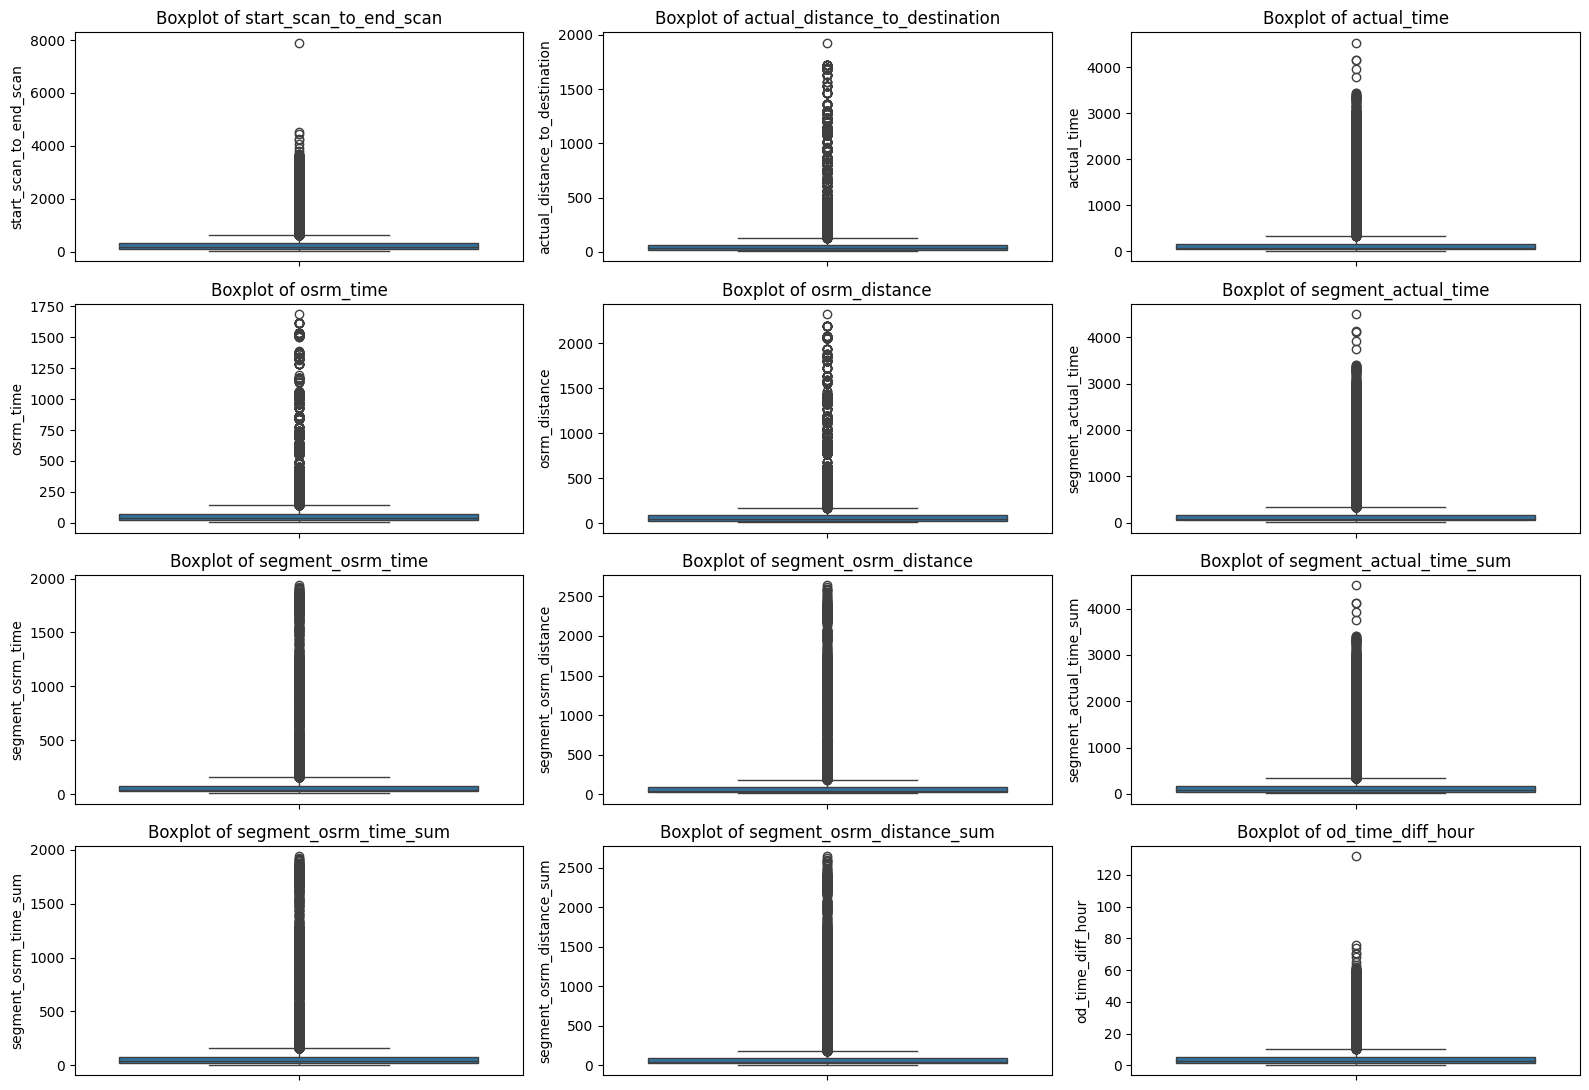

In [ ]:
plt.figure(figsize=(16, 11))

for i in range(len(outlire_df)):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=df[outlire_df[i]])
    plt.title(f'Boxplot of {outlire_df[i]}')
    plt.tight_layout()

plt.show()

In [ ]:
def compare_original_clipped(df, column_list):
    for col in column_list:
        data = df[col]

        # Calculate IQR
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        clipped_data = np.clip(data, lower_bound, upper_bound)

        fig, axes = plt.subplots(1, 2, figsize=(14, 4))
        sns.boxplot(y=data, ax=axes[0], color='skyblue')
        axes[0].set_title(f'Original Boxplot - {col}')
        axes[0].set_ylabel('')

        sns.boxplot(y=clipped_data, ax=axes[1], color='lightgreen')
        axes[1].set_title(f'Clipped Boxplot - {col}')
        axes[1].set_ylabel('')

        plt.tight_layout()
        plt.show()

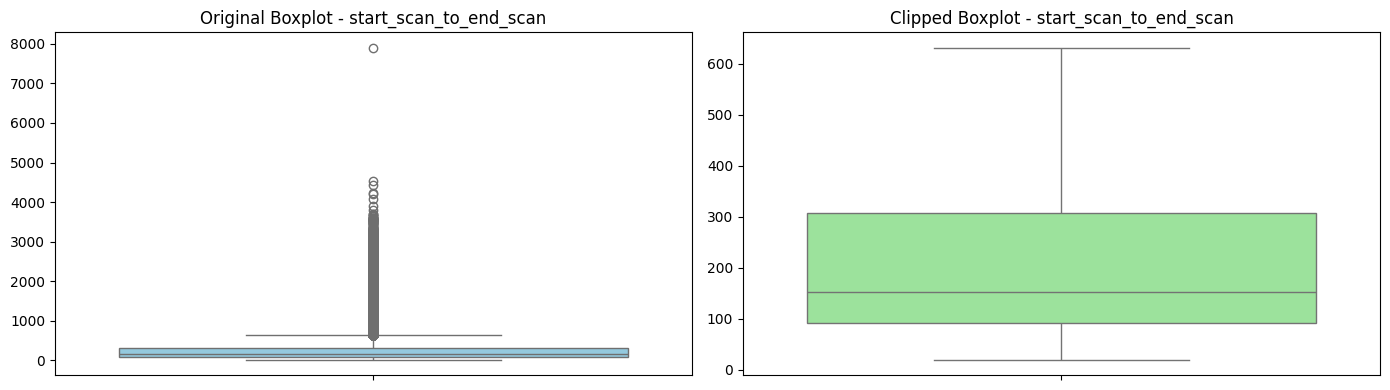

In [ ]:
compare_original_clipped(df, ['start_scan_to_end_scan'])

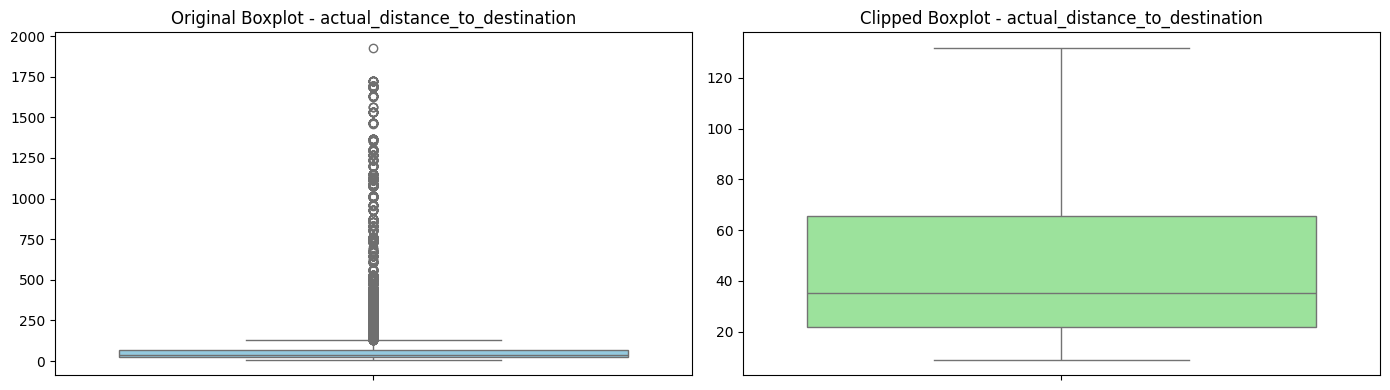

In [ ]:
compare_original_clipped(df, ['actual_distance_to_destination'])

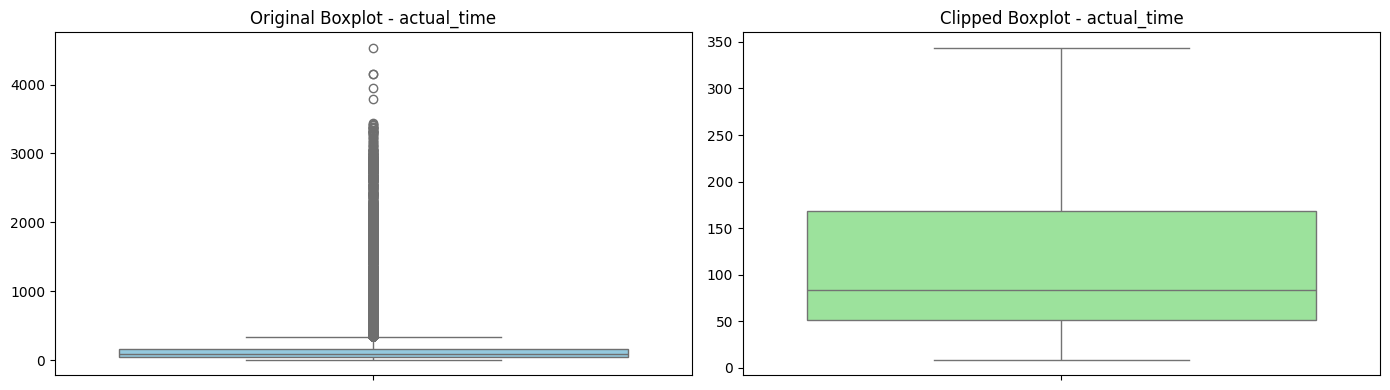

In [ ]:
compare_original_clipped(df, ['actual_time'])

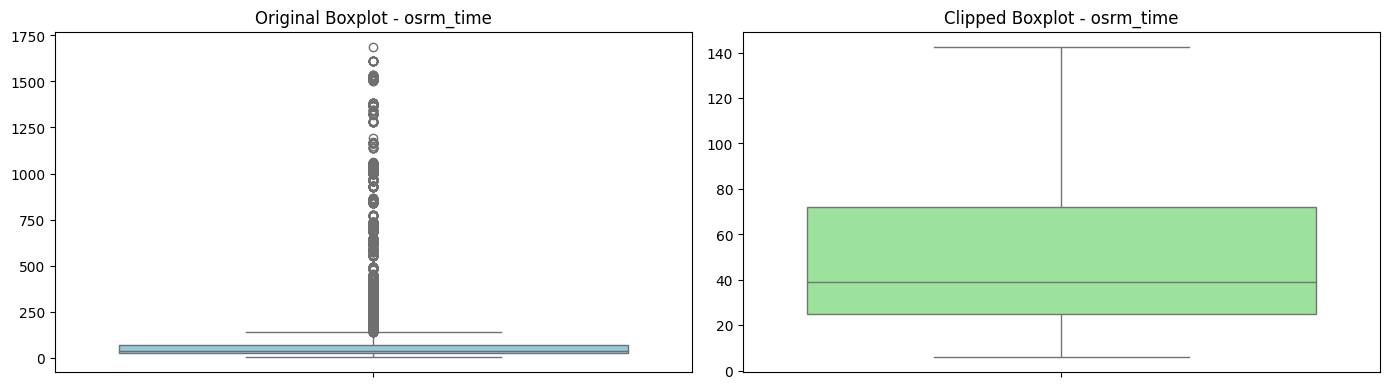

In [ ]:
compare_original_clipped(df, ['osrm_time'])

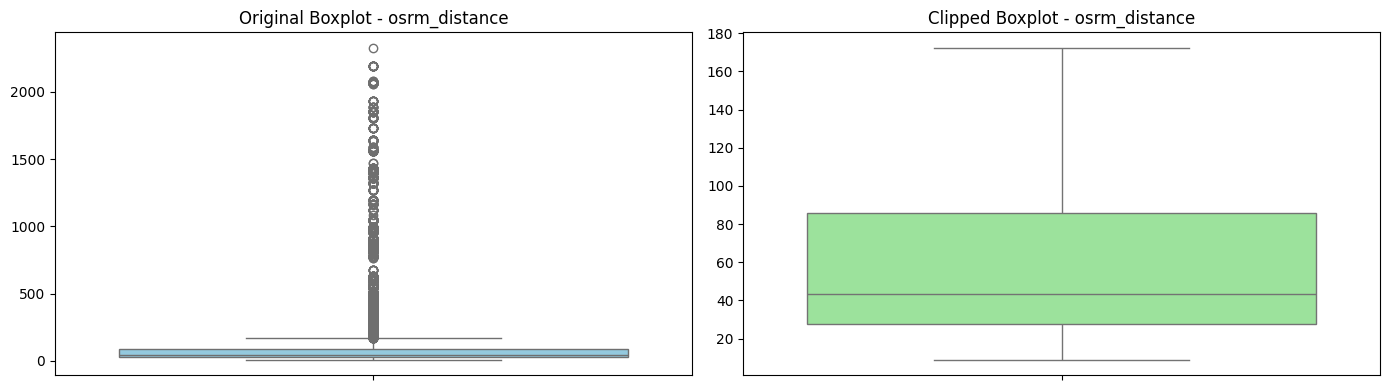

In [ ]:
compare_original_clipped(df, ['osrm_distance'])

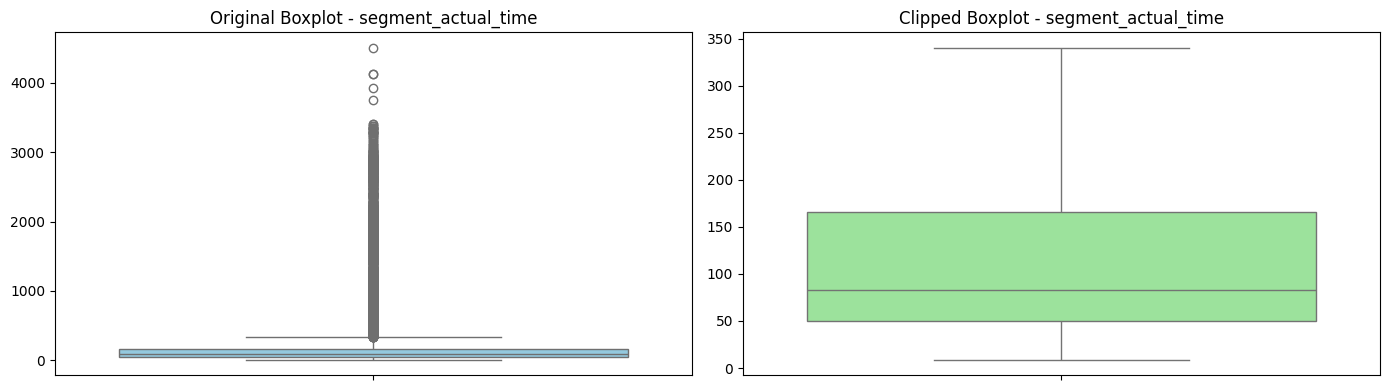

In [ ]:
compare_original_clipped(df, ['segment_actual_time'])

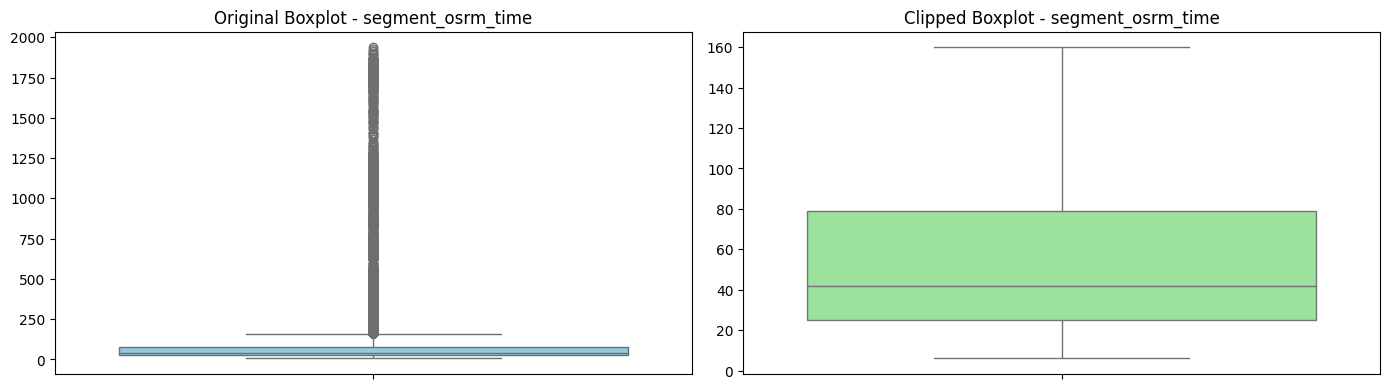

In [ ]:
compare_original_clipped(df, ['segment_osrm_time'])

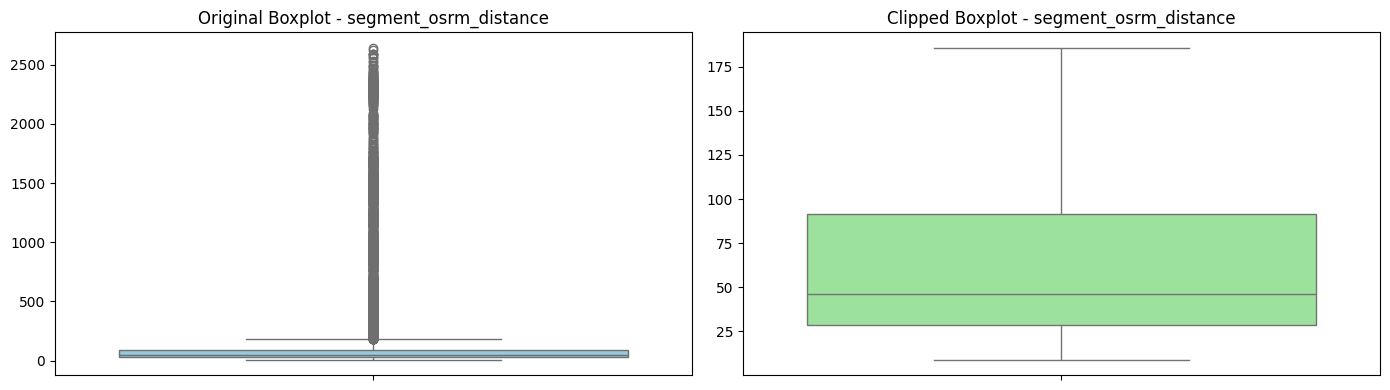

In [ ]:
compare_original_clipped(df, ['segment_osrm_distance'])

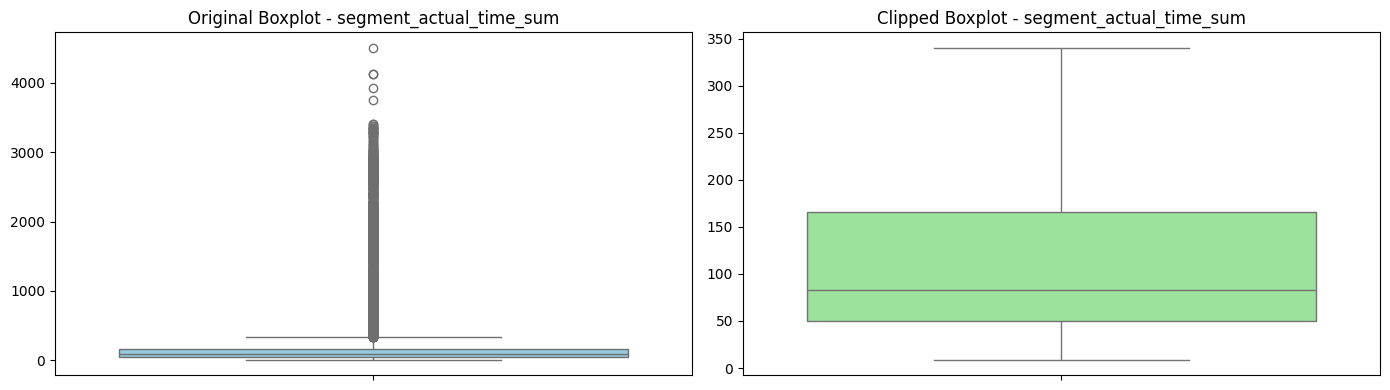

In [ ]:
compare_original_clipped(df, ['segment_actual_time_sum'])

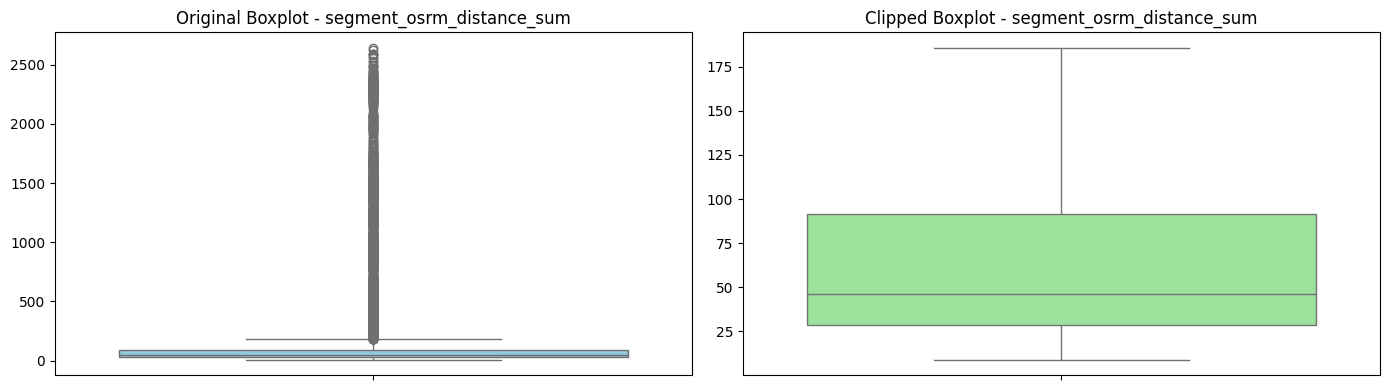

In [ ]:
compare_original_clipped(df, ['segment_osrm_distance_sum'])

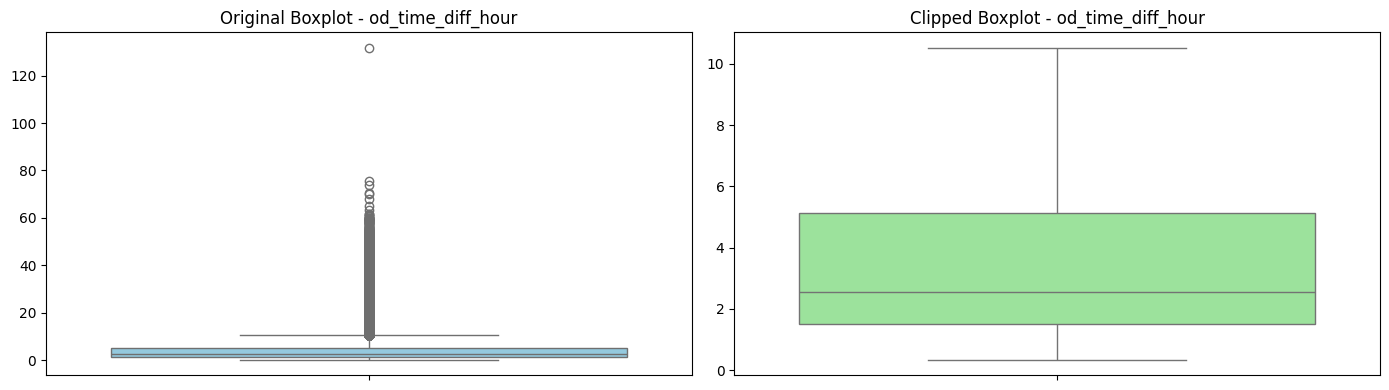

In [ ]:
compare_original_clipped(df, ['od_time_diff_hour'])

In [ ]:
Q1 = np.percentile(df[outlire_df], 25)
Q3 = np.percentile(df[outlire_df], 75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
clipped_num_df = np.clip(df[outlire_df], lower_bound, upper_bound)

filtered_num_df = df[outlire_df][(df[outlire_df] >= lower_bound) | (df[outlire_df] <= upper_bound)]
filtered_num_df

start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                      1260.0                      383.759164        732.0   
1                       999.0                      440.973689        830.0   
2                        58.0                       24.644021         47.0   
3                       122.0                       48.542890         96.0   
4                       834.0                      237.439610        611.0   
...                       ...                             ...          ...   
26363                    62.0                       33.627182         51.0   
26364                    91.0                       33.673835         90.0   
26365                    44.0                       12.661945         30.0   
26366                   287.0                       40.546740        233.0   
26367                    66.0                       25.534793         42.0   

       osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0          329.0       446.5496                728.0              534.0   
1          388.0       544.8027                820.0              474.0   
2           26.0        28.1994                 46.0               26.0   
3           42.0        56.9116                 95.0               39.0   
4          212.0       281.2109                608.0              231.0   
...          ...            ...                  ...                ...   
26363       41.0        42.5213                 49.0               42.0   
26364       48.0        40.6080                 89.0               77.0   
26365       14.0        16.0185                 29.0               14.0   
26366       42.0        52.5303                233.0               42.0   
26367       26.0        28.0484                 41.0               25.0   

       segment_osrm_distance  segment_actual_time_sum  segment_osrm_time_sum  \
0                   670.6205                    728.0                  534.0   
1                   649.8528                    820.0                  474.0   
2                    28.1995                     46.0                   26.0   
3                    55.9899                     95.0                   39.0   
4                   317.7408                    608.0                  231.0   
...                      ...                      ...                    ...   
26363                42.1431                     49.0                   42.0   
26364                78.5869                     89.0                   77.0   
26365                16.0184                     29.0                   14.0   
26366                52.5303                    233.0                   42.0   
26367                28.0484                     41.0                   25.0   

       segment_osrm_distance_sum  od_time_diff_hour  
0                       670.6205          21.010074  
1                       649.8528          16.658423  
2                        28.1995           0.980540  
3                        55.9899           2.046325  
4                       317.7408          13.910649  
...                          ...                ...  
26363                    42.1431           1.035253  
26364                    78.5869           1.518130  
26365                    16.0184           0.736240  
26366                    52.5303           4.791233  
26367                    28.0484           1.115559  

[26368 rows x 12 columns]

In [ ]:
clipped_df_corr = clipped_num_df.corr()
clipped_df_corr

start_scan_to_end_scan  \
start_scan_to_end_scan                        1.000000   
actual_distance_to_destination                0.576313   
actual_time                                   0.779462   
osrm_time                                     0.589446   
osrm_distance                                 0.615214   
segment_actual_time                           0.778106   
segment_osrm_time                             0.607306   
segment_osrm_distance                         0.629866   
segment_actual_time_sum                       0.778106   
segment_osrm_time_sum                         0.607306   
segment_osrm_distance_sum                     0.629866   
od_time_diff_hour                             0.531849   

                                actual_distance_to_destination  actual_time  \
start_scan_to_end_scan                                0.576313     0.779462   
actual_distance_to_destination                        1.000000     0.791448   
actual_time                                           0.791448     1.000000   
osrm_time                                             0.975538     0.799141   
osrm_distance                                         0.981424     0.832446   
segment_actual_time                                   0.792490     0.999916   
segment_osrm_time                                     0.949089     0.813944   
segment_osrm_distance                                 0.962223     0.842914   
segment_actual_time_sum                               0.792490     0.999916   
segment_osrm_time_sum                                 0.949089     0.813944   
segment_osrm_distance_sum                             0.962223     0.842914   
od_time_diff_hour                                     0.716977     0.604997   

                                osrm_time  osrm_distance  segment_actual_time  \
start_scan_to_end_scan           0.589446       0.615214             0.778106   
actual_distance_to_destination   0.975538       0.981424             0.792490   
actual_time                      0.799141       0.832446             0.999916   
osrm_time                        1.000000       0.978984             0.800123   
osrm_distance                    0.978984       1.000000             0.833117   
segment_actual_time              0.800123       0.833117             1.000000   
segment_osrm_time                0.977561       0.963846             0.814513   
segment_osrm_distance            0.961829       0.984144             0.843287   
segment_actual_time_sum          0.800123       0.833117             1.000000   
segment_osrm_time_sum            0.977561       0.963846             0.814513   
segment_osrm_distance_sum        0.961829       0.984144             0.843287   
od_time_diff_hour                0.724513       0.683889             0.606976   

                                segment_osrm_time  segment_osrm_distance  \
start_scan_to_end_scan                   0.607306               0.629866   
actual_distance_to_destination           0.949089               0.962223   
actual_time                              0.813944               0.842914   
osrm_time                                0.977561               0.961829   
osrm_distance                            0.963846               0.984144   
segment_actual_time                      0.814513               0.843287   
segment_osrm_time                        1.000000               0.976368   
segment_osrm_distance                    0.976368               1.000000   
segment_actual_time_sum                  0.814513               0.843287   
segment_osrm_time_sum                    1.000000               0.976368   
segment_osrm_distance_sum                0.976368               1.000000   
od_time_diff_hour                        0.693501               0.668299   

                                segment_actual_time_sum  \
start_scan_to_end_scan                         0.778106   
actual_distance_to_destination                 0.792490   
actual_time                  

In [ ]:
filtered_df_corr = filtered_num_df.corr()
filtered_df_corr

start_scan_to_end_scan  \
start_scan_to_end_scan                        1.000000   
actual_distance_to_destination                0.906266   
actual_time                                   0.954473   
osrm_time                                     0.911197   
osrm_distance                                 0.911361   
segment_actual_time                           0.954460   
segment_osrm_time                             0.904397   
segment_osrm_distance                         0.908123   
segment_actual_time_sum                       0.954460   
segment_osrm_time_sum                         0.904397   
segment_osrm_distance_sum                     0.908123   
od_time_diff_hour                             0.999796   

                                actual_distance_to_destination  actual_time  \
start_scan_to_end_scan                                0.906266     0.954473   
actual_distance_to_destination                        1.000000     0.948995   
actual_time                                           0.948995     1.000000   
osrm_time                                             0.994893     0.953152   
osrm_distance                                         0.997217     0.953845   
segment_actual_time                                   0.947989     0.999988   
segment_osrm_time                                     0.987161     0.947958   
segment_osrm_distance                                 0.992742     0.952183   
segment_actual_time_sum                               0.947989     0.999988   
segment_osrm_time_sum                                 0.987161     0.947958   
segment_osrm_distance_sum                             0.992742     0.952183   
od_time_diff_hour                                     0.905960     0.954179   

                                osrm_time  osrm_distance  segment_actual_time  \
start_scan_to_end_scan           0.911197       0.911361             0.954460   
actual_distance_to_destination   0.994893       0.997217             0.947989   
actual_time                      0.953152       0.953845             0.999988   
osrm_time                        1.000000       0.998384             0.952218   
osrm_distance                    0.998384       1.000000             0.952905   
segment_actual_time              0.952218       0.952905             1.000000   
segment_osrm_time                0.992269       0.990975             0.947032   
segment_osrm_distance            0.992677       0.994311             0.951255   
segment_actual_time_sum          0.952218       0.952905             1.000000   
segment_osrm_time_sum            0.992269       0.990975             0.947032   
segment_osrm_distance_sum        0.992677       0.994311             0.951255   
od_time_diff_hour                0.910880       0.911049             0.954215   

                                segment_osrm_time  segment_osrm_distance  \
start_scan_to_end_scan                   0.904397               0.908123   
actual_distance_to_destination           0.987161               0.992742   
actual_time                              0.947958               0.952183   
osrm_time                                0.992269               0.992677   
osrm_distance                            0.990975               0.994311   
segment_actual_time                      0.947032               0.951255   
segment_osrm_time                        1.000000               0.996500   
segment_osrm_distance                    0.996500               1.000000   
segment_actual_time_sum                  0.947032               0.951255   
segment_osrm_time_sum                    1.000000               0.996500   
segment_osrm_distance_sum                0.996500               1.000000   
od_time_diff_hour                        0.904096               0.907827   

                                segment_actual_time_sum  \
start_scan_to_end_scan                         0.954460   
actual_distance_to_destination                 0.947989   
actual_time                  

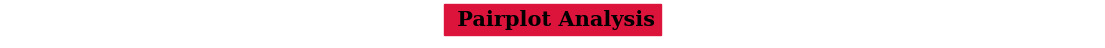

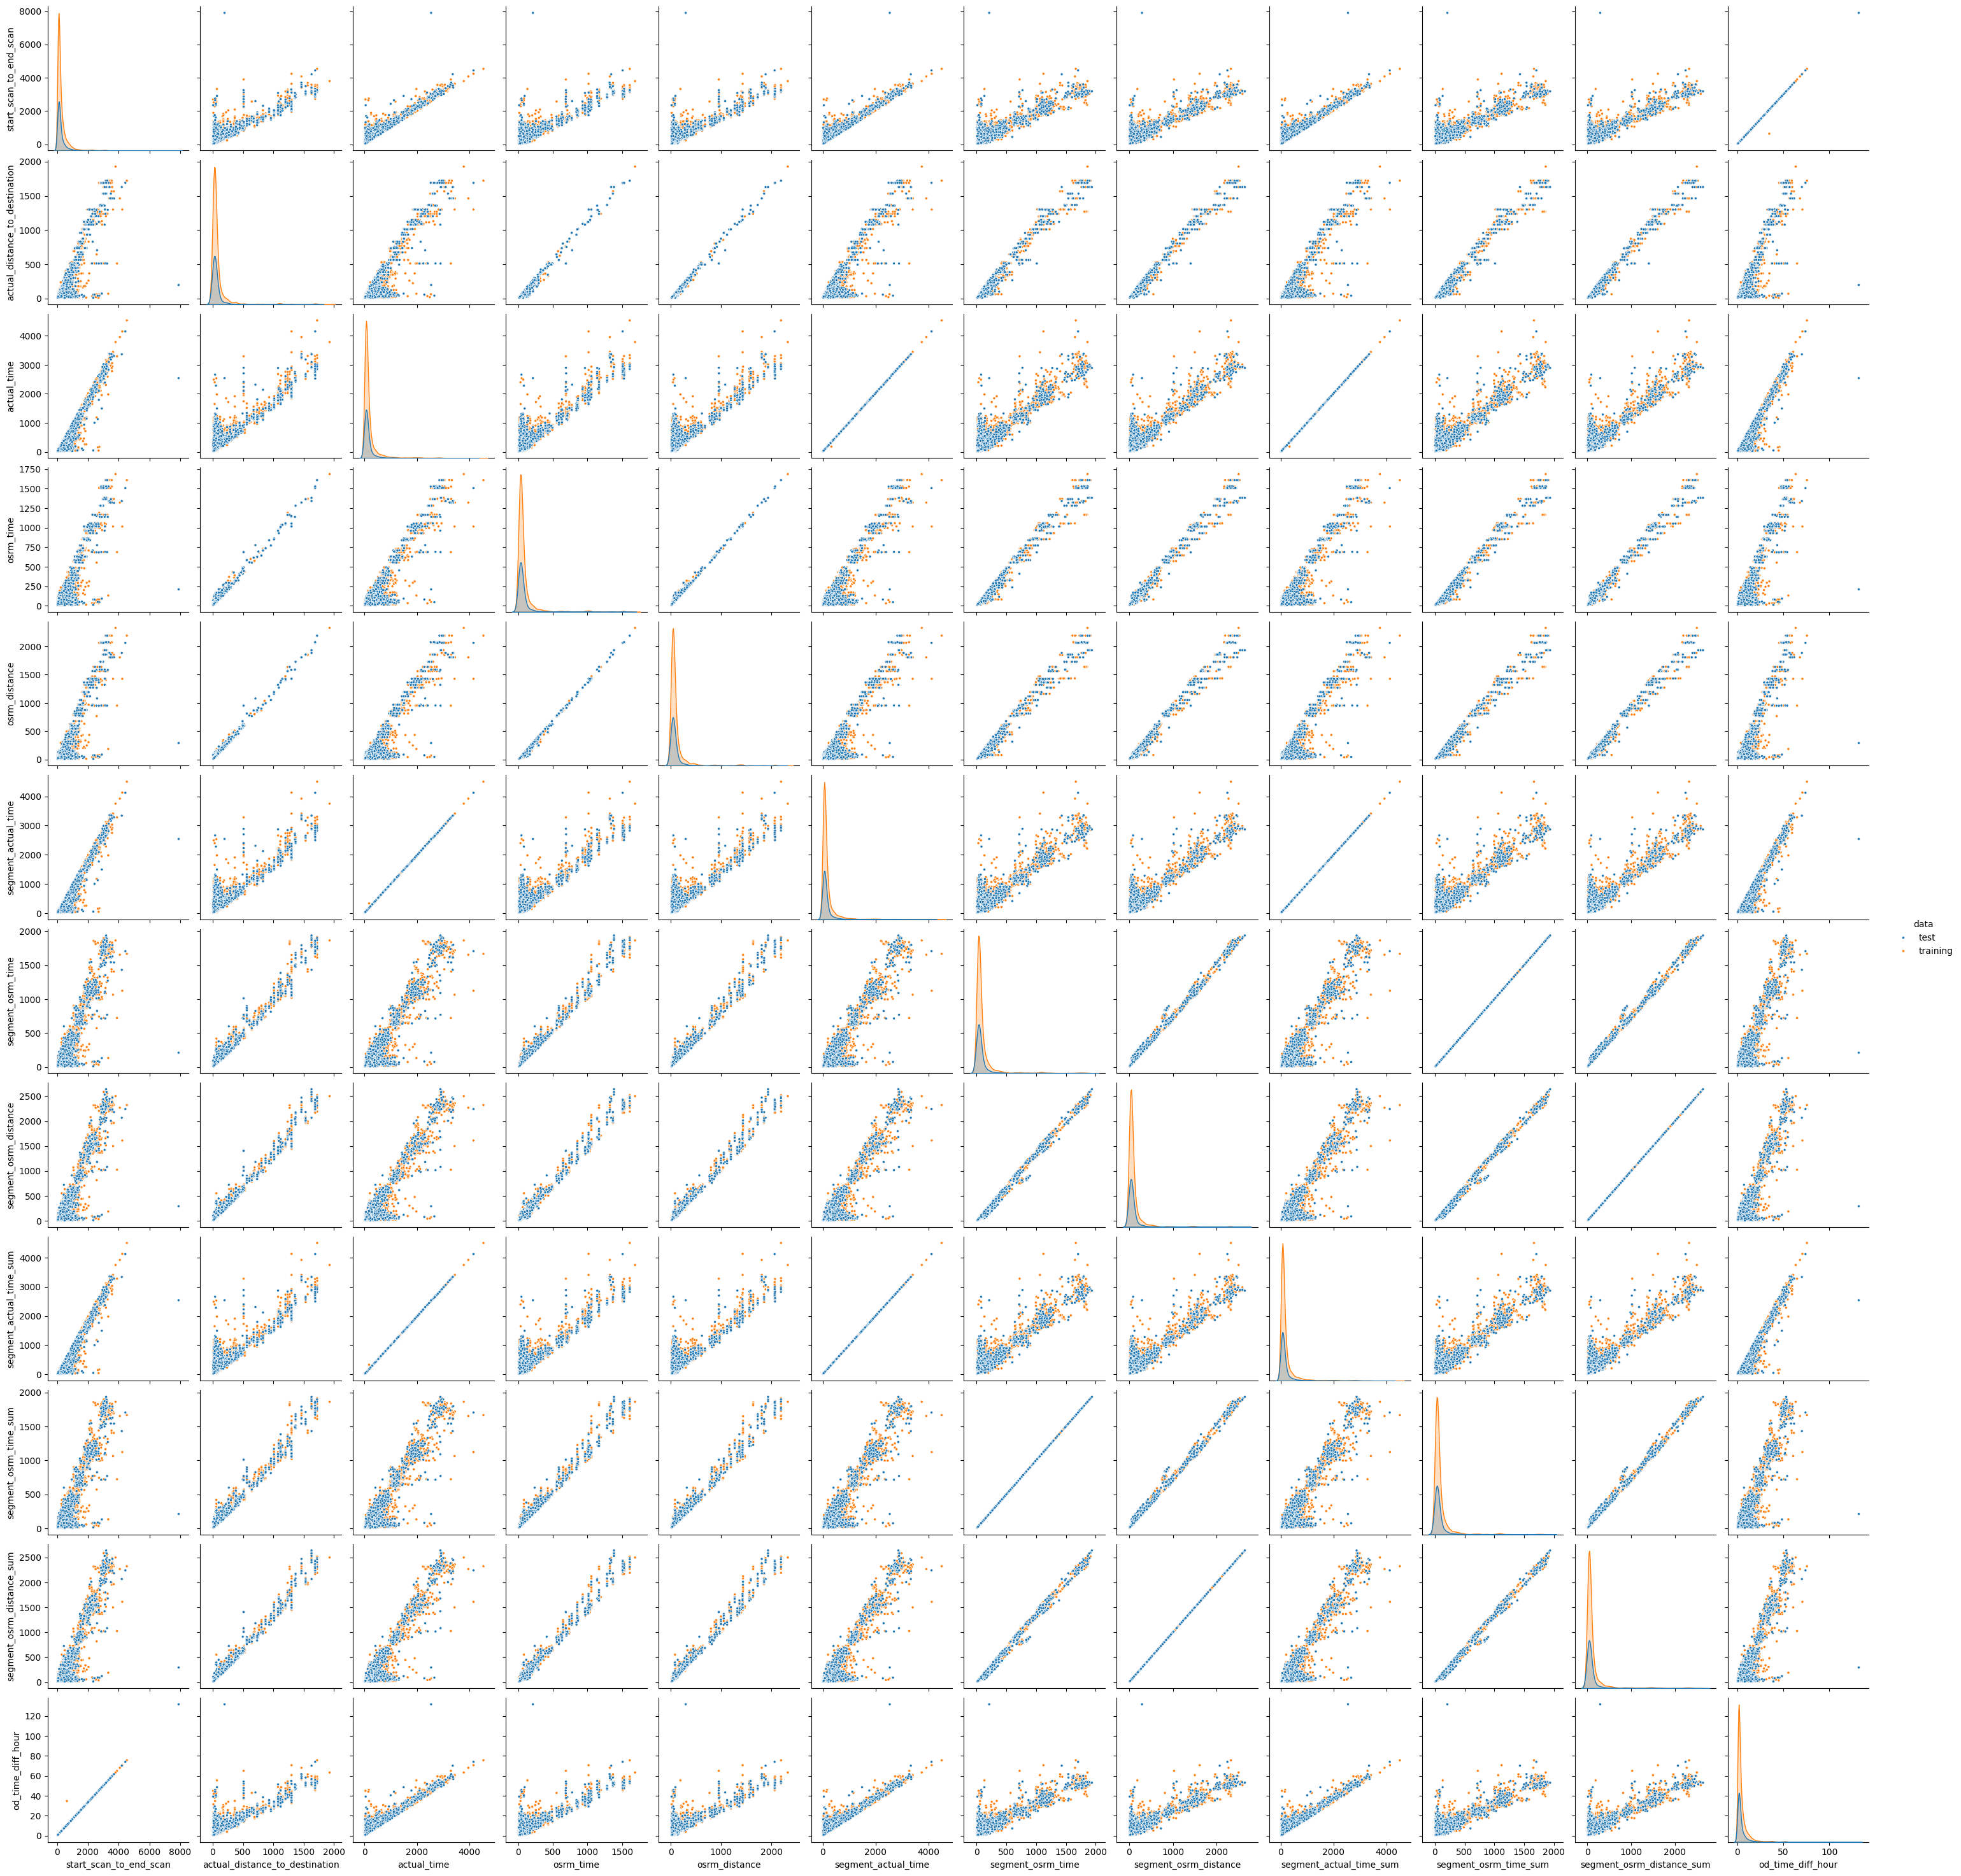

In [ ]:
plt.figure(figsize=(14,0.05))
plt.axis('off')
plt.title(f' Pairplot Analysis', fontfamily = 'serif', fontweight = 'bold', fontsize = 15, backgroundcolor = 'crimson')
sns.pairplot(data = df, vars = outlire_df, hue ='data',markers = '.')
plt.show()

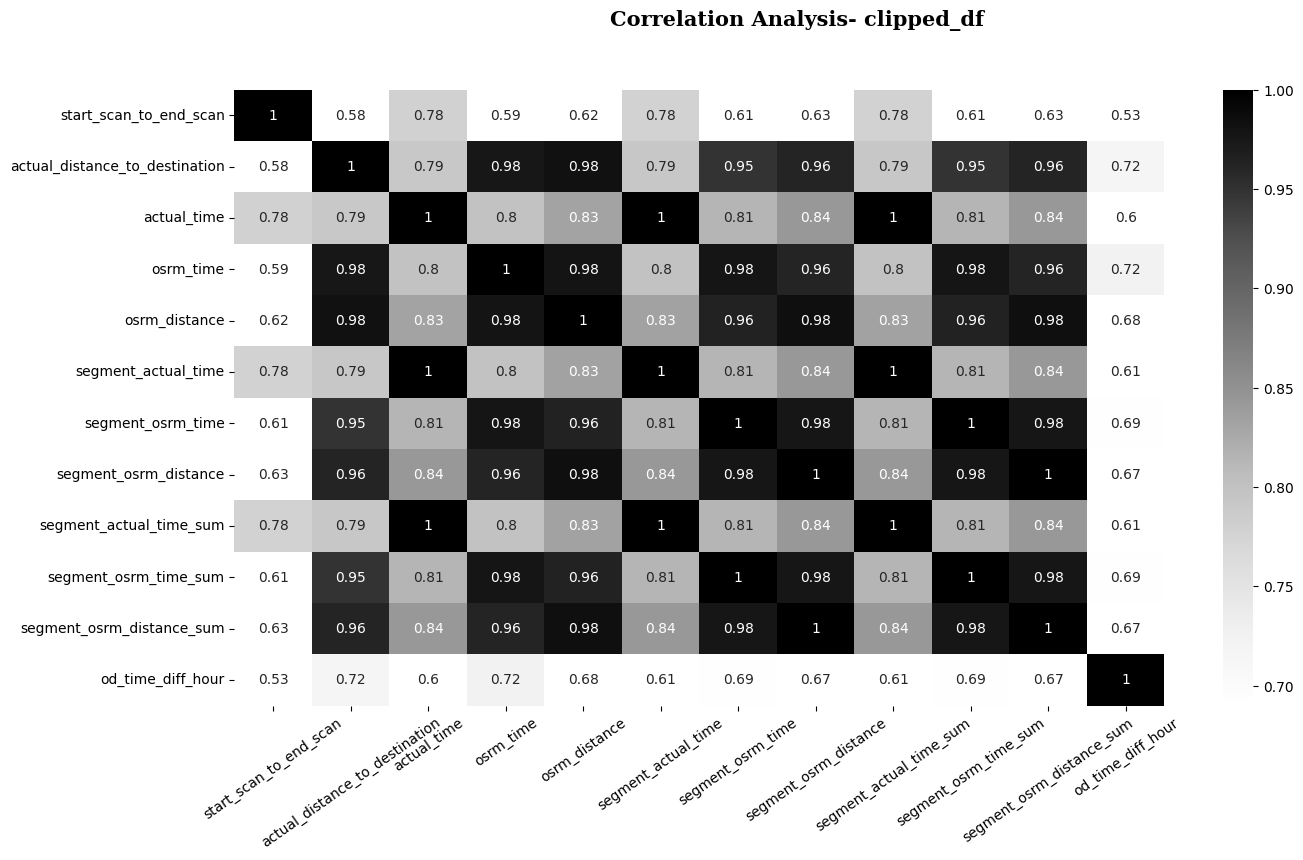

In [ ]:
plt.figure(figsize = (15,8))
plt.suptitle(f'Correlation Analysis- clipped_df', fontfamily = 'serif', fontweight = 'bold', fontsize = 15)
sns.heatmap(data = clipped_df_corr, vmin = 0.69, annot = True, cmap = 'Greys')
plt.xticks(rotation = 35)
plt.show()

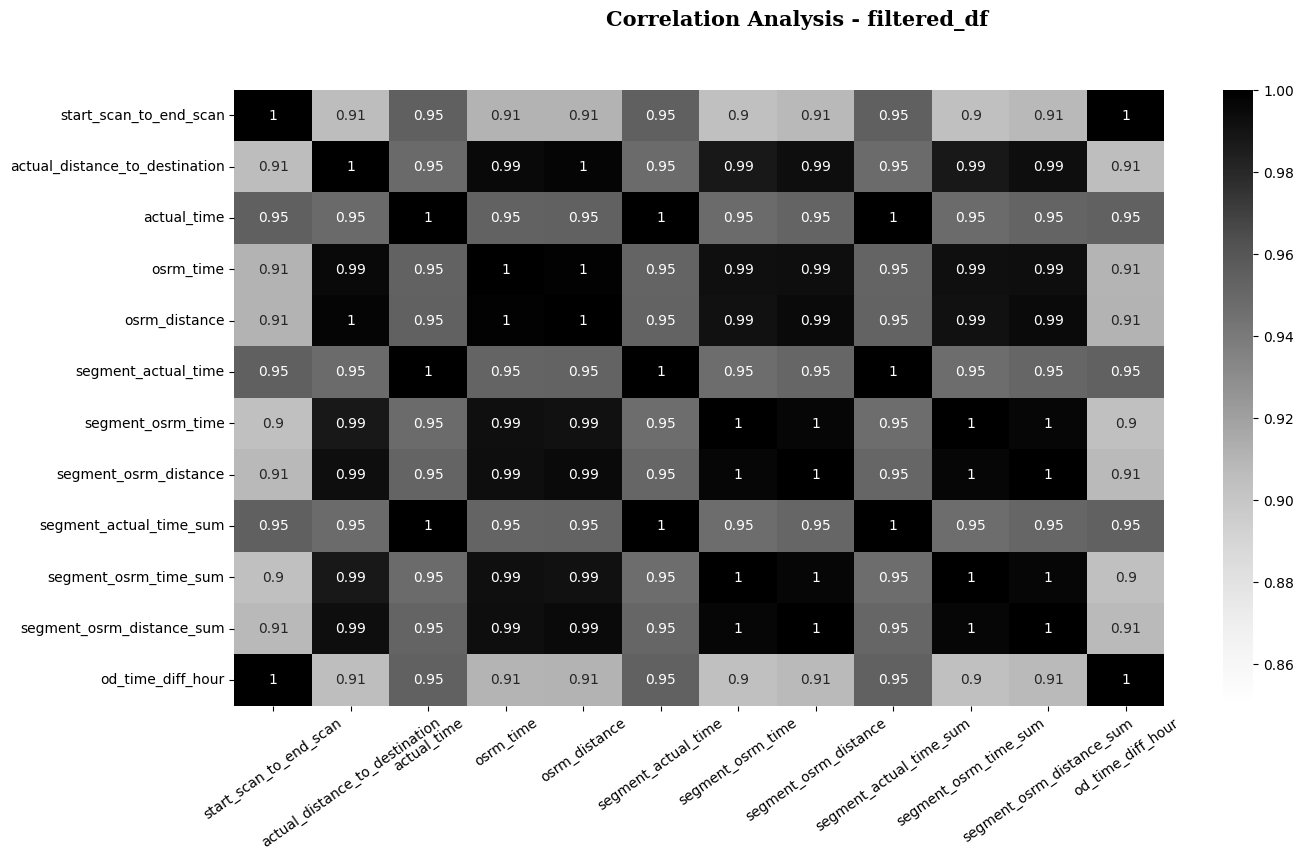

In [ ]:
plt.figure(figsize=(15, 8))
plt.suptitle('Correlation Analysis - filtered_df', fontfamily='serif', fontweight='bold', fontsize=15)
sns.heatmap(data = filtered_df_corr, vmin = 0.85, annot = True, cmap = 'Greys')
plt.xticks(rotation = 35)
plt.show()

In [ ]:
num_col = df.select_dtypes(include=['int64', 'float64'])
num_col.skew()

start_scan_to_end_scan            4.214109
actual_distance_to_destination    5.162747
actual_time                       4.775808
osrm_time                         5.115344
osrm_distance                     5.155178
segment_actual_time               4.771217
segment_osrm_time                 5.231527
segment_osrm_distance             5.286599
segment_actual_time_sum           4.771217
segment_osrm_time_sum             5.231527
segment_osrm_distance_sum         5.286599
od_time_diff_hour                 4.212476
dtype: float64

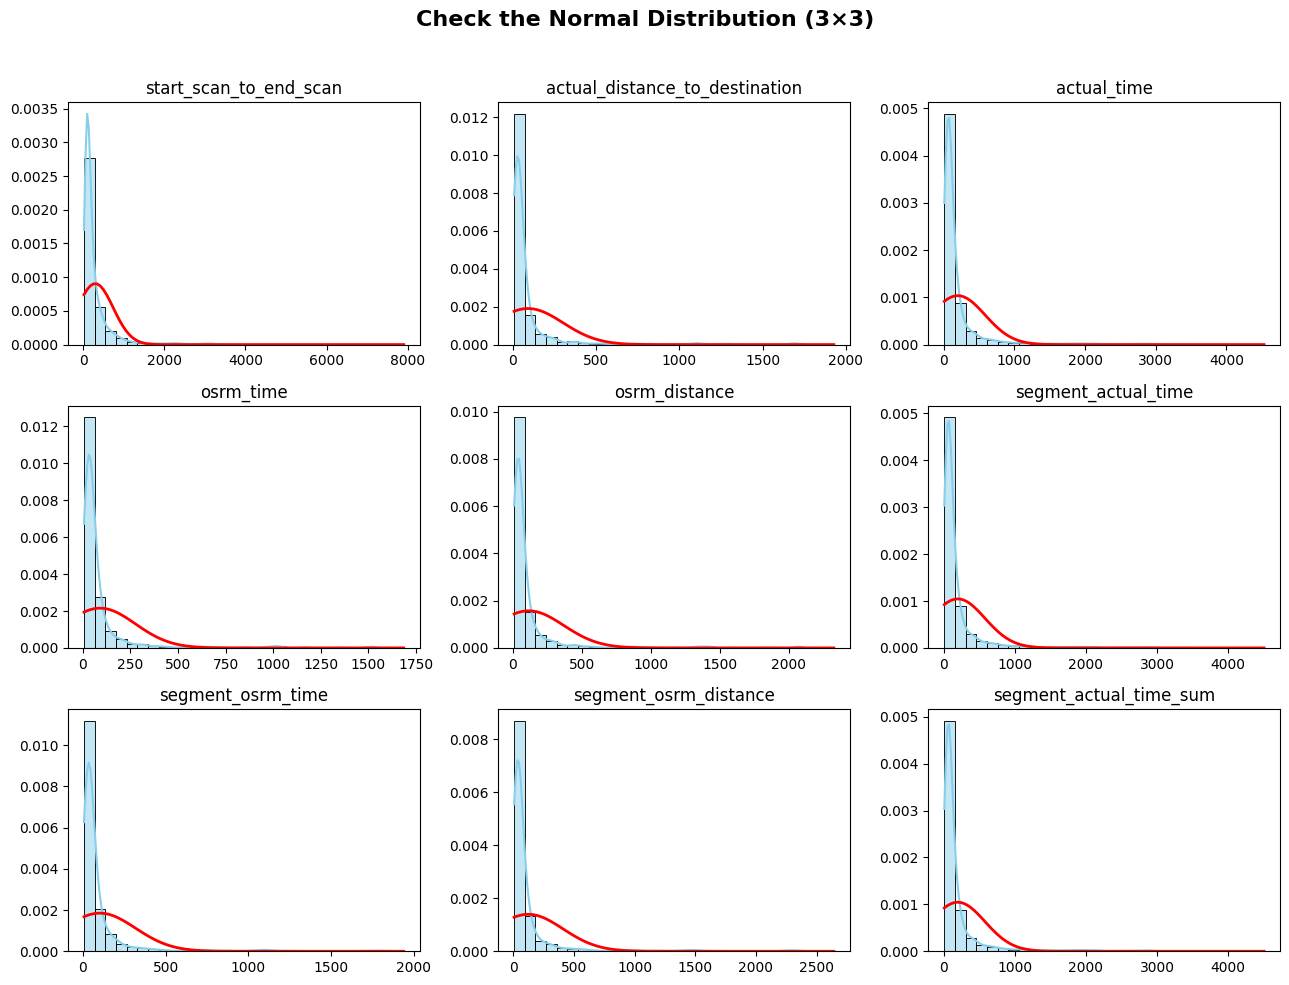

In [ ]:
def plot_all_bell_curves(trip_df):
    cols = num_col.columns[:9]
    fig, axes = plt.subplots(3, 3, figsize=(13, 10))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        data = num_col[col].dropna()
        x = np.linspace(data.min(), data.max(), 100)
        sns.histplot(data, bins=30, kde=True, stat='density', color='skyblue', ax=axes[i])
        axes[i].plot(x, norm.pdf(x, data.mean(), data.std()), color='red', lw=2)
        axes[i].set_title(col, fontsize=12)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

    fig.suptitle("Check the Normal Distribution", fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_all_bell_curves(df)

## 1️⃣🔖one-hot encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   segment_key                     26368 non-null  object         
 1   trip_uuid                       26368 non-null  object         
 2   data                            26368 non-null  category       
 3   route_type                      26368 non-null  category       
 4   trip_creation_time              26368 non-null  datetime64[ns] 
 5   year                            26368 non-null  category       
 6   month_name                      26368 non-null  category       
 7   week_days                       26368 non-null  category       
 8   hours                           26368 non-null  int32          
 9   weeks                           26368 non-null  UInt32         
 10  source_state_name               26368 non-null  object    

In [ ]:
# Display Full Array in NumPy Console Output
np.set_printoptions(threshold=np.inf)

In [ ]:
df['state_corridor'] = df['source_state_name'] + '<---> ' + df['destination_state_name']
df['state_corridor'].value_counts().head(10)

state_corridor
Maharashtra<---> Maharashtra          3255
Karnataka<---> Karnataka              3158
Tamil Nadu<---> Tamil Nadu            2021
Uttar Pradesh<---> Uttar Pradesh      1526
Telangana<---> Telangana              1315
West Bengal<---> West Bengal          1296
Gujarat<---> Gujarat                  1279
Andhra Pradesh<---> Andhra Pradesh    1139
Rajasthan<---> Rajasthan              1054
Bihar<---> Bihar                      1011
Name: count, dtype: int64

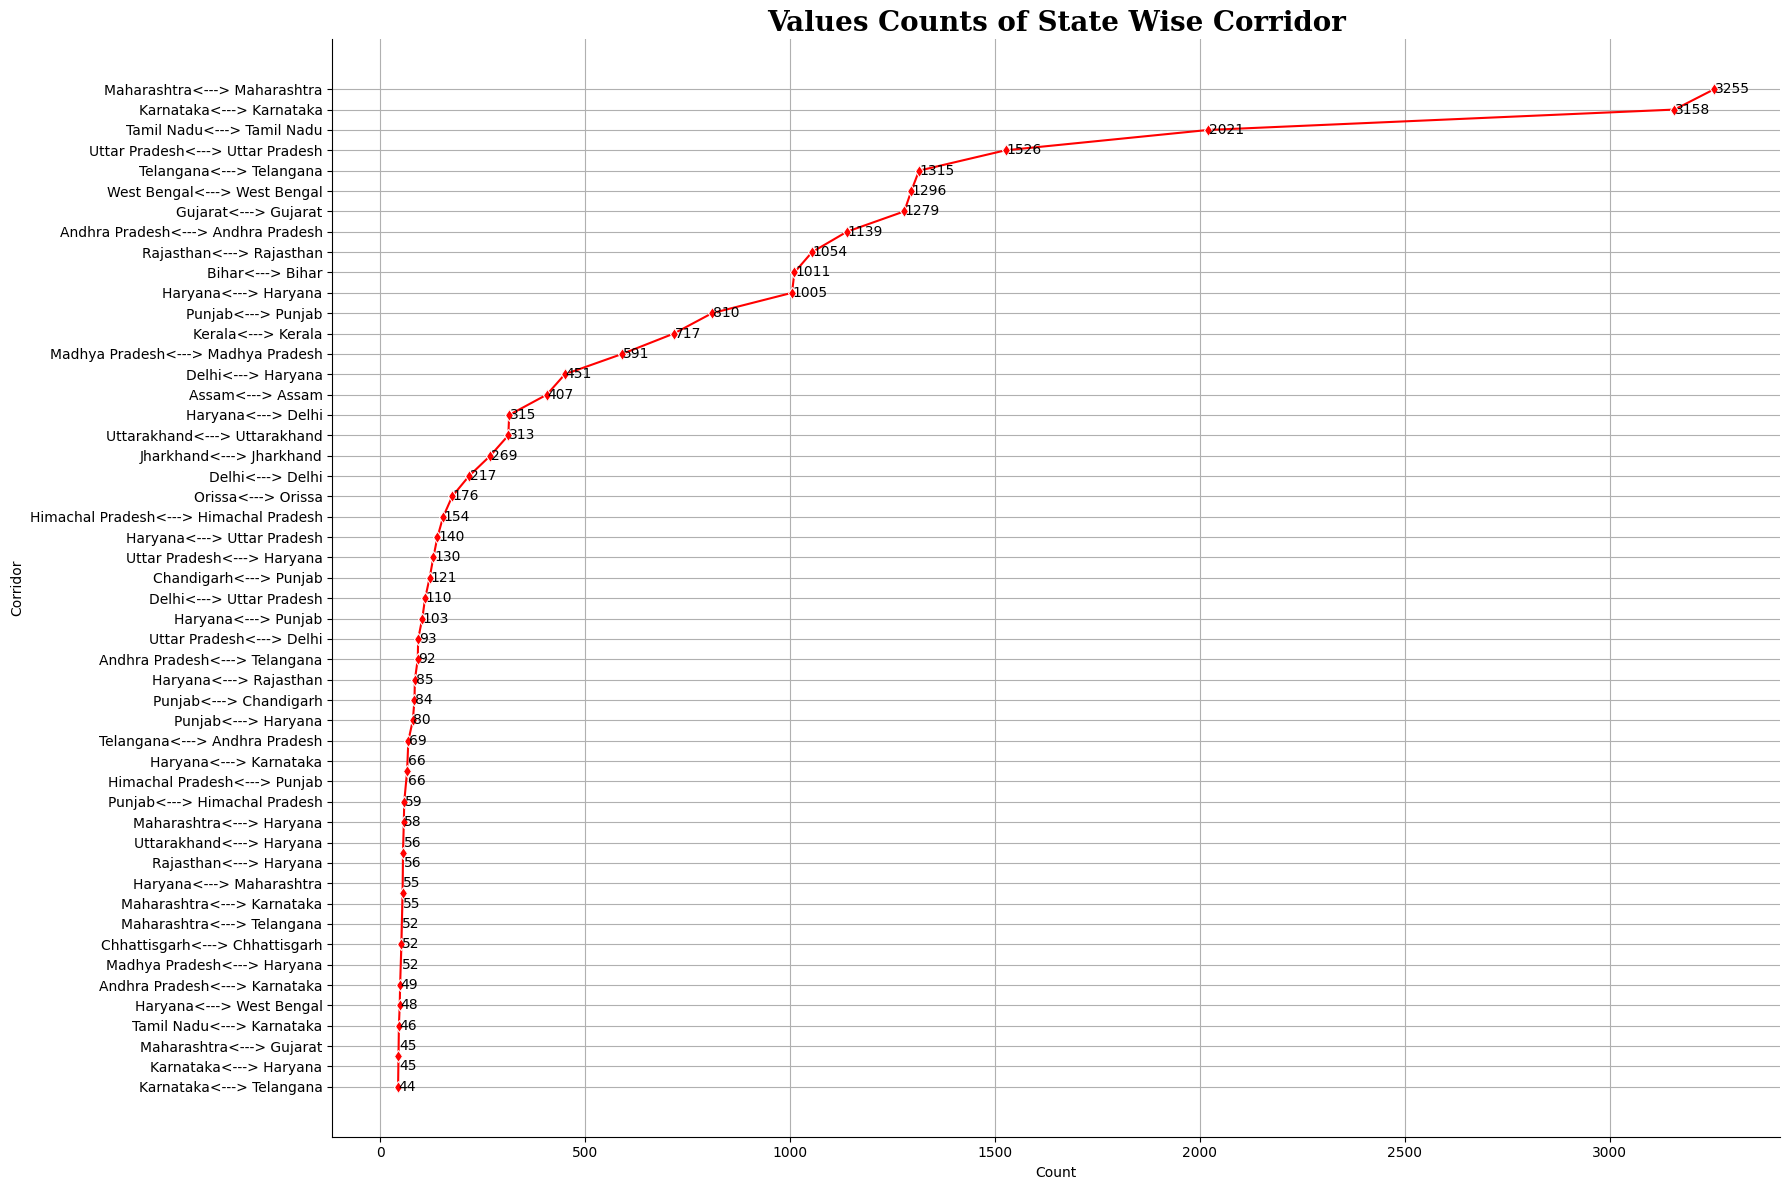

In [ ]:
corridor_counts = df['state_corridor'].value_counts()[:50]

plt.figure(figsize=(18,12))

sns.lineplot(y=corridor_counts.index, x = corridor_counts.values, marker = 'd', color = 'r')
plt.title('Values Counts of State Wise Corridor', fontsize = 20,fontfamily = 'serif',fontweight = 'bold')
plt.ylabel('Corridor')
plt.xlabel('Count')
plt.tight_layout()
sns.despine()
plt.grid(True)

for i, count in enumerate(corridor_counts.values):
    plt.text(count+1.5, corridor_counts.index[i], str(count), ha = 'left', va = 'center')

plt.show()

In [ ]:
df['city_corridor'] = df['source_city_name'] +' <---> '+ df['destination_city_name']
df['city_corridor'].value_counts().head(10)

city_corridor
Bengaluru <---> Bengaluru                1413
Bhiwandi <---> Mumbai                     407
Hyderabad <---> Hyderabad                 316
Mumbai <---> Mumbai                       286
Mumbai <---> Bhiwandi                     282
Delhi <---> Gurgaon                       248
Chennai <---> Chennai                     246
Gurgaon <---> Delhi                       237
Mumbai Hub (Maharashtra) <---> Mumbai     227
Chandigarh <---> Chandigarh               221
Name: count, dtype: int64

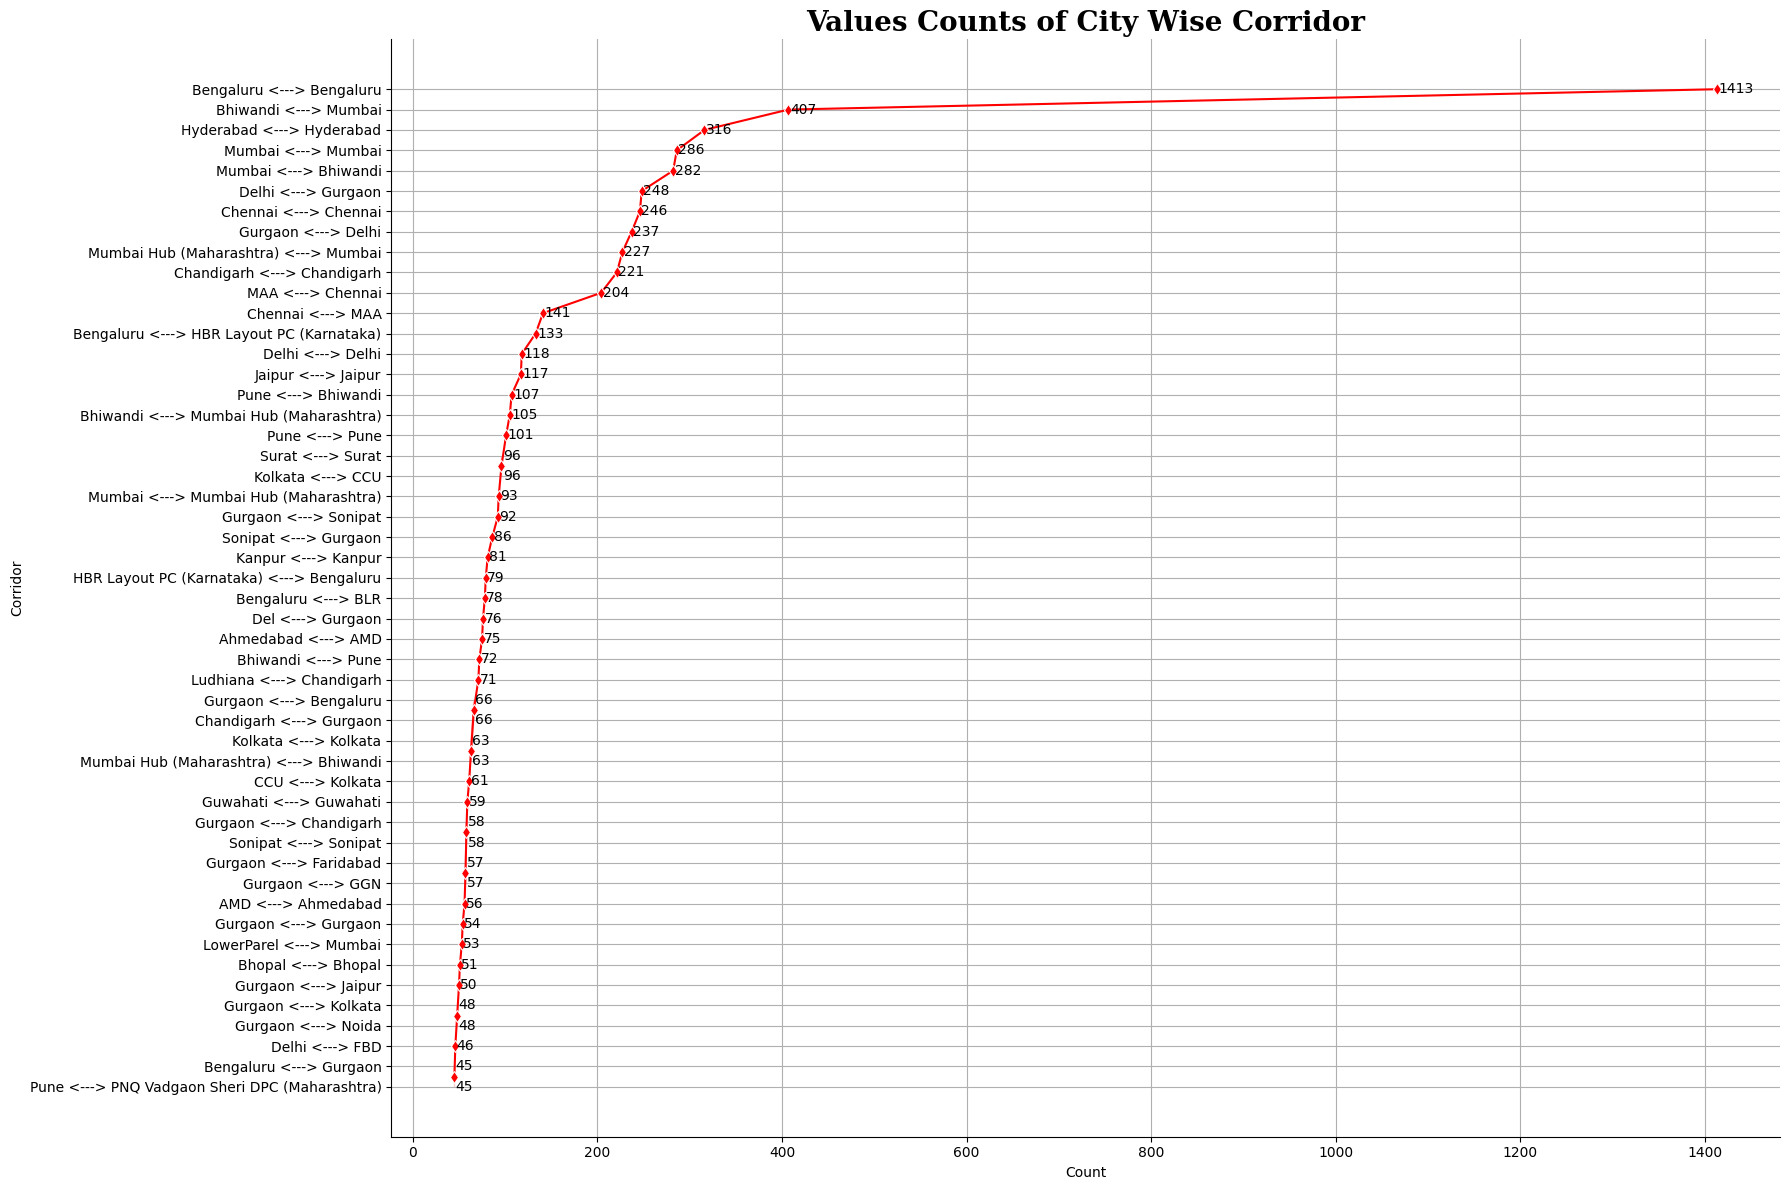

In [ ]:
corridor_counts = df['city_corridor'].value_counts()[:50]

plt.figure(figsize=(18,12))

sns.lineplot(y=corridor_counts.index, x = corridor_counts.values, marker = 'd', color = 'r')
plt.title('Values Counts of City Wise Corridor', fontsize = 20,fontfamily = 'serif',fontweight = 'bold')
plt.ylabel('Corridor')
plt.xlabel('Count')
plt.tight_layout()
sns.despine()
plt.grid(True)

for i, count in enumerate(corridor_counts.values):
    plt.text(count+1.5, corridor_counts.index[i], str(count), ha = 'left', va = 'center')

plt.show()

In [ ]:
df['place_corridor'] = df['source_place_name'] +' <---> '+ df['destination_place_name']
df['place_corridor'].value_counts().head(10)

place_corridor
Central <---> Central      402
Nelmngla <---> KGAirprt    151
Nelmngla <---> Bomsndra    127
Bomsndra <---> KGAirprt    121
KGAirprt <---> Nelmngla    108
Tathawde <---> Mankoli     107
Mankoli <---> Unkown       105
Bomsndra <---> Nelmngla    102
Gateway <---> Bilaspur     100
Chndivli <---> Mankoli      99
Name: count, dtype: int64

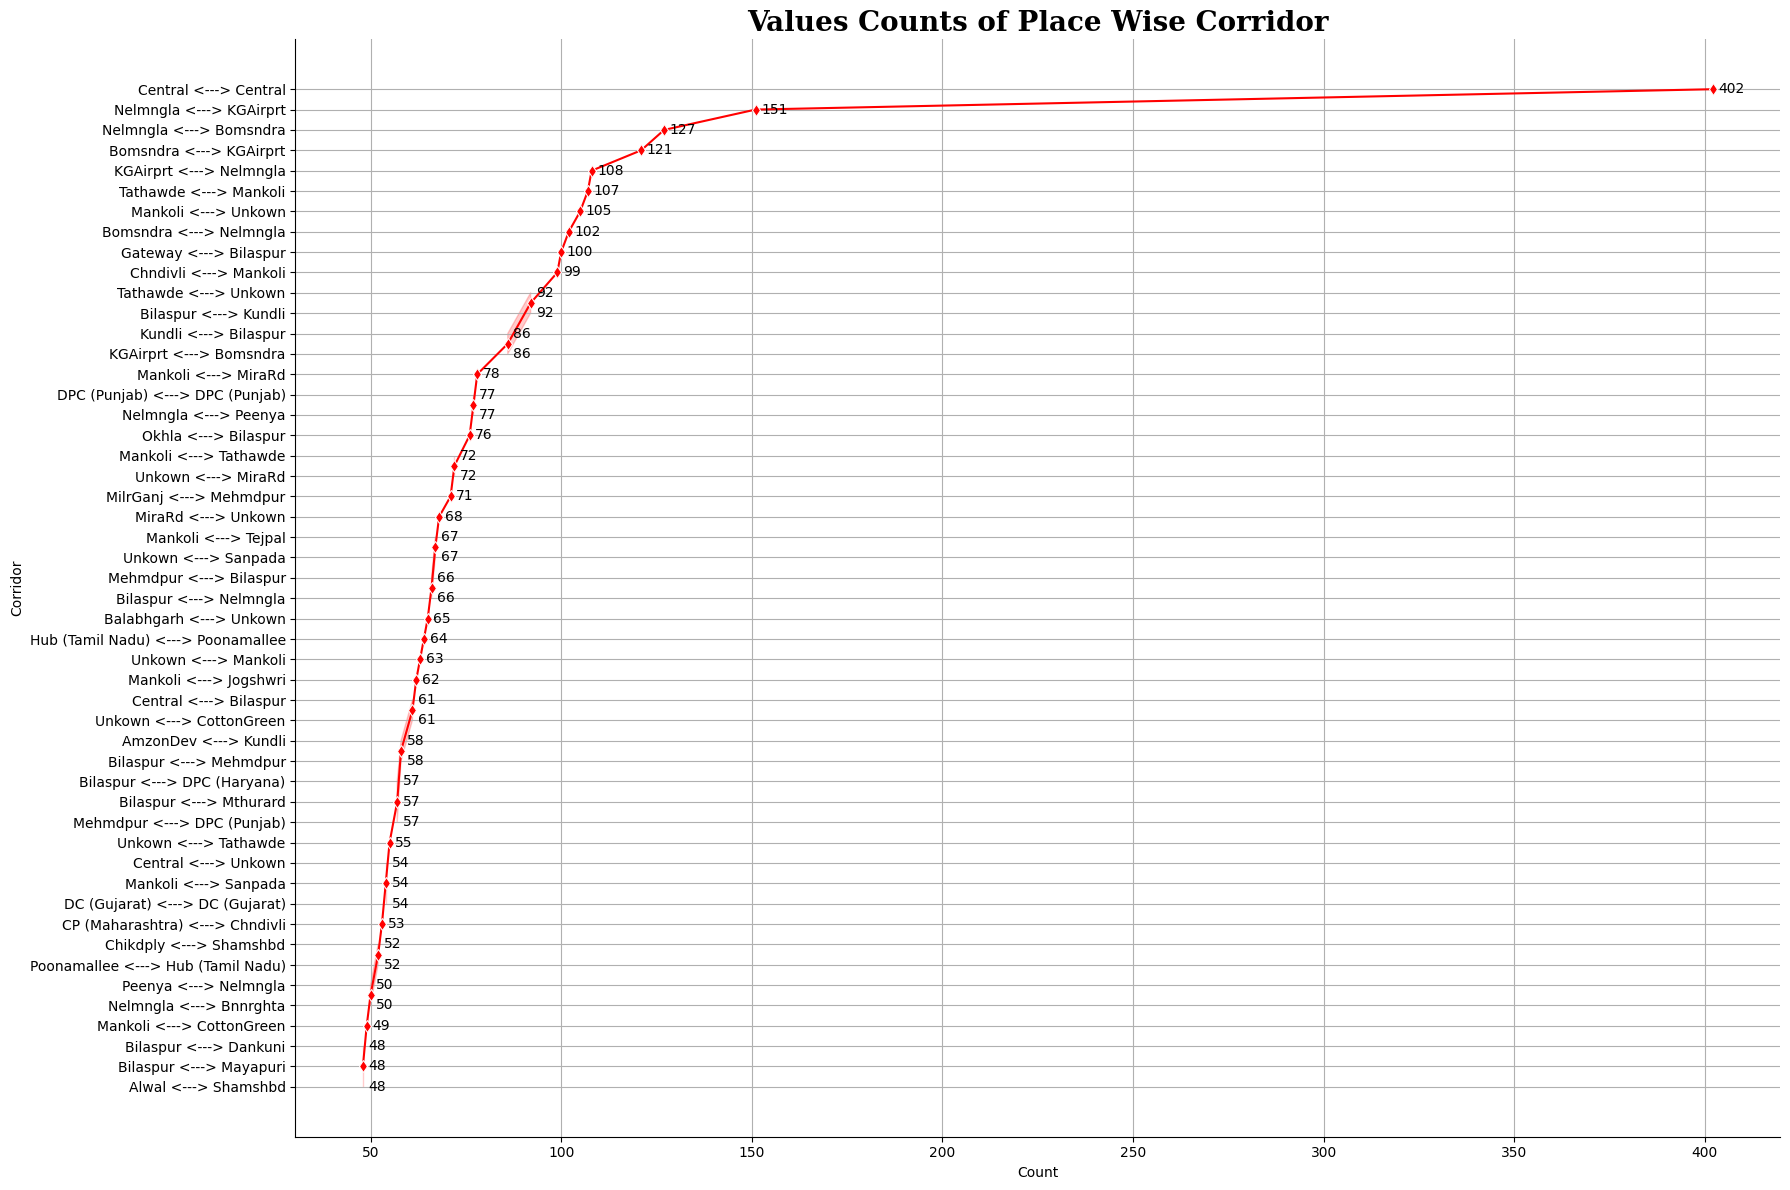

In [ ]:
corridor_counts = df['place_corridor'].value_counts()[:50]

plt.figure(figsize=(18,12))

sns.lineplot(y=corridor_counts.index, x = corridor_counts.values, marker = 'd', color = 'r')
plt.title('Values Counts of Place Wise Corridor', fontsize = 20,fontfamily = 'serif',fontweight = 'bold')
plt.ylabel('Corridor')
plt.xlabel('Count')
plt.tight_layout()
sns.despine()
plt.grid(True)

for i, count in enumerate(corridor_counts.values):
    plt.text(count+1.5, corridor_counts.index[i], str(count), ha = 'left', va = 'center')

plt.show()

In [ ]:
df.head()

segment_key           trip_uuid      data  \
0  153671041653548748 + 209304-AAA + 000000-ACB  153671041653548748  training   
1  153671041653548748 + 462022-AAA + 209304-AAA  153671041653548748  training   
2  153671042288605164 + 561203-AAB + 562101-AAA  153671042288605164  training   
3  153671042288605164 + 572101-AAA + 561203-AAB  153671042288605164  training   
4  153671043369099517 + 000000-ACB + 160002-AAC  153671043369099517  training   

  route_type         trip_creation_time  year month_name  week_days  hours  \
0        FTL 2018-09-12 00:00:16.535741  2018  September  Wednesday      0   
1        FTL 2018-09-12 00:00:16.535741  2018  September  Wednesday      0   
2    Carting 2018-09-12 00:00:22.886430  2018  September  Wednesday      0   
3    Carting 2018-09-12 00:00:22.886430  2018  September  Wednesday      0   
4        FTL 2018-09-12 00:00:33.691250  2018  September  Wednesday      0   

   weeks source_state_name source_city_name source_place_name  \
0     37     Uttar Pradesh           Kanpur           Central   
1     37    Madhya Pradesh           Bhopal          Trnsport   
2     37         Karnataka       Doddablpur          ChikaDPP   
3     37         Karnataka           Tumkur          Veersagr   
4     37           Haryana          Gurgaon          Bilaspur   

  destination_state_name destination_city_name destination_place_name  \
0                Haryana               Gurgaon               Bilaspur   
1          Uttar Pradesh                Kanpur                Central   
2              Karnataka            Chikblapur               ShntiSgr   
3              Karnataka            Doddablpur               ChikaDPP   
4                 Punjab            Chandigarh               Mehmdpur   

               od_start_time                od_end_time  \
0 2018-09-12 16:39:46.858469 2018-09-13 13:40:23.123744   
1 2018-09-12 00:00:16.535741 2018-09-12 16:39:46.858469   
2 2018-09-12 02:03:09.655591 2018-09-12 03:01:59.598855   
3 2018-09-12 00:00:22.886430 2018-09-12 02:03:09.655591   
4 2018-09-14 03:40:17.106733 2018-09-14 17:34:55.442454   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                  1260.0                      383.759164        732.0   
1                   999.0                      440.973689        830.0   
2                    58.0                       24.644021         47.0   
3                   122.0                       48.542890         96.0   
4                   834.0                      237.439610        611.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0      329.0       446.5496                728.0              534.0   
1      388.0       544.8027                820.0              474.0   
2       26.0        28.1994                 46.0               26.0   
3       42.0        56.9116                 95.0               39.0   
4      212.0       281.2109                608.0              231.0   

   segment_osrm_distance  segment_actual_time_sum  segment_osrm_time_sum  \
0               670.6205                    728.0                  534.0   
1               649.8528                    820.0                  474.0   
2                28.1995                     46.0                   26.0   
3                55.9899                     95.0                   39.0   
4               317.7408                    608.0                  231.0   

   segment_osrm_distance_sum          od_total_time  od_time_diff_hour  \
0                   670.6205 0 days 21:00:36.265275          21.010074   
1                   649.8528 0 days 16:39:30.322728          16.658423   
2                    28.1995 0 days 00:58:49.943264           0.980540   
3                    55.9899 0 days 02:02:46.769161           2.046325   
4                   317.7408 0 days 13:54:38.335721          13.910649   

                      state_corridor                city_corridor  \
0         Uttar Pradesh<---> Haryana         Kanpur 

In [ ]:
#
create_trip_dict={
  'data' : 'first', # data
  'route_type' : 'first', #  route_type
  'od_start_time':'first', # , 'od_start_time'
  'od_end_time':'last', # od_end_time
  'od_total_time':'last', # od_total_time
  'od_time_diff_hour' : 'sum', # od_time_diff_hour
  'trip_creation_time' : 'first', # trip_creation_time
  'month_name' : 'first', # month_name
  'year' : 'first', # year
  'hours' : 'first', # hours
  'week_days' : 'first', # week_days
  'weeks' : 'first', # weeks
  'start_scan_to_end_scan' : 'sum', # start_scan_to_end_scan
  'actual_distance_to_destination' : 'sum', # actual_distance_to_destination
  'actual_time' : 'sum', # actual_time
  'osrm_time' : 'sum', # osrm_time
  'osrm_distance' : 'sum', # osrm_distance
  'segment_actual_time': 'sum', # segment_actual_time
  'segment_osrm_time': 'sum', # segment_osrm_time
  'segment_osrm_distance': 'sum', # segment_osrm_distance
  'segment_actual_time_sum': 'sum', # segment_actual_time_sum
  'segment_osrm_time_sum': 'sum', # segment_osrm_time_sum
  'segment_osrm_distance_sum': 'sum', # segment_osrm_distance_sum
  'source_state_name': 'first', # source_state_name
  'source_city_name':'first', # source_city_name
  'source_place_name':'first', # source_place_name
  'destination_state_name': 'first', # destination_state_name
  'destination_city_name':'first', # destination_city_name
  'destination_place_name':'first', # destination_place_name
  'state_corridor':'first', # state_corridor
  'city_corridor':'first', # city_corridor
  'place_corridor':'first' # city_corridor
  }

agg_df = df.groupby('trip_uuid').agg(create_trip_dict).reset_index()
agg_df.head()

trip_uuid      data route_type              od_start_time  \
0  153671041653548748  training        FTL 2018-09-12 16:39:46.858469   
1  153671042288605164  training    Carting 2018-09-12 02:03:09.655591   
2  153671043369099517  training        FTL 2018-09-14 03:40:17.106733   
3  153671046011330457  training    Carting 2018-09-12 00:01:00.113710   
4  153671052974046625  training        FTL 2018-09-12 00:02:09.740725   

                 od_end_time          od_total_time  od_time_diff_hour  \
0 2018-09-12 16:39:46.858469 0 days 16:39:30.322728          37.668497   
1 2018-09-12 02:03:09.655591 0 days 02:02:46.769161           3.026865   
2 2018-09-14 03:40:17.106733 2 days 03:39:43.415483          65.572709   
3 2018-09-12 01:41:29.809822 0 days 01:40:29.696112           1.674916   
4 2018-09-12 03:54:43.114421 0 days 01:20:32.598828          11.972484   

          trip_creation_time month_name  year  hours  week_days  weeks  \
0 2018-09-12 00:00:16.535741  September  2018      0  Wednesday     37   
1 2018-09-12 00:00:22.886430  September  2018      0  Wednesday     37   
2 2018-09-12 00:00:33.691250  September  2018      0  Wednesday     37   
3 2018-09-12 00:01:00.113710  September  2018      0  Wednesday     37   
4 2018-09-12 00:02:09.740725  September  2018      0  Wednesday     37   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                  2259.0                      824.732854       1562.0   
1                   180.0                       73.186911        143.0   
2                  3933.0                     1927.404273       3347.0   
3                   100.0                       17.175274         59.0   
4                   717.0                      127.448500        341.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0      717.0       991.3523               1548.0             1008.0   
1       68.0        85.1110                141.0               65.0   
2     1740.0      2354.0665               3308.0             1941.0   
3       15.0        19.6800                 59.0               16.0   
4      117.0       146.7918                340.0              115.0   

   segment_osrm_distance  segment_actual_time_sum  segment_osrm_time_sum  \
0              1320.4733                   1548.0                 1008.0   
1                84.1894                    141.0                   65.0   
2              2545.2678                   3308.0                 1941.0   
3                19.8766                     59.0                   16.0   
4               146.7919                    340.0                  115.0   

   segment_osrm_distance_sum source_state_name          source_city_name  \
0                  1320.4733     Uttar Pradesh                    Kanpur   
1                    84.1894         Karnataka                Doddablpur   
2                  2545.2678           Haryana                   Gurgaon   
3                    19.8766       Maharashtra  Mumbai Hub (Maharashtra)   
4                   146.7919         Karnataka                   Bellary   

  source_place_name destination_state_name destination_city_name  \
0           Central                Haryana               Gurgaon   
1          ChikaDPP              Karnataka            Chikblapur   
2          Bilaspur                 Punjab            Chandigarh   
3            Unkown            Maharashtra                Mumbai   
4    Dc (Karnataka)              Karnataka    Hospet (Karnataka)   

  destination_place_name                state_corridor  \
0               Bilaspur    Uttar Pradesh<---> Haryana   
1               ShntiSgr      Karnataka<---> Karnataka   
2               Mehmdpur           Haryana<---> Punjab   
3                 MiraRd  Maharashtra<---> Maharashtra   
4                 Unkown      Karnataka<---> Karnataka   

                           city_corridor               place_corridor  
0                   Kanpur <---> Gurgaon       Central <---> Bilasp

## 📂Feature Engineering

In [ ]:
# 1. Calculating time difference between od_start_time and od_end_time
df['od_total_time'] = (df['od_end_time'] - df['od_start_time'])
df['od_time_diff_hour'] = (df['od_total_time']).dt.total_seconds()/3600
df.head(2)

segment_key           trip_uuid      data  \
0  153671041653548748 + 209304-AAA + 000000-ACB  153671041653548748  training   
1  153671041653548748 + 462022-AAA + 209304-AAA  153671041653548748  training   

  route_type         trip_creation_time  year month_name  week_days  hours  \
0        FTL 2018-09-12 00:00:16.535741  2018  September  Wednesday      0   
1        FTL 2018-09-12 00:00:16.535741  2018  September  Wednesday      0   

   weeks source_state_name source_city_name source_place_name  \
0     37     Uttar Pradesh           Kanpur           Central   
1     37    Madhya Pradesh           Bhopal          Trnsport   

  destination_state_name destination_city_name destination_place_name  \
0                Haryana               Gurgaon               Bilaspur   
1          Uttar Pradesh                Kanpur                Central   

               od_start_time                od_end_time  \
0 2018-09-12 16:39:46.858469 2018-09-13 13:40:23.123744   
1 2018-09-12 00:00:16.535741 2018-09-12 16:39:46.858469   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                  1260.0                      383.759164        732.0   
1                   999.0                      440.973689        830.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0      329.0       446.5496                728.0              534.0   
1      388.0       544.8027                820.0              474.0   

   segment_osrm_distance  segment_actual_time_sum  segment_osrm_time_sum  \
0               670.6205                    728.0                  534.0   
1               649.8528                    820.0                  474.0   

   segment_osrm_distance_sum          od_total_time  od_time_diff_hour  \
0                   670.6205 0 days 21:00:36.265275          21.010074   
1                   649.8528 0 days 16:39:30.322728          16.658423   

                      state_corridor         city_corridor  \
0         Uttar Pradesh<---> Haryana  Kanpur <---> Gurgaon   
1  Madhya Pradesh<---> Uttar Pradesh   Bhopal <---> Kanpur   

           place_corridor  
0  Central <---> Bilaspur  
1  Trnsport <---> Central

In [ ]:
np.set_printoptions(threshold=np.inf)

### **Analyze Delay**

In [ ]:
df['segment_cumulative_delay'] = df['segment_actual_time_sum'] - df['segment_osrm_time_sum']

In [ ]:
delay_flag = df['segment_cumulative_delay'].apply(lambda x: 'Delay' if x > 0 else 'No Delay')
delay_counts = delay_flag.value_counts()
delay_counts.reset_index()

segment_cumulative_delay  count
0                    Delay  25382
1                 No Delay    986

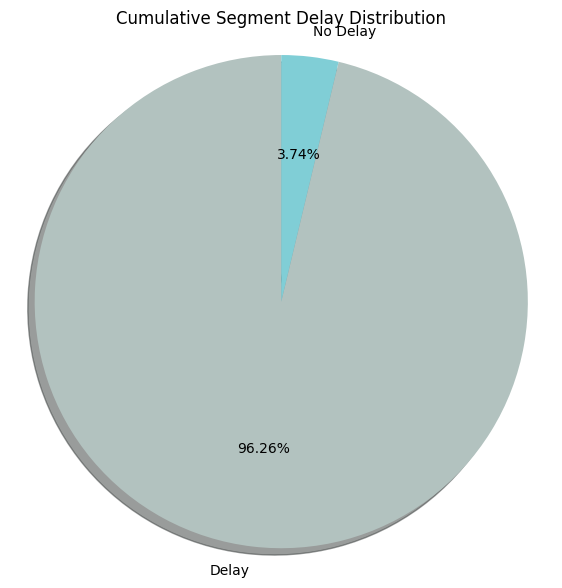

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(delay_counts, labels=delay_counts.index, autopct='%1.2f%%', startangle=90, colors=['#b2c2bf', '#80ced6'], shadow=True)
plt.title('Cumulative Segment Delay Distribution')
plt.axis('equal')
plt.show()

In [ ]:
# 📅 Time-Based Patterns
weekly = df.groupby('week_days', observed=True)['segment_cumulative_delay'].mean().sort_values().reset_index().round(2)
weekly

week_days  segment_cumulative_delay
0    Tuesday                     91.69
1     Friday                     94.64
2   Thursday                     97.38
3  Wednesday                     97.84
4     Monday                     99.08
5     Sunday                    100.00
6   Saturday                    100.12

In [ ]:
# 📅 Time-Based Patterns
df.groupby('month_name', observed=True)['segment_cumulative_delay'].mean().sort_values().reset_index().round(2)

month_name  segment_cumulative_delay
0    October                     93.41
1  September                     97.70

In [ ]:
df['segment_delay'] = df['segment_actual_time'] - df['segment_osrm_time']
df['segment_delay'].head()

0    194.0
1    346.0
2     20.0
3     56.0
4    377.0
Name: segment_delay, dtype: float64

In [ ]:
print("Mean Delay:", df['segment_delay'].mean())
print("Median Delay:", df['segment_delay'].median())
print("Max Delay:", df['segment_delay'].max())
print("Min Delay:", df['segment_delay'].min())

Mean Delay: 97.18177336165049
Median Delay: 39.0
Max Delay: 3006.0
Min Delay: -210.0


In [ ]:
def delay_category(x):
    if x <= 0:
        return 'No Delay'
    elif x <= 5:
        return 'Low Delay'
    elif x <= 10:
        return 'Medium Delay'
    else:
        return 'High Delay'

df['delay_category'] = df['segment_delay'].apply(delay_category)
df['delay_category'].value_counts().reset_index()

delay_category  count
0     High Delay  23151
1   Medium Delay   1386
2       No Delay    986
3      Low Delay    845

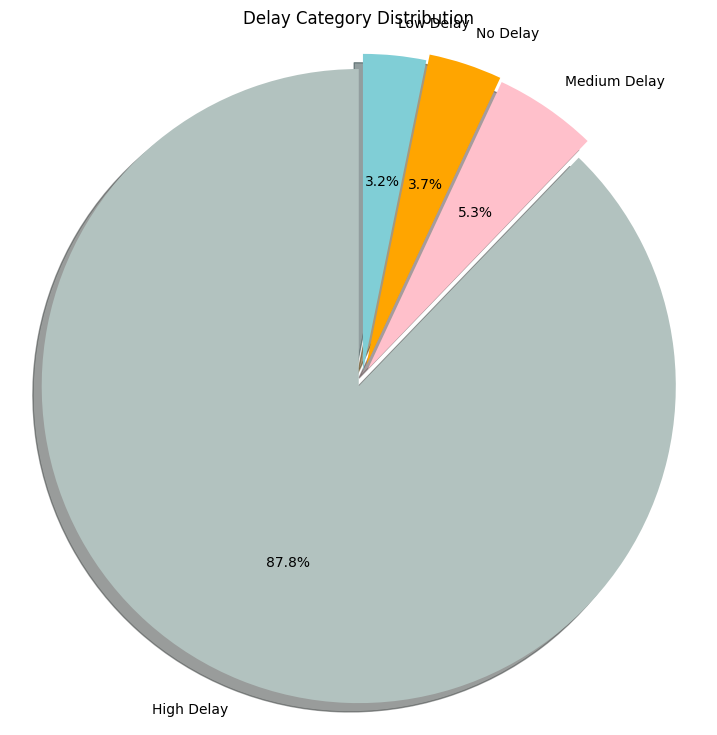

In [ ]:
delay_counts = df['delay_category'].value_counts()

plt.figure(figsize=(9, 9))
plt.pie(delay_counts,
        labels=delay_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#b2c2bf', 'pink', 'orange', '#80ced6'],
        explode=(0.03, 0.03, 0.04, 0.02),
        shadow=True)

plt.title('Delay Category Distribution')
plt.axis('equal')
plt.show()

In [ ]:
weekly_delay = df.groupby('week_days', observed=True)['segment_delay'].mean().reset_index()
weekly_delay

week_days  segment_delay
0     Friday      94.637216
1     Monday      99.080966
2   Saturday     100.124480
3     Sunday      99.995504
4   Thursday      97.382052
5    Tuesday      91.690948
6  Wednesday      97.838250

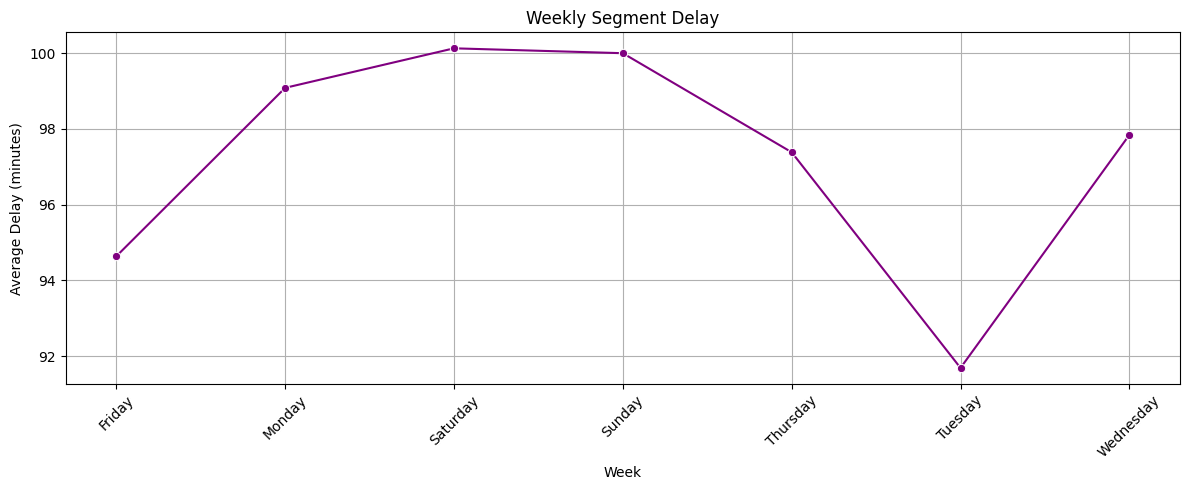

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=weekly_delay, x='week_days', y='segment_delay', marker='o', color='purple')
plt.title("Weekly Segment Delay")
plt.xlabel("Week")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
monthly_delay = df.groupby('month_name', observed=True)['segment_delay'].mean().round(2).reset_index()
monthly_delay

month_name  segment_delay
0    October          93.41
1  September          97.70

In [ ]:
np.random.seed(42)
sample_df = pd.DataFrame({
    'segment_cumulative_delay': np.random.normal(loc=15, scale=5, size=1000),
    'week_days': np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 1000),
    'source_state_name': np.random.choice(['Delhi', 'Maharashtra', 'Karnataka', 'Tamil Nadu'], 1000),
    'segment_osrm_time': np.random.normal(loc=10, scale=2, size=1000)
})
sample_df.head(2)

segment_cumulative_delay week_days source_state_name  segment_osrm_time
0                 17.483571    Sunday        Tamil Nadu           8.328092
1                 14.308678  Thursday       Maharashtra           9.794246

## Chi-Square Test: Delay vs Weekdays

In [ ]:
H0 = 'Delay occurrence is independent of the day of the week.'
Ha = 'Delay occurrence depends on the day of the week.'

sample_df['delay_flag'] = sample_df['segment_cumulative_delay'].apply(lambda x: 'Delay' if x > 0 else 'No Delay')

contingency_table = pd.crosstab(sample_df['week_days'], sample_df['delay_flag'])
alpha = 0.05

# Perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("p-value:", p_value)

print(f"Reject Null Hypothesis: {Ha}" if p_value < alpha else f"Fail to Reject: {H0}")

Chi-Square Statistic: 6.04830182294971
p-value: 0.4178011040012267
Fail to Reject: Delay occurrence is independent of the day of the week.


## T-Test: Weekday vs Weekend Delay

In [ ]:
H0 = 'Average delay on Weekdays = Average delay on Weekends.'
Ha = 'Average delay on Weekdays ≠ Average delay on Weekends.'

# Separate delay data for weekdays and weekends
weekday_delay = sample_df[sample_df['week_days'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['segment_cumulative_delay']
weekend_delay = sample_df[sample_df['week_days'].isin(['Saturday', 'Sunday'])]['segment_cumulative_delay']

# Perform independent T-test
t_stat, p_value = ttest_ind(weekday_delay, weekend_delay, equal_var=False)
alpha = 0.05

print("T-statistic:", t_stat)
print("p-value:", p_value)

print(f"Reject Null Hypothesis: {Ha}" if p_value < alpha else f"Fail to Reject: {H0}")

T-statistic: 0.349652934922979
p-value: 0.7267373359252989
Fail to Reject: Average delay on Weekdays = Average delay on Weekends.


## ANOVA: Delay Across States

In [ ]:
H0 = 'Mean delay is the same for all states.'
Ha = 'At least one state’s mean delay is different.'

groups = [group['segment_cumulative_delay'].values for name, group in df.groupby('source_state_name')]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*groups)
alpha = 0.05


print("F-statistic:", f_stat)
print("p-value:", p_value)

print(f"Reject Null Hypothesis: {Ha}" if p_value < alpha else f"Fail to Reject: {H0}")

F-statistic: 47.31337148249564
p-value: 5.662451569361929e-281
Reject Null Hypothesis: At least one state’s mean delay is different.


## Pearson Correlation: OSRM Time vs Actual Delay

In [ ]:
sample_df.sample(2)

segment_cumulative_delay week_days source_state_name  segment_osrm_time  \
2                   18.238443    Monday       Maharashtra          11.596508   
766                 14.825058    Sunday             Delhi          12.892389   

    delay_flag  
2        Delay  
766      Delay

In [ ]:
H0 = 'There is no linear correlation between segment_osrm_time and segment_cumulative_delay.'
Ha = 'There is a linear correlation between segment_osrm_time and segment_cumulative_delay.'

corr_coef, p_value = pearsonr(sample_df['segment_osrm_time'], sample_df['segment_cumulative_delay'])
alpha = 0.05

print("Pearson correlation coefficient:", corr_coef)
print("p-value:", p_value)

print(f"Reject Null Hypothesis: {Ha}" if p_value < alpha else f"Fail to Reject: {H0}")

Pearson correlation coefficient: 0.0191563571682874
p-value: 0.5451291200016899
Fail to Reject: There is no linear correlation between segment_osrm_time and segment_cumulative_delay.


Statistical Test: Use a one-way ANOVA to compare delivery counts across weekdays for September.

In [ ]:
df_september = df[df['month_name'] == 'September'].copy()
df_september['date'] = df_september['trip_creation_time'].dt.date
daily_counts = (df_september.groupby(['date', 'week_days'], observed=True).size().reset_index(name='count'))
daily_counts.sample(5)

date  week_days  count
1   2018-09-13   Thursday   1320
14  2018-09-26  Wednesday   1274
7   2018-09-19  Wednesday   1155
2   2018-09-14     Friday   1296
3   2018-09-15   Saturday   1293

In [ ]:
H0 = 'Mean trip counts are the same across all weekdays.'
Ha = 'At least one weekday has a different mean trip count.'

groups = []
for weekday in daily_counts['week_days'].cat.categories:
    arr = daily_counts.loc[daily_counts['week_days'] == weekday, 'count'].values
    if len(arr) > 1: groups.append(arr)

# (5) Perform One‐Way ANOVA
f_stat, p_value = stats.f_oneway(*groups)
alpha = 0.05

print("ANOVA Test Result:")
print(f"  F-statistic: {f_stat:.2f}")
print(f"  p-value:     {p_value:.2e}")

print(f"Reject Null Hypothesis: {Ha}" if p_value < alpha else f"Fail to Reject: {H0}")

ANOVA Test Result:
  F-statistic: 2.12
  p-value:     1.26e-01
Fail to Reject: Mean trip counts are the same across all weekdays.


## Does the average number of delivery data (actual_time) significantly differ across different delays conditions?

In [ ]:
H0 = "The average actual delivery time is the same across all delay categories."
Ha = "At least one delay category has a significantly different average actual delivery time."

Hight_Delay = df[df['delay_category'] == 'High Delay']['actual_time']
Medium_Delay = df[df['delay_category'] == 'Medium Delay']['actual_time']
Low_Delay = df[df['delay_category'] == 'Low Delay']['actual_time']
No_Delay = df[df['delay_category'] == 'No Delay']['actual_time']
alpha = 0.05

# One-Way ANOVA & Independent Test:
t_stats, p_value = stats.f_oneway(Hight_Delay, Medium_Delay, Low_Delay, No_Delay)

print("T-statistic:", t_stats)
print("P-value:", p_value)

print(f"Reject Null Hypothysis: {H0}" if p_value < alpha else f"Fail to Reject Null Hypothesis: {Ha}")

T-statistic: 182.52690906505723
P-value: 3.80066043599476e-117
Reject Null Hypothysis: The average actual delivery time is the same across all delay categories.


##  Is there a significant difference in average actual_time data on test vs. training?

In [ ]:
Ha = "There is no significant difference in the average actual delivery time between test and training."
H0 = "There is a significant difference in the average actual delivery time between between test and training."

test = df[df['data'] == 'test']['actual_time']
training = df[df['data'] == 'training']['actual_time']
alpha = 0.05

# Perform independent t-test
t_stats, p_value = stats.ttest_ind(test, training)

print("T-statistic:", t_stats)
print("P-value:", p_value)

print(f"Reject Null Hypothysis: {H0}" if p_value < alpha else f"Fail to Reject Null Hypothysis: {Ha}")

T-statistic: -1.7576494022088893
P-value: 0.07881878530111958
Fail to Reject Null Hypothysis: There is no significant difference in the average actual delivery time between test and training.


## Is there a linear relationship between the actual delivery time and the actual distance to the destination?

In [ ]:
H0 = "There is no linear correlation between actual delivery time and distance."
Ha = "There is a significant linear correlation between actual delivery time and distance."

alpha = 0.05

# Calculate Pearson's correlation between temp and count:
corr_coef, p_value = pearsonr(df['actual_distance_to_destination'], df['actual_time'])

print(f"Pearson's Correlation Coefficient: {corr_coef}")
print(f"P-value: {p_value}")

print(f"Reject Null Hypothesis: {Ha}" if p_value < alpha else f"Fail to Reject Null Hypothesis: {H0}")

Pearson's Correlation Coefficient: 0.9489953548287535
P-value: 0.0
Reject Null Hypothesis: There is a significant linear correlation between actual delivery time and distance.


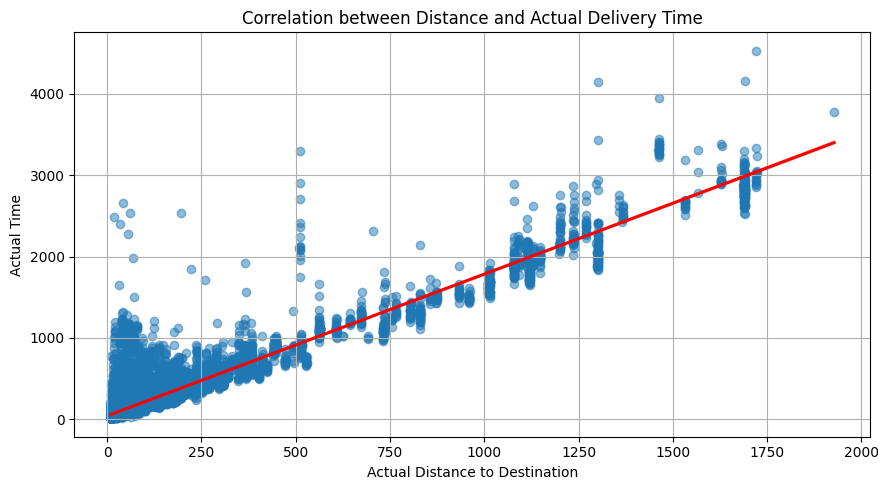

In [ ]:
plt.figure(figsize=(9, 5))
sns.regplot(x='actual_distance_to_destination', y='actual_time', data=df, line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
plt.title('Correlation between Distance and Actual Delivery Time')
plt.xlabel('Actual Distance to Destination')
plt.ylabel('Actual Time')
plt.grid(True)
plt.tight_layout()
plt.show()

## Is there a correlation between osrm_time and actual_time?
- Explanation: If OSRM (expected route planner time) predictions are close to real time.

In [ ]:
H0 = "No significant correlation between osrm_time and actual_time."
Ha = "Significant correlation exists between osrm_time and actual_time."

corr_value, p_value = pearsonr(df['osrm_time'], df['actual_time'])
alpha = 0.05

print(f"Pearson Correlation Coefficient: {corr_value}")
print(f"P-value: {p_value}")

print(f"Reject Null Hypothesis: {Ha}" if p_value < alpha else f"Fail to Reject Null Hypothesis: {H0}")

Pearson Correlation Coefficient: 0.9531524416313518
P-value: 0.0
Reject Null Hypothesis: Significant correlation exists between osrm_time and actual_time.


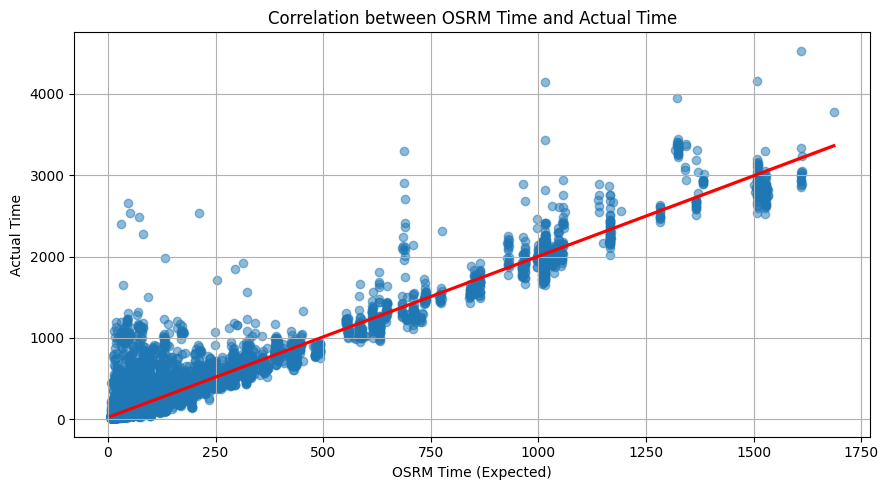

In [ ]:
plt.figure(figsize=(9, 5))
sns.regplot(x='osrm_time', y='actual_time', data=df, line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
plt.title("Correlation between OSRM Time and Actual Time")
plt.xlabel("OSRM Time (Expected)")
plt.ylabel("Actual Time")
plt.grid(True)
plt.tight_layout()
plt.show()

## Is segment_osrm_distance_sum correlated with segment_actual_time_sum?
- Explanation: To analyze whether total segment distance predicts total segment time.

In [ ]:
H0 = 'No significant correlation found between segment_osrm_distance_sum and segment_actual_time_sum.'
Ha = 'Significant correlation exists between segment_osrm_distance_sum and segment_actual_time_sum.'

corr_value, p_value = pearsonr(df['segment_osrm_distance_sum'], df['segment_actual_time_sum'])

print(f"Pearson Correlation Coefficient: {corr_value}")
print(f"P-value: {p_value}")
alpha = 0.05

print(f"Reject Null Hypothesis: {Ha}" if p_value < alpha else f"Fail to Reject Null Hypothesis: {H0}")

Pearson Correlation Coefficient: 0.9512547626622143
P-value: 0.0
Reject Null Hypothesis: Significant correlation exists between segment_osrm_distance_sum and segment_actual_time_sum.


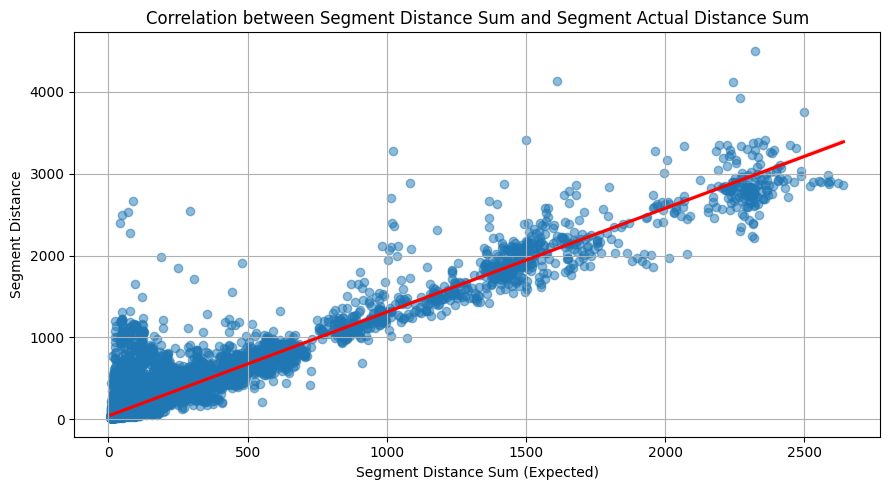

In [ ]:
plt.figure(figsize=(9, 5))
sns.regplot(x='segment_osrm_distance_sum', y='segment_actual_time_sum', data=df, line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
plt.title("Correlation between Segment Distance Sum and Segment Actual Distance Sum")
plt.xlabel("Segment Distance Sum (Expected)")
plt.ylabel("Segment Distance")
plt.grid(True)
plt.tight_layout()
plt.show()

## Is there a correlation between segment_factor and segment_delay?
- Explanation: Segment factor is a performance ratio — check if poor factor correlates with delay.

In [ ]:
corr = df['segment_factor'].corr(df['segment_delay'])
print("Correlation between segment_factor and segment_delay:", corr)


KeyError: 'segment_factor'

## Does cutoff_factor correlate with segment_cumulative_delay?
- Explanation: Check if higher cutoff buffer time is associated with delays.

In [ ]:
H0 = 'No significant correlation found between cutoff_factor and segment_cumulative_delay.'
Ha = 'Significant correlation exists between cutoff_factor and segment_cumulative_delay.'

corr_value, p_value = pearsonr(df['cutoff_factor'], df['segment_cumulative_delay'])

print(f"Pearson Correlation Coefficient: {corr_value}")
print(f"P-value: {p_value}")
alpha = 0.05

print(f"Reject Null Hypothesis: {Ha}" if p_value < alpha else f"Fail to Reject Null Hypothesis: {H0}")

In [ ]:
plt.figure(figsize=(9, 5))
sns.regplot(x='cutoff_factor', y='segment_cumulative_delay', data=df, line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
plt.title("Cutoff Factor vs Segment Cumulative Delay")
plt.xlabel("Cutoff Factor")
plt.ylabel("Segment Cumulative Delay")
plt.grid(True)
plt.show()

# 🔹 Z-Test (for Known Population Standard Deviation)

## Do more than 80% of rides happen on route_type (FTL)?




In [ ]:
# Define Hypothesis
H0 = "Proportion of delivery on route_type = 0.80"
Ha = "Proportion of delivery on route_type > 0.80"

Sample_Length = len(df)
FTL_Count = df[df['route_type'] == 'FTL'].shape[0]
Sample_Proportion = FTL_Count / Sample_Length
Population_Proportion = 0.80
Alpha = 0.05

# Z-test for proportions (Right Tail Test)
Z_Score = (Sample_Proportion - Population_Proportion) / np.sqrt((Population_Proportion * (1 - Population_Proportion)) / Sample_Length)
P_Value = 1 - stats.norm.cdf(Z_Score)

print("Sample Proportion (p̂):", Sample_Proportion)
print("Z-Score:", Z_Score)
print("P-Value:", P_Value)

print(f"Reject Null Hypothesis: {Ha}" if P_Value < Alpha else f"Fail to Reject: {H0}")

In [ ]:
# Plot the normal distribution with Z critical value and Z score
z_critical = stats.norm.ppf(1 - Alpha)

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Standard Normal Distribution', color='blue')

# Shade the rejection region
plt.fill_between(x, 0, y, where=(x >= z_critical), color='red', alpha=0.4, label='Rejection Region (α=0.05)')

# Plot Z-score
plt.axvline(Z_Score, color='green', linestyle='--', label=f'Z-Score = {Z_Score:.2f}')
plt.axvline(z_critical, color='red', linestyle='--', label=f'Critical Z = {z_critical:.2f}')

plt.title("One-Tailed Z-Test for Proportion (FTL > 0.80)")
plt.xlabel("Z-Score")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df.sample(2)

## 🤔💭<span style="color:red"><strong>Business Insights & Recommendations</strong></span>💭🤔

 **Peak Days (Wednesday & Thursday):**
- Deliveries are highest on Wednesdays and Thursdays.
Action: Increase staffing and allocate more trucks on those days to handle the volume efficiently.

**Low Activity Days (Sunday & Monday):**
- Sundays and Mondays show lower delivery activity.
Action: Schedule warehouse maintenance or staff training on those days to make productive use of slower periods.

**Busy Month (September):**
- September shows noticeably higher totals than October. This may indicate a seasonal spike—perhaps due to festivals or end-of-quarter demand.
Action: Plan for additional resources (drivers, vehicles, temporary staff) in September to meet the higher demand without delays.